<div class="alert alert-block alert-info">
<center> <h1> MSc in Data Science and Advanced Analytics </h1> </center> <br>
<center> DATA MINING PROJECT 2024/2025 - PART 01</center>

# ABCDEATS Inc. - Group 02

|   | Student Name   |    Student ID | 
|---|----------------|      ---      |
| 1 | Afonso Gião    |   20240495   | 
| 2 | Bruna Duarte   |    20210669   |  
| 3 | Catarina Silva |   20240558   | 
| 4 | Sarah Leuthner |   20240581   | 

# Table of Contents

* [<font color='#52b69a'>1 - Business Understanding </font>](#first-bullet) <br>

* [<font color='#52b69a'>2 - Data Integration </font>](#second-bullet) <br>
    - [2.1. Import Libraries ](#2.1)<br>
    - [2.2. Import Data ](#2.2)<br>
        - 2.2.1. [Metadata ](#2.2.1)<br><br>

* [<font color='#52b69a'>3 - Data Exploration </font>](#third-bullet) <br>
    - [3.1. Exploratory Data Analysis  ](#3.1) <br>
        - 3.1.1. [Descriptive Statistics](#3.1.1)<br>
    - [3.2. Features' Distributions  ](#3.2) <br>
    - [3.3. Coherence Check  ](#3.3) <br>
    - [3.4. Outliers Check  ](#3.4) <br><br>

* [<font color='#52b69a'>4 - Data Preprocessing</font>](#forth-bullet) <br>
    - [4.1. Handling Troublesome Values ](#4.1)<br>
        - 4.1.1. [Handling Anomalies](#4.1.1)<br>
        - 4.1.2. [Handling Strange Values](#4.1.2)<br>
        - 4.1.3. [Handling Missing Values](#4.1.3)<br>
    - [4.2. First Outliers Treatment ](#4.2)<br>
    - [4.3. Feature Engineering](#4.3)<br>
    - [4.4. Feature Selection ](#4.4)<br>
    - [4.5. Dimensionality Reduction (PCA) ](#4.5)<br>
    - [4.6. Creating Perspectives ](#4.6)<br>
        - 4.6.1. [Clustering Perspectives](#4.6.1)<br>
        - 4.6.2. [RFM Perspective](#4.6.2)<br>
    - [4.7. Data Normalization ](#4.7)<br><br>

* [<font color='#52b69a'>5 - Exporting Preprocessed Data</font>](#fifth-bullet) <br>


<a class="anchor" id="first-bullet">

# 1. Business Understanding

ABCDEats Inc., a food delivery service, operates in a dynamic market where consumers are increasingly selective about their spending habits. To thrive in this competitive environment, the company must align its strategies with the diverse preferences and needs of its customer base.

**Business Challenge**

Understanding customer behavior is essential for delivering personalized services and achieving sustainable growth. By segmenting its customer base, ABCDEats Inc. can:

* Identify patterns in customer preferences and behavior.
* Develop tailored marketing and operational strategies.
* Enhance customer satisfaction and retention through personalized services.

**Objective**

The main goal of this project is to apply customer segmentation techniques to uncover descriptive patterns and behavioral insights within the customer base. The findings will:

* Classify customers into segments based on their spending habits, order preferences, and demographics.
* Inform the development of personalized strategies to cater to each segment effectively.
* Enable the company to refine its service offerings and improve its targeting of future customers.

<a class="anchor" id="second-bullet">     

# 2. Data Integration

## 2.1  Import Libraries <a class="anchor" id="2.1"></a>

In [1]:
# Necessary installations

#!pip install squarify
#!pip install seaborn
#!pip install matplotlib
#!pip install numpy
#!pip install pandas
#!pip install scikit-learn
#!pip install scipy


# Necessary imports

# hiding the warnings
import warnings

warnings.filterwarnings('ignore')
import os, sys

sys.stderr = open(os.devnull, "w")  # silence stderr
sys.stderr = sys.__stderr__  # unsilence stderr

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import squarify

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering, KMeans, MeanShift, DBSCAN, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram
from sklearn.base import clone
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.mixture import GaussianMixture

# setting the style of seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

## 2.2 Import Data <a class="anchor" id="2.2"></a>

In [2]:
# Importing the dataset
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

### 2.2.1 Metadata <a class="anchor" id="2.2.1"></a>

- *customer_id* - Unique identifier for each customer.
- *customer_region* - geographic region where the customer is located.
- *customer_age* - Age of the customer.
- *vendor_count* - Number of unique vendors the customer has ordered from.
- *product_count* - Total number of products the customer has ordered.
- *is_chain* - Indicates whether the customer’s order was from a chain restaurant.
- *first_order* - Number of days from the start of the dataset when the customer first placed an order.
- *last_order* - Number of days from the start of the dataset when the customer most recently placed an order.
- *last_promo* - The category of the promotion or discount most recently used by the customer.
- *payment_method* - Method most recently used by the customer to pay for their orders.
- *CUI_American*, *CUI_Asian*, *CUI_Chinese*, *CUI_Italian*, etc. - The amount in monetary units spent by the customer from the indicated type of cuisine.
- *DOW_0* to *DOW_6* - Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).
- *HR_0* to *HR_23* - Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).

<a class="anchor" id="third-bullet">     

# 3. Data Exploration

## 3.1. Exploratory Data Analysis <a class="anchor" id="3.1"></a>

In [3]:
print('There are {} observations and {} features in the dataset'.format(df.shape[0], df.shape[1]))

There are 31888 observations and 56 features in the dataset


* Setting 'customer_id' as the index of the dataframe:

In [4]:
# Indexing by customer_id
df.set_index('customer_id',inplace=True)

This way, a customer's information can be quickly extracted using the customer id.

### 3.1.1 Descriptive Statistics <a class="anchor" id="3.1.1"></a>

* Descriptive statistics for numerical columns except for the cuisine, HR and DOW columns

In [5]:
df[['customer_age', 'vendor_count', 'product_count', "is_chain", 'first_order', 'last_order']].describe().round(2)

customer_age  vendor_count  product_count  is_chain  first_order  \
count      31161.00      31888.00       31888.00  31888.00     31782.00   
mean          27.51          3.10           5.67      2.82        28.48   
std            7.16          2.77           6.96      3.98        24.11   
min           15.00          0.00           0.00      0.00         0.00   
25%           23.00          1.00           2.00      1.00         7.00   
50%           26.00          2.00           3.00      2.00        22.00   
75%           31.00          4.00           7.00      3.00        45.00   
max           80.00         41.00         269.00     83.00        90.00   

       last_order  
count    31888.00  
mean        63.68  
std         23.23  
min          0.00  
25%         49.00  
50%         70.00  
75%         83.00  
max         90.00

* Descriptive statistics for the categorical columns

In [6]:
df.describe(include = "object")

customer_region last_promo payment_method
count            31888      31888          31888
unique               9          4              3
top               8670          -           CARD
freq              9761      16748          20161

### 3.1.2 Cuisine Analysis

Quick description of each of the cuisine columns:

In [7]:
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]

# Descriptive statistics for the cuisine columns
df[cuisine_columns].describe().round(2).T

count  mean    std  min  25%  50%    75%     max
CUI_American              31888.0  4.88  11.65  0.0  0.0  0.0   5.66  280.21
CUI_Asian                 31888.0  9.96  23.56  0.0  0.0  0.0  11.83  896.71
CUI_Beverages             31888.0  2.30   8.48  0.0  0.0  0.0   0.00  229.22
CUI_Cafe                  31888.0  0.80   6.43  0.0  0.0  0.0   0.00  326.10
CUI_Chicken Dishes        31888.0  0.77   3.66  0.0  0.0  0.0   0.00  219.66
CUI_Chinese               31888.0  1.43   8.19  0.0  0.0  0.0   0.00  739.73
CUI_Desserts              31888.0  0.88   5.26  0.0  0.0  0.0   0.00  230.07
CUI_Healthy               31888.0  0.95   5.83  0.0  0.0  0.0   0.00  255.81
CUI_Indian                31888.0  1.63   7.44  0.0  0.0  0.0   0.00  309.07
CUI_Italian               31888.0  3.23  11.25  0.0  0.0  0.0   0.00  468.33
CUI_Japanese              31888.0  3.00  10.18  0.0  0.0  0.0   0.00  706.14
CUI_Noodle Dishes         31888.0  0.71   4.54  0.0  0.0  0.0   0.00  275.11
CUI_OTHER                 31888.0  3.00   9.77  0.0  0.0  0.0   0.00  366.08
CUI_Street Food / Snacks  31888.0  3.91  15.55  0.0  0.0  0.0   0.00  454.45
CUI_Thai                  31888.0  0.84   4.43  0.0  0.0  0.0   0.00  136.38

#### Asian Cuisine

Let's compare the popularity of the most well-known cuisines in the asian continent: Japanese, Indian, Chinese and Thai.

Text(0.5, 0, 'Cuisines')

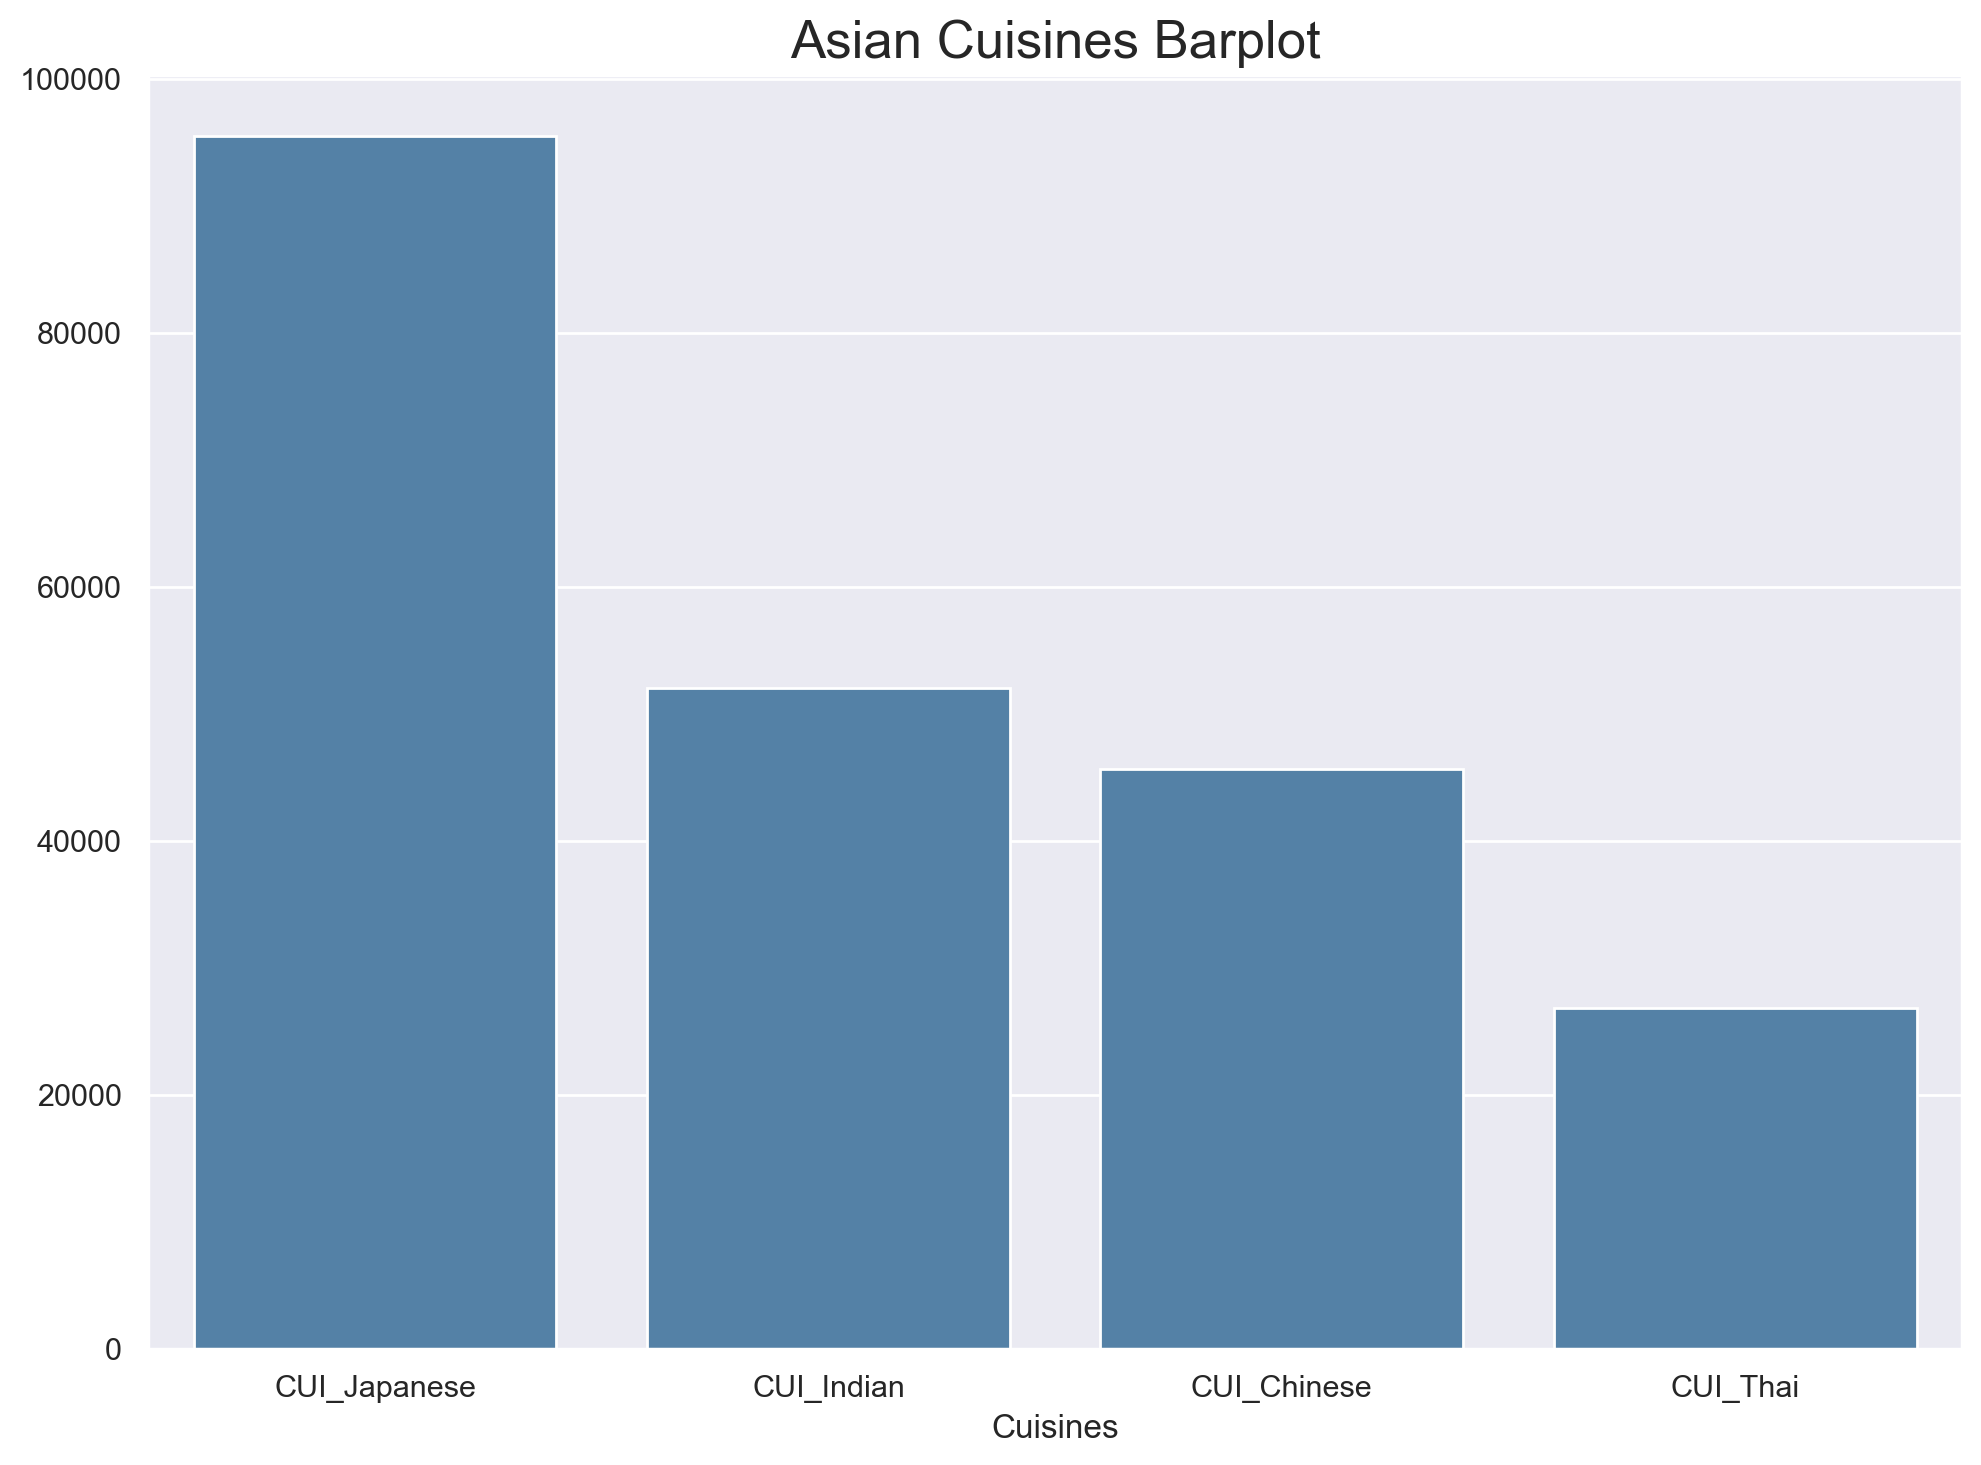

In [8]:
# Sum of the money spent in the 4 main asian cuisines
asian_cuisine_sums = df[['CUI_Japanese', 'CUI_Indian', 'CUI_Chinese', 'CUI_Thai']].sum()

# Plotting a bar chart for the 4 main asian cuisines
sns.barplot(x=asian_cuisine_sums.index, y=asian_cuisine_sums.values, color='steelblue')
plt.title("Asian Cuisines Barplot", size = 19)
plt.xlabel("Cuisines")

**Japanese** cuisine has the highest amount of money spent by a huge margin, among the 4 main asian cuisines. 
It is almost double the money spent in each of the other 3 cuisines. 
This makes sense given the popularity of japanese food and the higher average cost compared to other asian cuisines.

* **Asian Cuisine VS. The 4 Main Asian Cuisines**

Let's compare the total spending in Asian cuisine with the total spending in the 4 main asian cuisines we saw before.

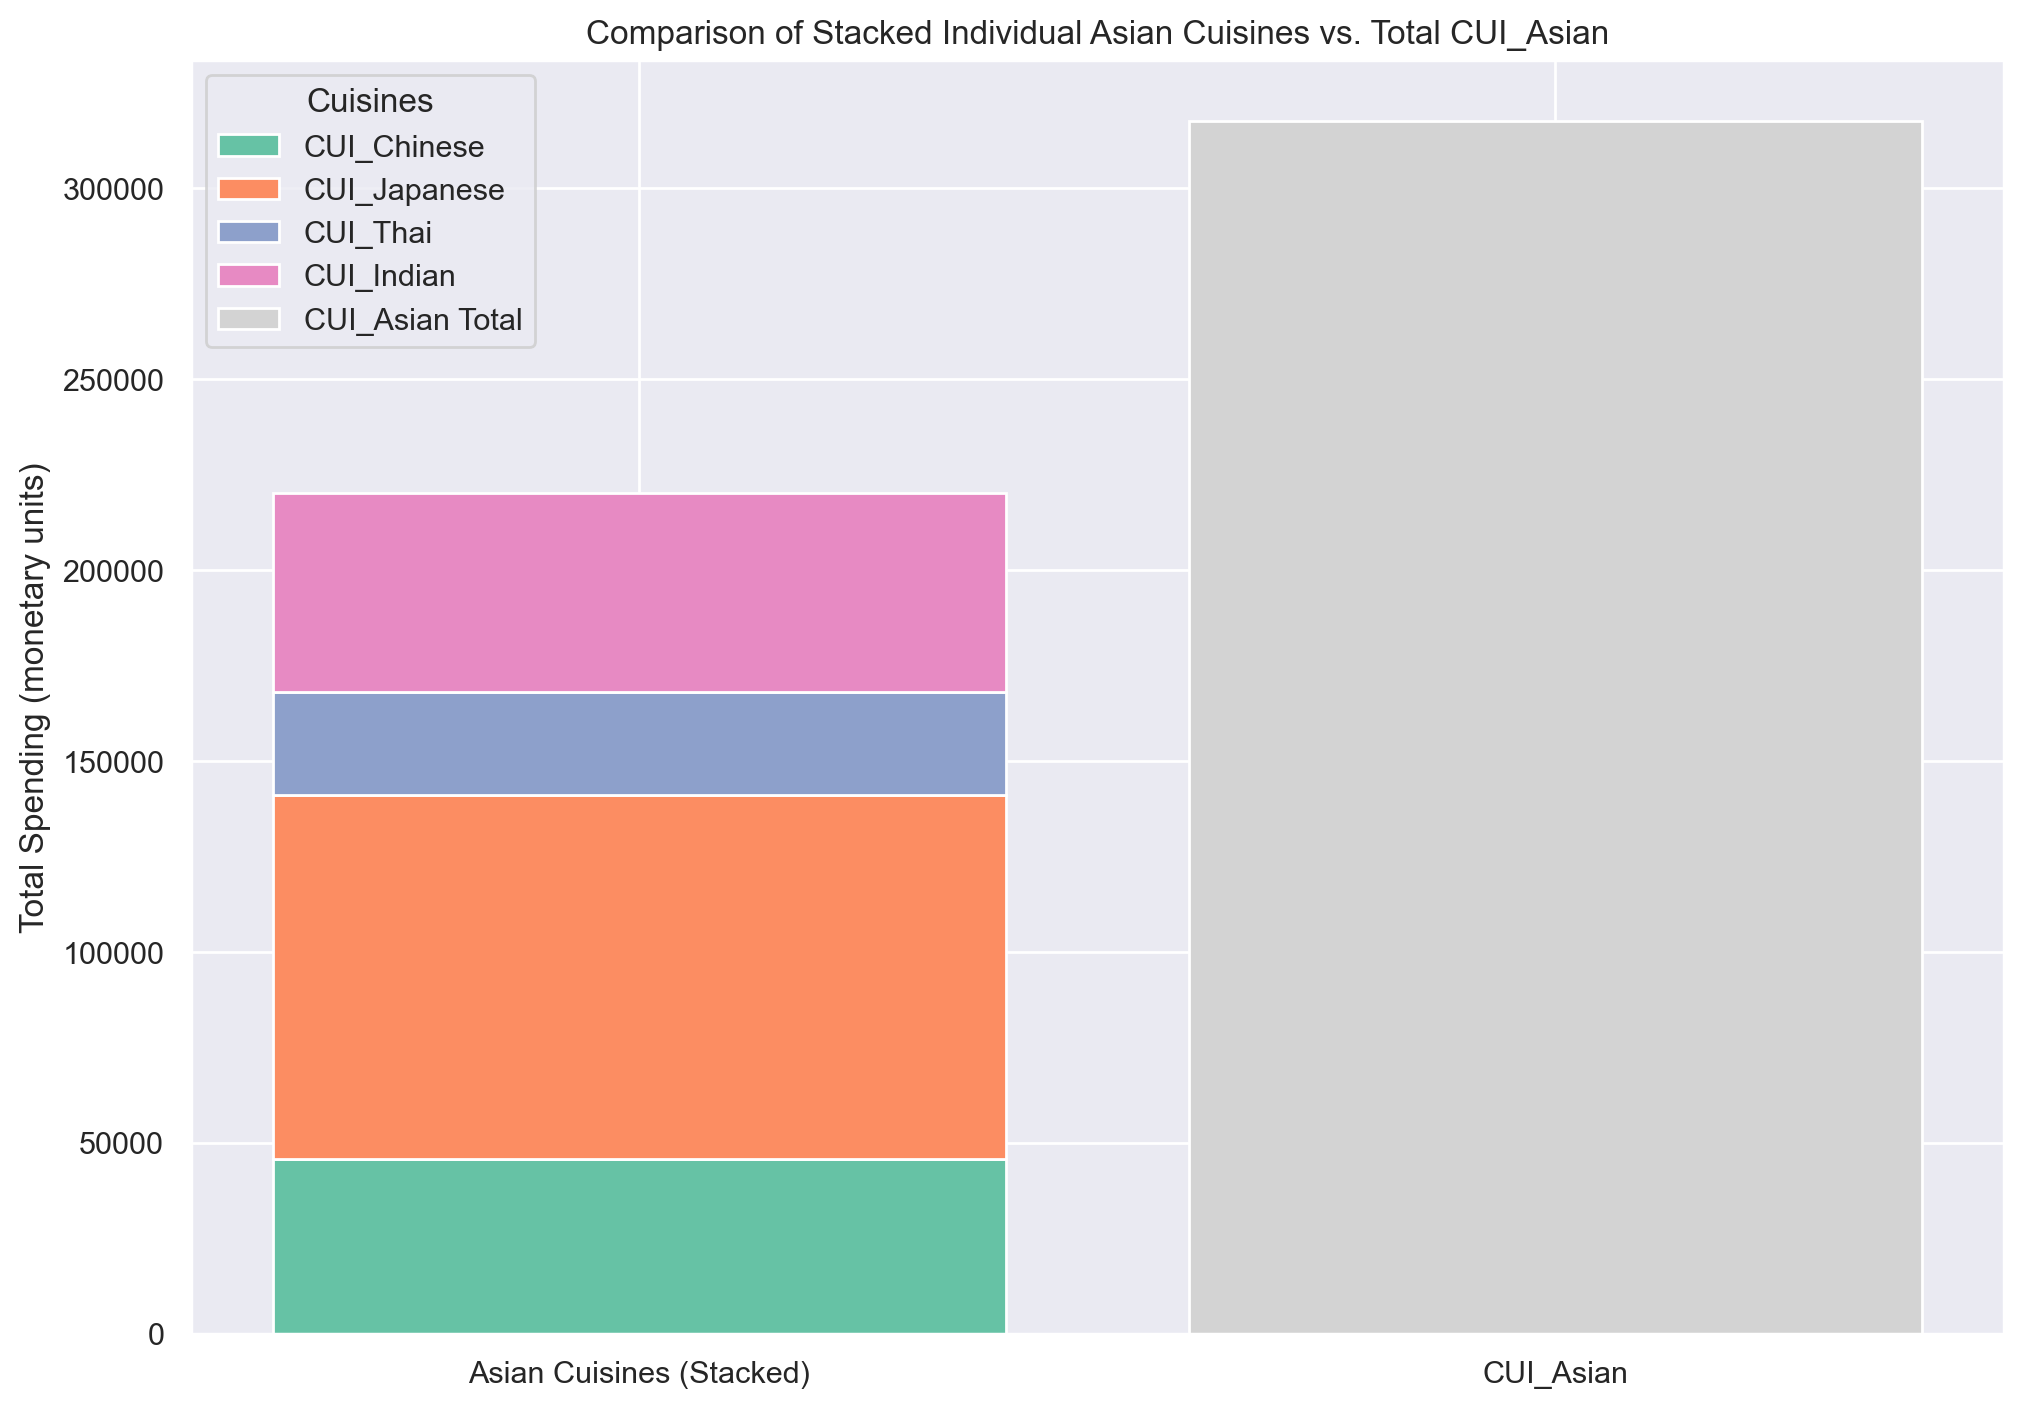

In [9]:
# Columns to sum for stacked Asian cuisine bar
cuisines = ["CUI_Chinese", "CUI_Japanese", "CUI_Thai", "CUI_Indian"]

# Sum of the money spent in the 4 main asian cuisines
cuisine_sums = [df[col].sum() for col in cuisines]

# Total money spent in CUI_Asian
sum_asian = df["CUI_Asian"].sum()

# Subplot for the stacked bar chart
fig, ax = plt.subplots()

# Plotting each cuisine individually in the stack
bottom = 0
colors = sns.color_palette("Set2")
for i, (cuisine, color) in enumerate(zip(cuisines, colors)):
    ax.bar("Asian Cuisines (Stacked)", cuisine_sums[i], bottom=bottom, label=cuisine, color=color)
    bottom += cuisine_sums[i]  # Update bottom for the next stack segment

# Plotting the total CUI_Asian as a single bar
ax.bar("CUI_Asian", sum_asian, color='lightgrey', label="CUI_Asian Total")

# Labelling and formatting the chart
ax.set_ylabel("Total Spending (monetary units)")
ax.set_title("Comparison of Stacked Individual Asian Cuisines vs. Total CUI_Asian")
ax.legend(title="Cuisines", loc="upper left")

plt.show()

In [10]:
print(f'Difference in money spent between generic and popular asian cuisines: {round(df["CUI_Asian"].sum() - df[["CUI_Japanese", "CUI_Indian", "CUI_Chinese", "CUI_Thai"]].sum().sum(), 2)}')

Difference in money spent between generic and popular asian cuisines: 97609.32


If we assume that "CUI_Asian" contains other Asian countries cuisines, we can say that around 2/3 of the money spent in Asian cuisines comes from only Japanese, Indian, Chinese and Thai cuisines. 
We can speculate there is only 97473.32 money units spent in the rest of the Asian cuisines, excluding those 4 main Asian cuisines.

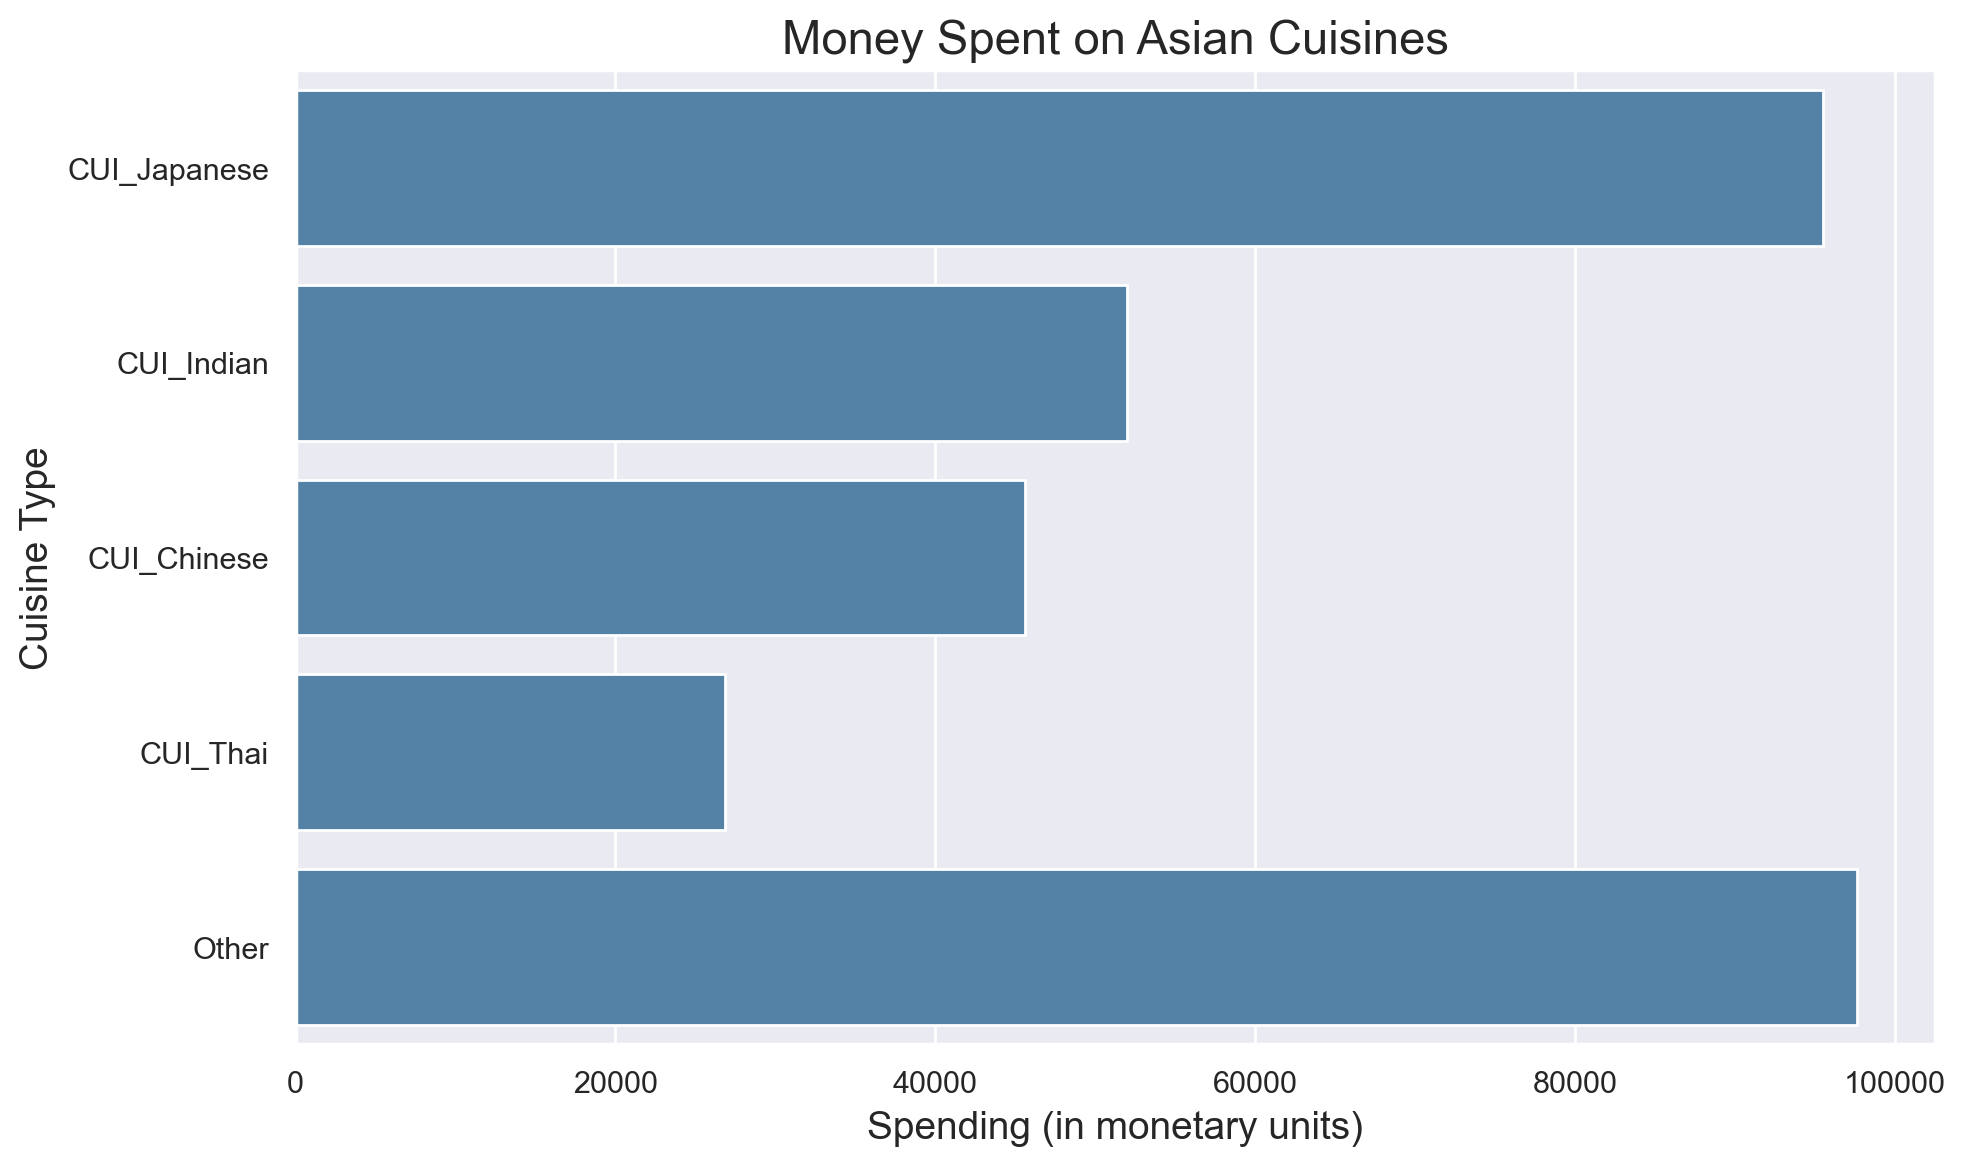

In [11]:
# Difference in money spent between generic and popular asian cuisines
asian_cuisine_sums['Other'] = df['CUI_Asian'].sum() - asian_cuisine_sums.sum()

# Reset the index to turn the data into a format suitable for plotting
asian_cuisine_sums_df = asian_cuisine_sums.reset_index()
asian_cuisine_sums_df.columns = ['Cuisine', 'Spending']

# Plotting the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=asian_cuisine_sums_df, x='Spending', y='Cuisine', color='steelblue')  

# Adding title and labels
plt.title("Money Spent on Asian Cuisines", size=17)
plt.xlabel("Spending (in monetary units)", size=14)
plt.ylabel("Cuisine Type", size=14)

# Display the barplot
plt.tight_layout()
plt.show()

Japanese cuisine could represent over 30% of the total spending in Asian cuisine.

#### European, Asian, American, Other VS. Remaining cuisines

In [12]:
# Total spending in all continents
total_spend = df[['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']].sum().sum()
total_spend

672014.5

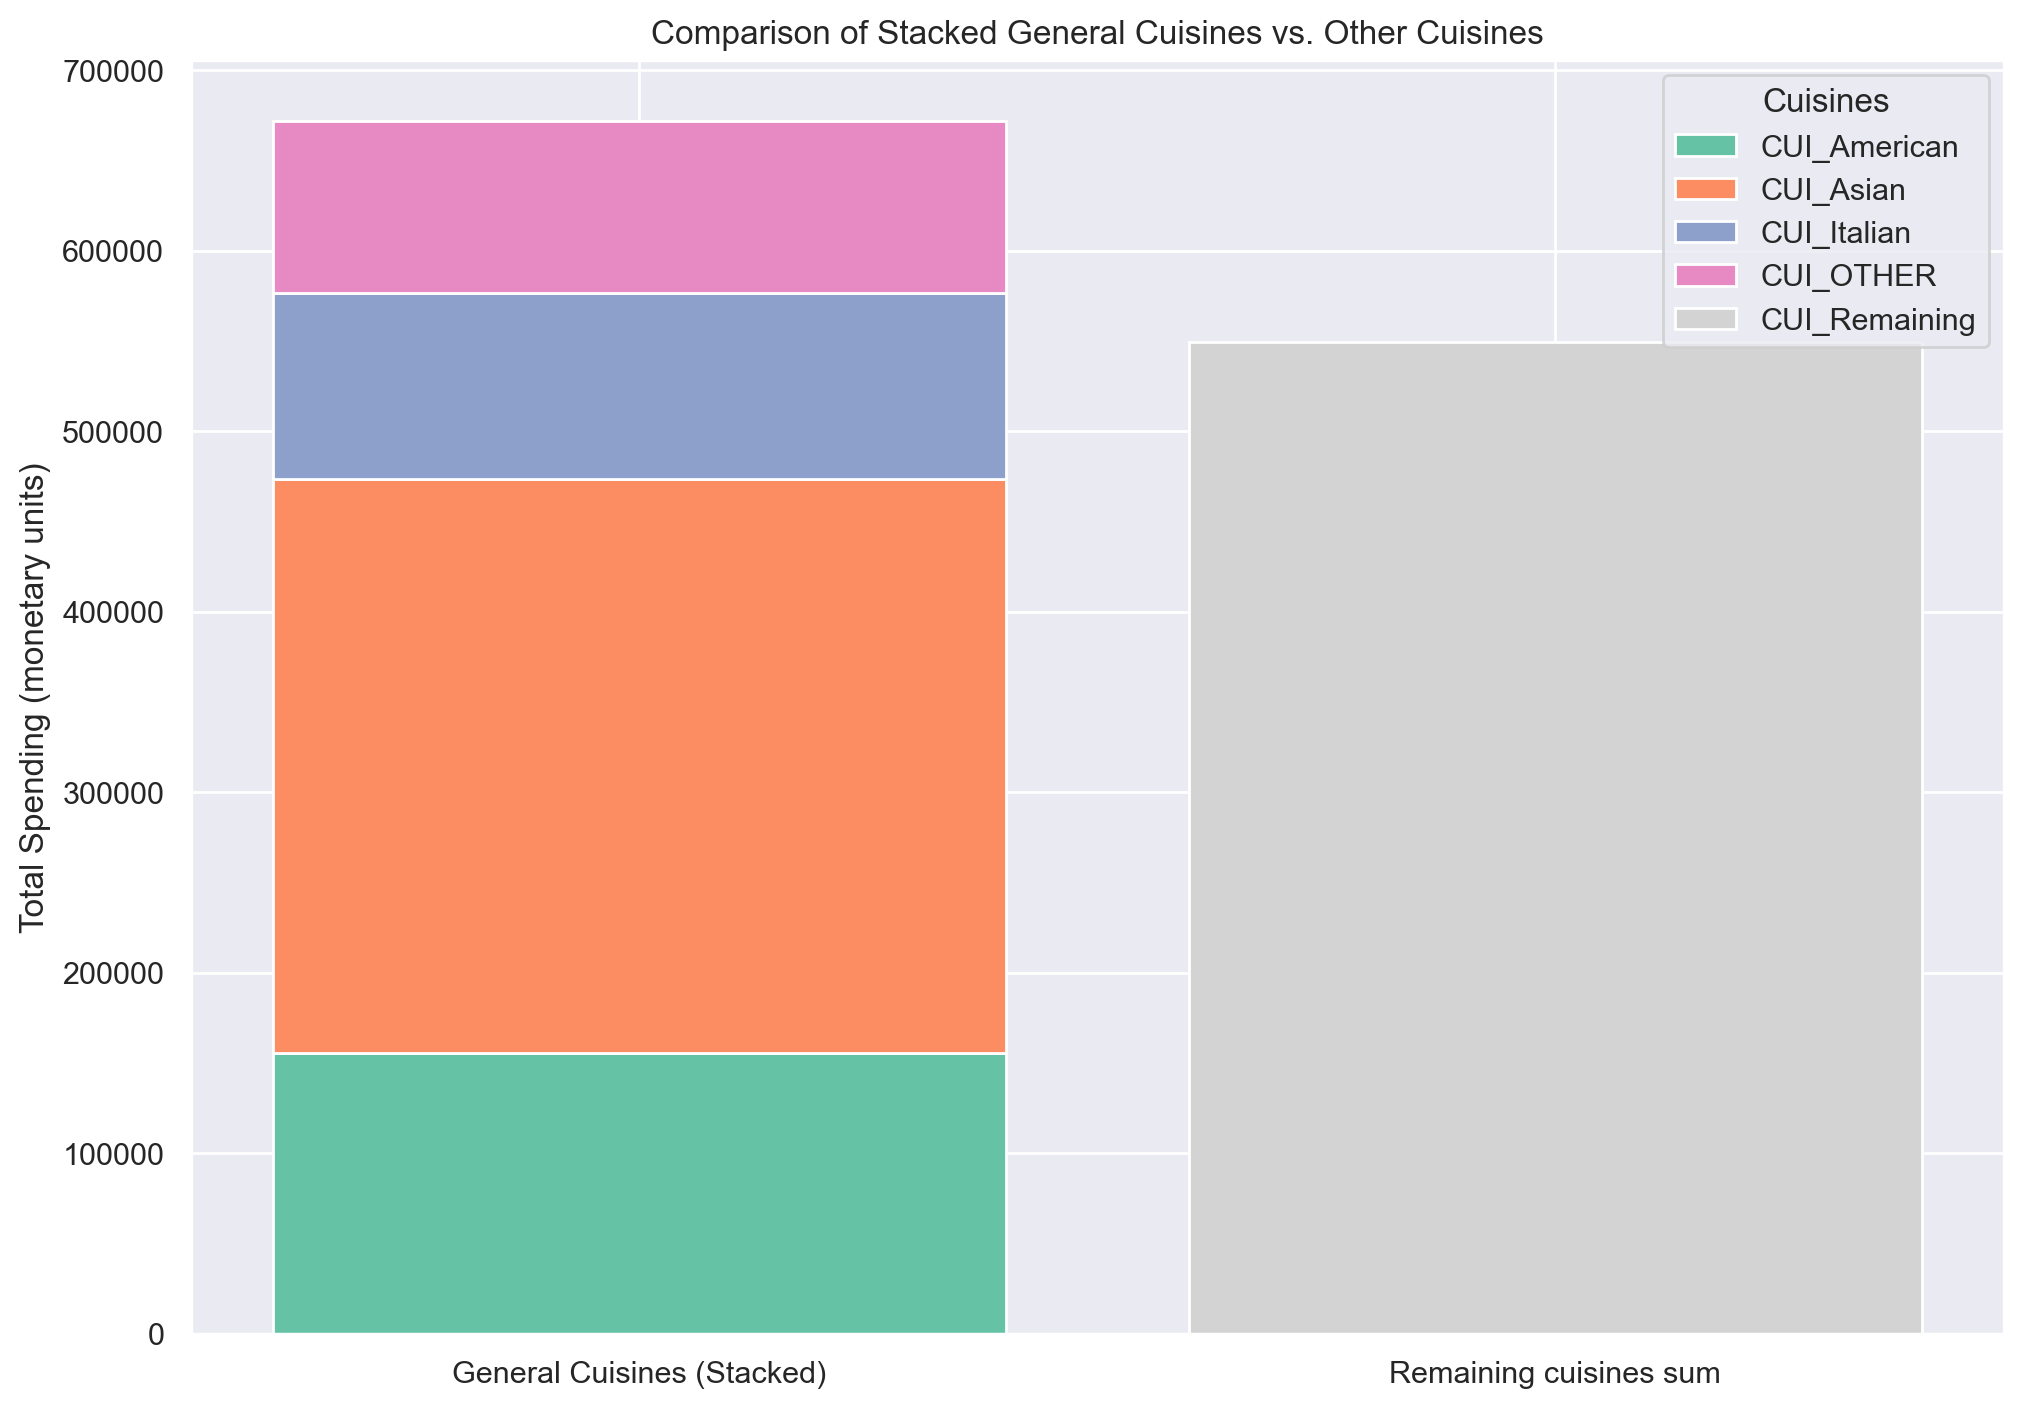

In [13]:
# Columns to sum for stacked Asian cuisine bar
cuisines = ['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']

# Money spent in each of the 4 generic cuisines
cuisine_sums = [df[col].sum() for col in cuisines]

# Money spent in the rest of the cuisines
rest_cui_sum = df[cuisine_columns].sum().sum() - sum(cuisine_sums)

# Subplots for the stacked bar chart
fig, ax = plt.subplots()

# Plotting each cuisine individually in the stack
bottom = 0
colors = sns.color_palette("Set2")
for i, (cuisine, color) in enumerate(zip(cuisines, colors)):
    ax.bar("General Cuisines (Stacked)", cuisine_sums[i], bottom=bottom, label=cuisine, color=color)
    bottom += cuisine_sums[i]  # Update bottom for the next stack segment

# Plotting the total CUI_Asian as a single bar
ax.bar("Remaining cuisines sum", rest_cui_sum, color='lightgrey', label="CUI_Remaining")

# Labeling and formatting the chart
ax.set_ylabel("Total Spending (monetary units)")
ax.set_title("Comparison of Stacked General Cuisines vs. Other Cuisines")
ax.legend(title="Cuisines", loc="upper right")

plt.show()

It is reasonable to think that these 4 cuisines contain the other types of cuisines in the dataset, because the total spending in these 4 cuisines is greater than the total spending in the remaining cuisines.

* **European VS. Asian VS. American VS. Other Cuisines**

<Axes: xlabel='None'>

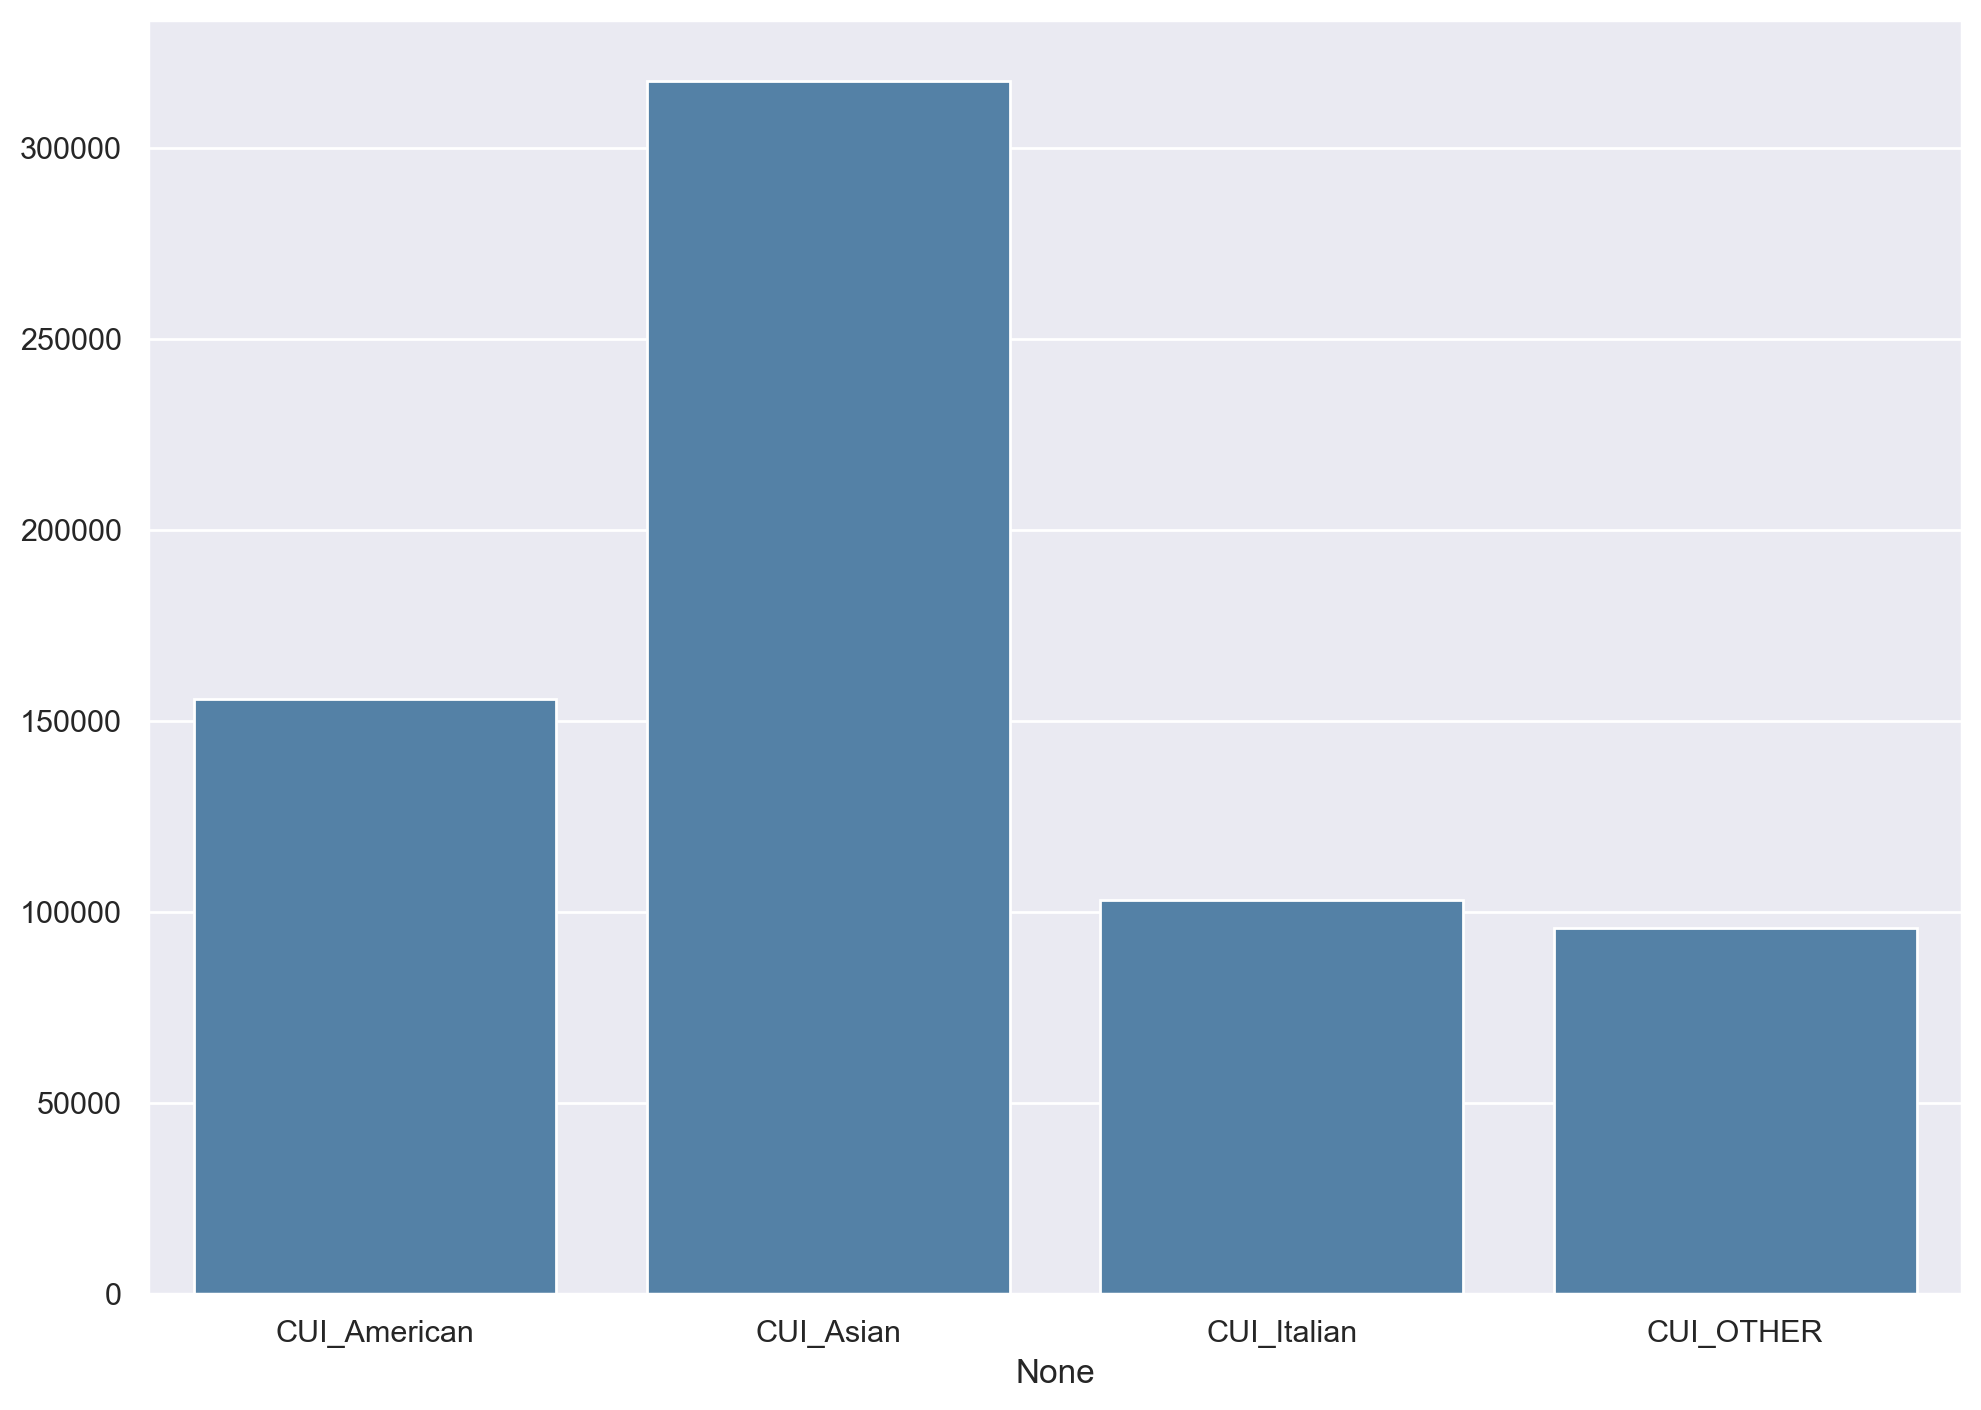

In [14]:
# Barplot with the total spending in the 4 generic cuisines
sns.barplot(x=df[['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']].sum().index, y=df[['CUI_American', 'CUI_Asian', 'CUI_Italian', 'CUI_OTHER']].sum().values, color='steelblue')

Asian cuisine is leading in total spending by a huge margin, followed by American and Italian cuisines.

#### Other Interesting Insights

In [15]:
# Healthy food on total spending
print(f"Healthy food on total spending: {round(df['CUI_Healthy'].sum()/total_spend*100, 2)}%")

Healthy food on total spending: 4.51%


In [16]:
# Unhealthy food on total spending
print(f"Unhealthy food on total spending: {round(df[['CUI_Desserts', 'CUI_Street Food / Snacks']].sum().sum()/total_spend*100, 2)}%")

Unhealthy food on total spending: 22.77%


In [17]:
# Cafe orders on total spending
print(f"Cafe orders on total spending: {round(df['CUI_Cafe'].sum()/total_spend*100, 2)}%")

Cafe orders on total spending: 3.8%


In [18]:
# Japanese cuisine significance in total spending
print(f"Japanese cuisine in total spending: {round(df['CUI_Japanese'].sum()/total_spend*100, 2)}%")

Japanese cuisine in total spending: 14.21%


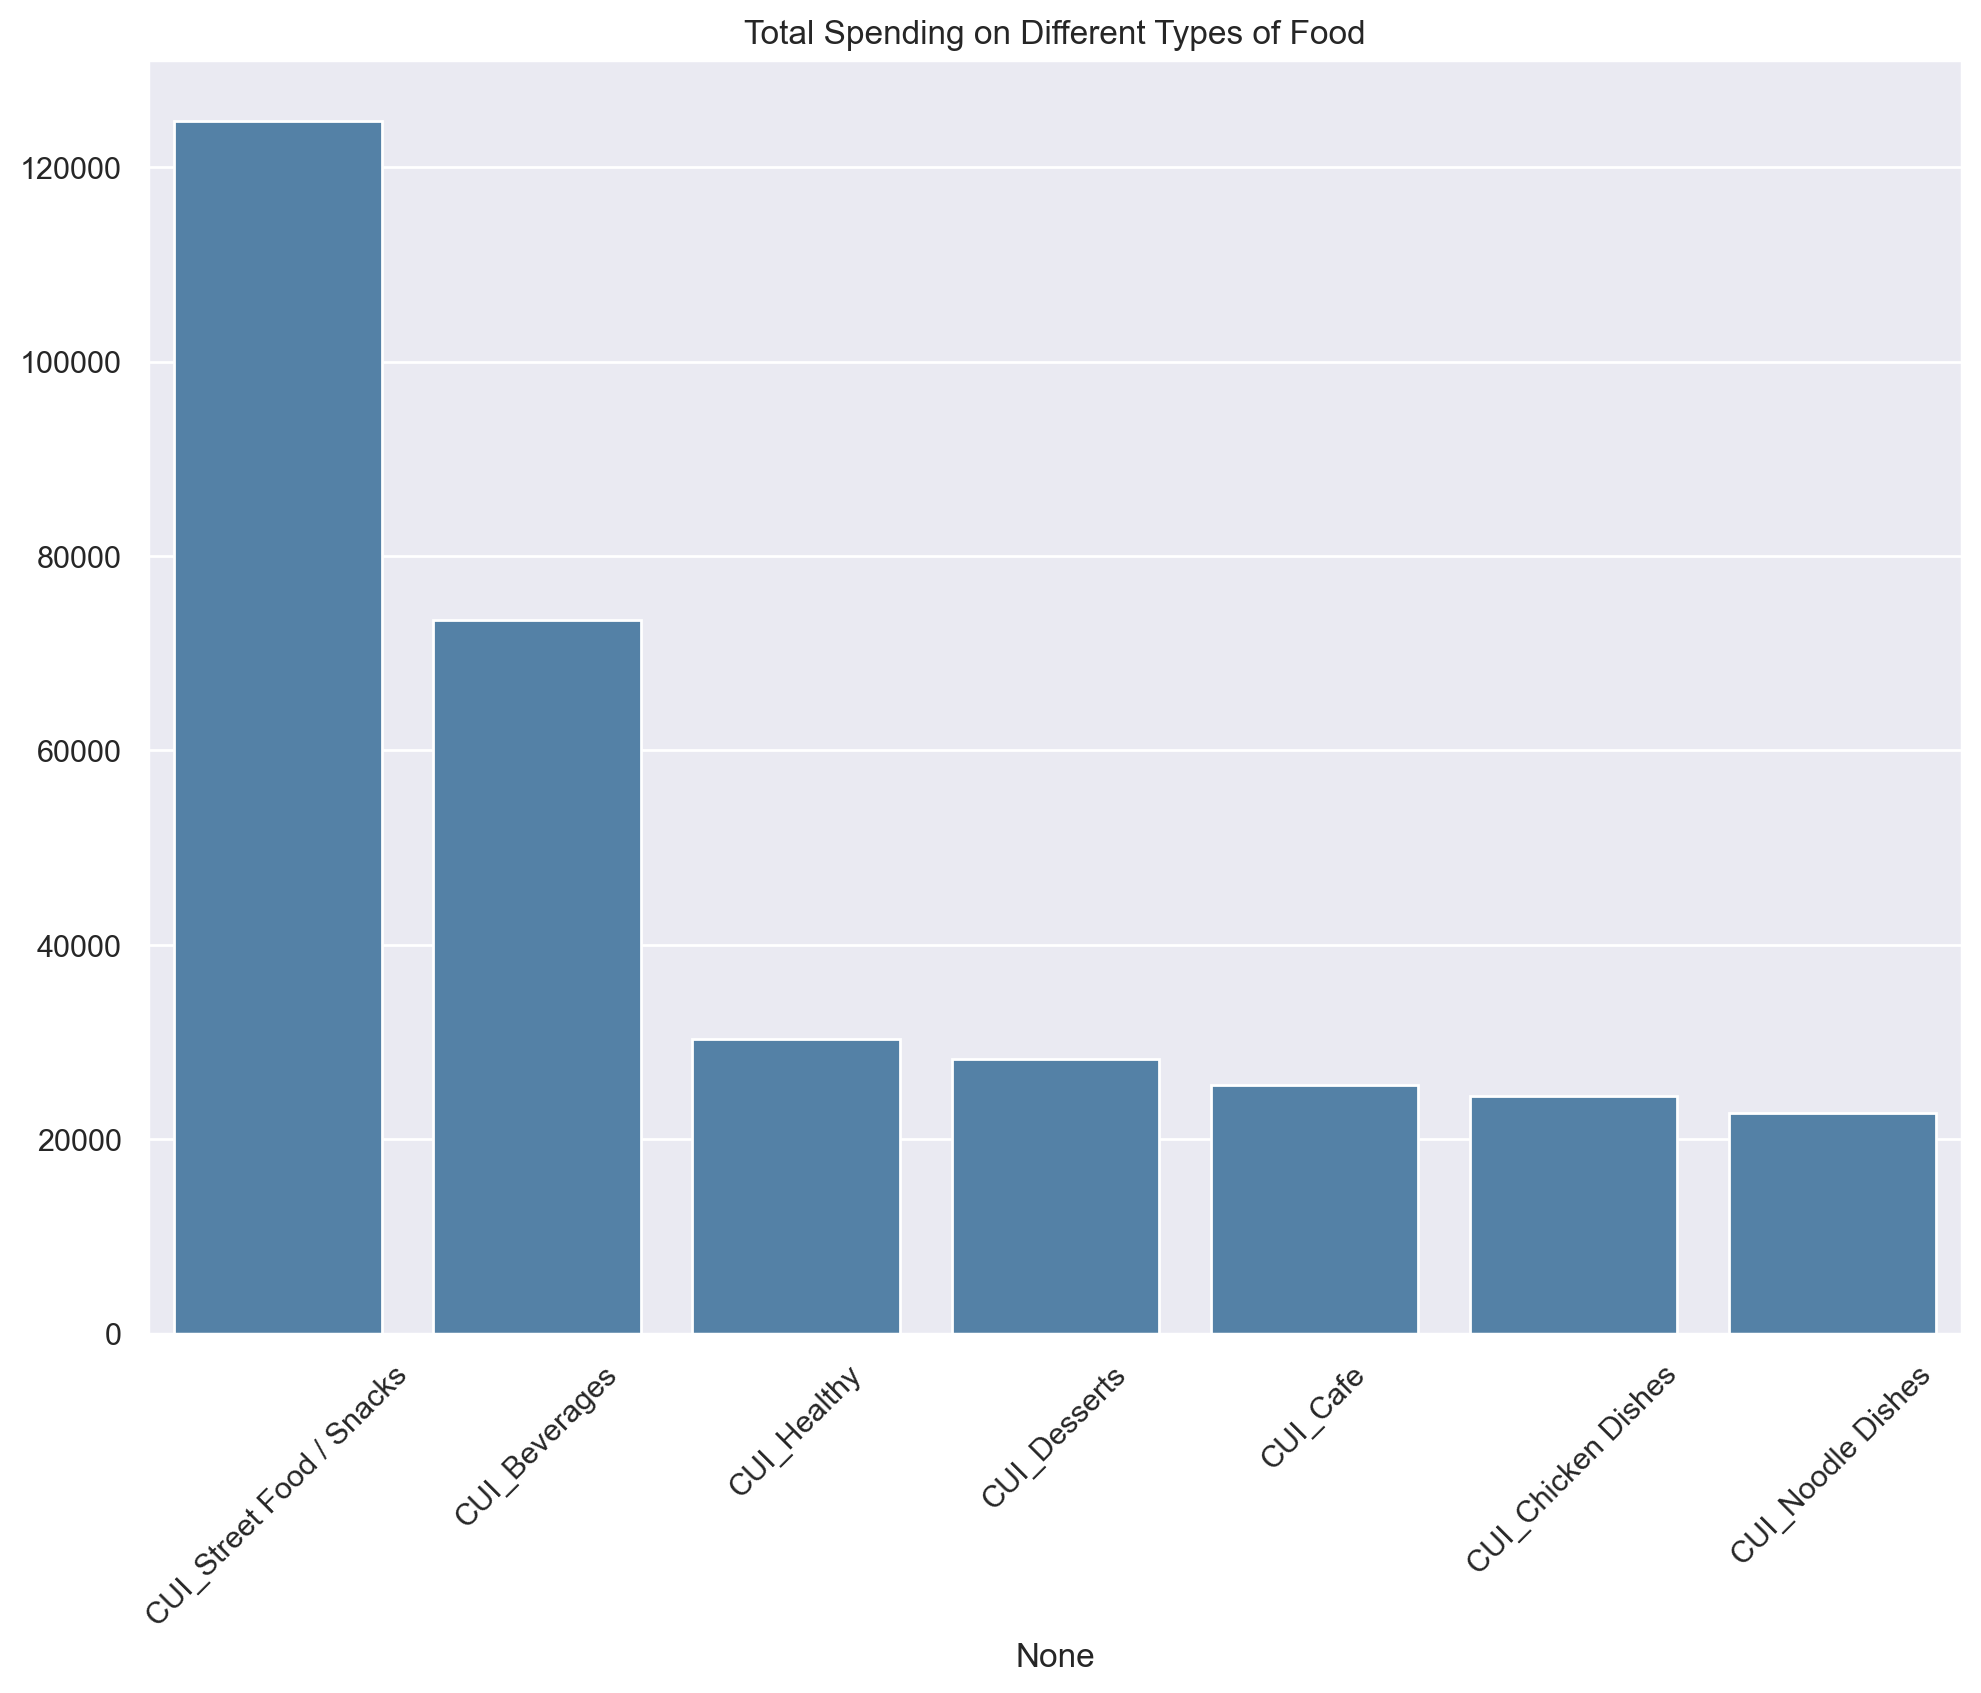

In [19]:
# Cuisines to be analyzed
tf = df[['CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Noodle Dishes', 'CUI_Street Food / Snacks']].sum().sort_values(ascending=False)

# Plotting the bar chart for the selected cuisines
sns.barplot(x=tf.index, y=tf.values, color='steelblue')

# Formatting the plot
plt.title('Total Spending on Different Types of Food')
plt.xticks(rotation=45)

plt.show()

## 3.2 Features' Distributions <a class="anchor" id="3.2"></a>

* Separating metric and non-metric features

In [20]:
non_metric_features = ["customer_region", "last_promo", "payment_method"] #categorical
metric_features = df.columns.drop(non_metric_features).to_list() #numeric

print('Non-metric features: {} \n\nMetric features: {} in the dataset'.format(non_metric_features, metric_features))

Non-metric features: ['customer_region', 'last_promo', 'payment_method'] 

Metric features: ['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'] in the dataset


* Metric features distributions

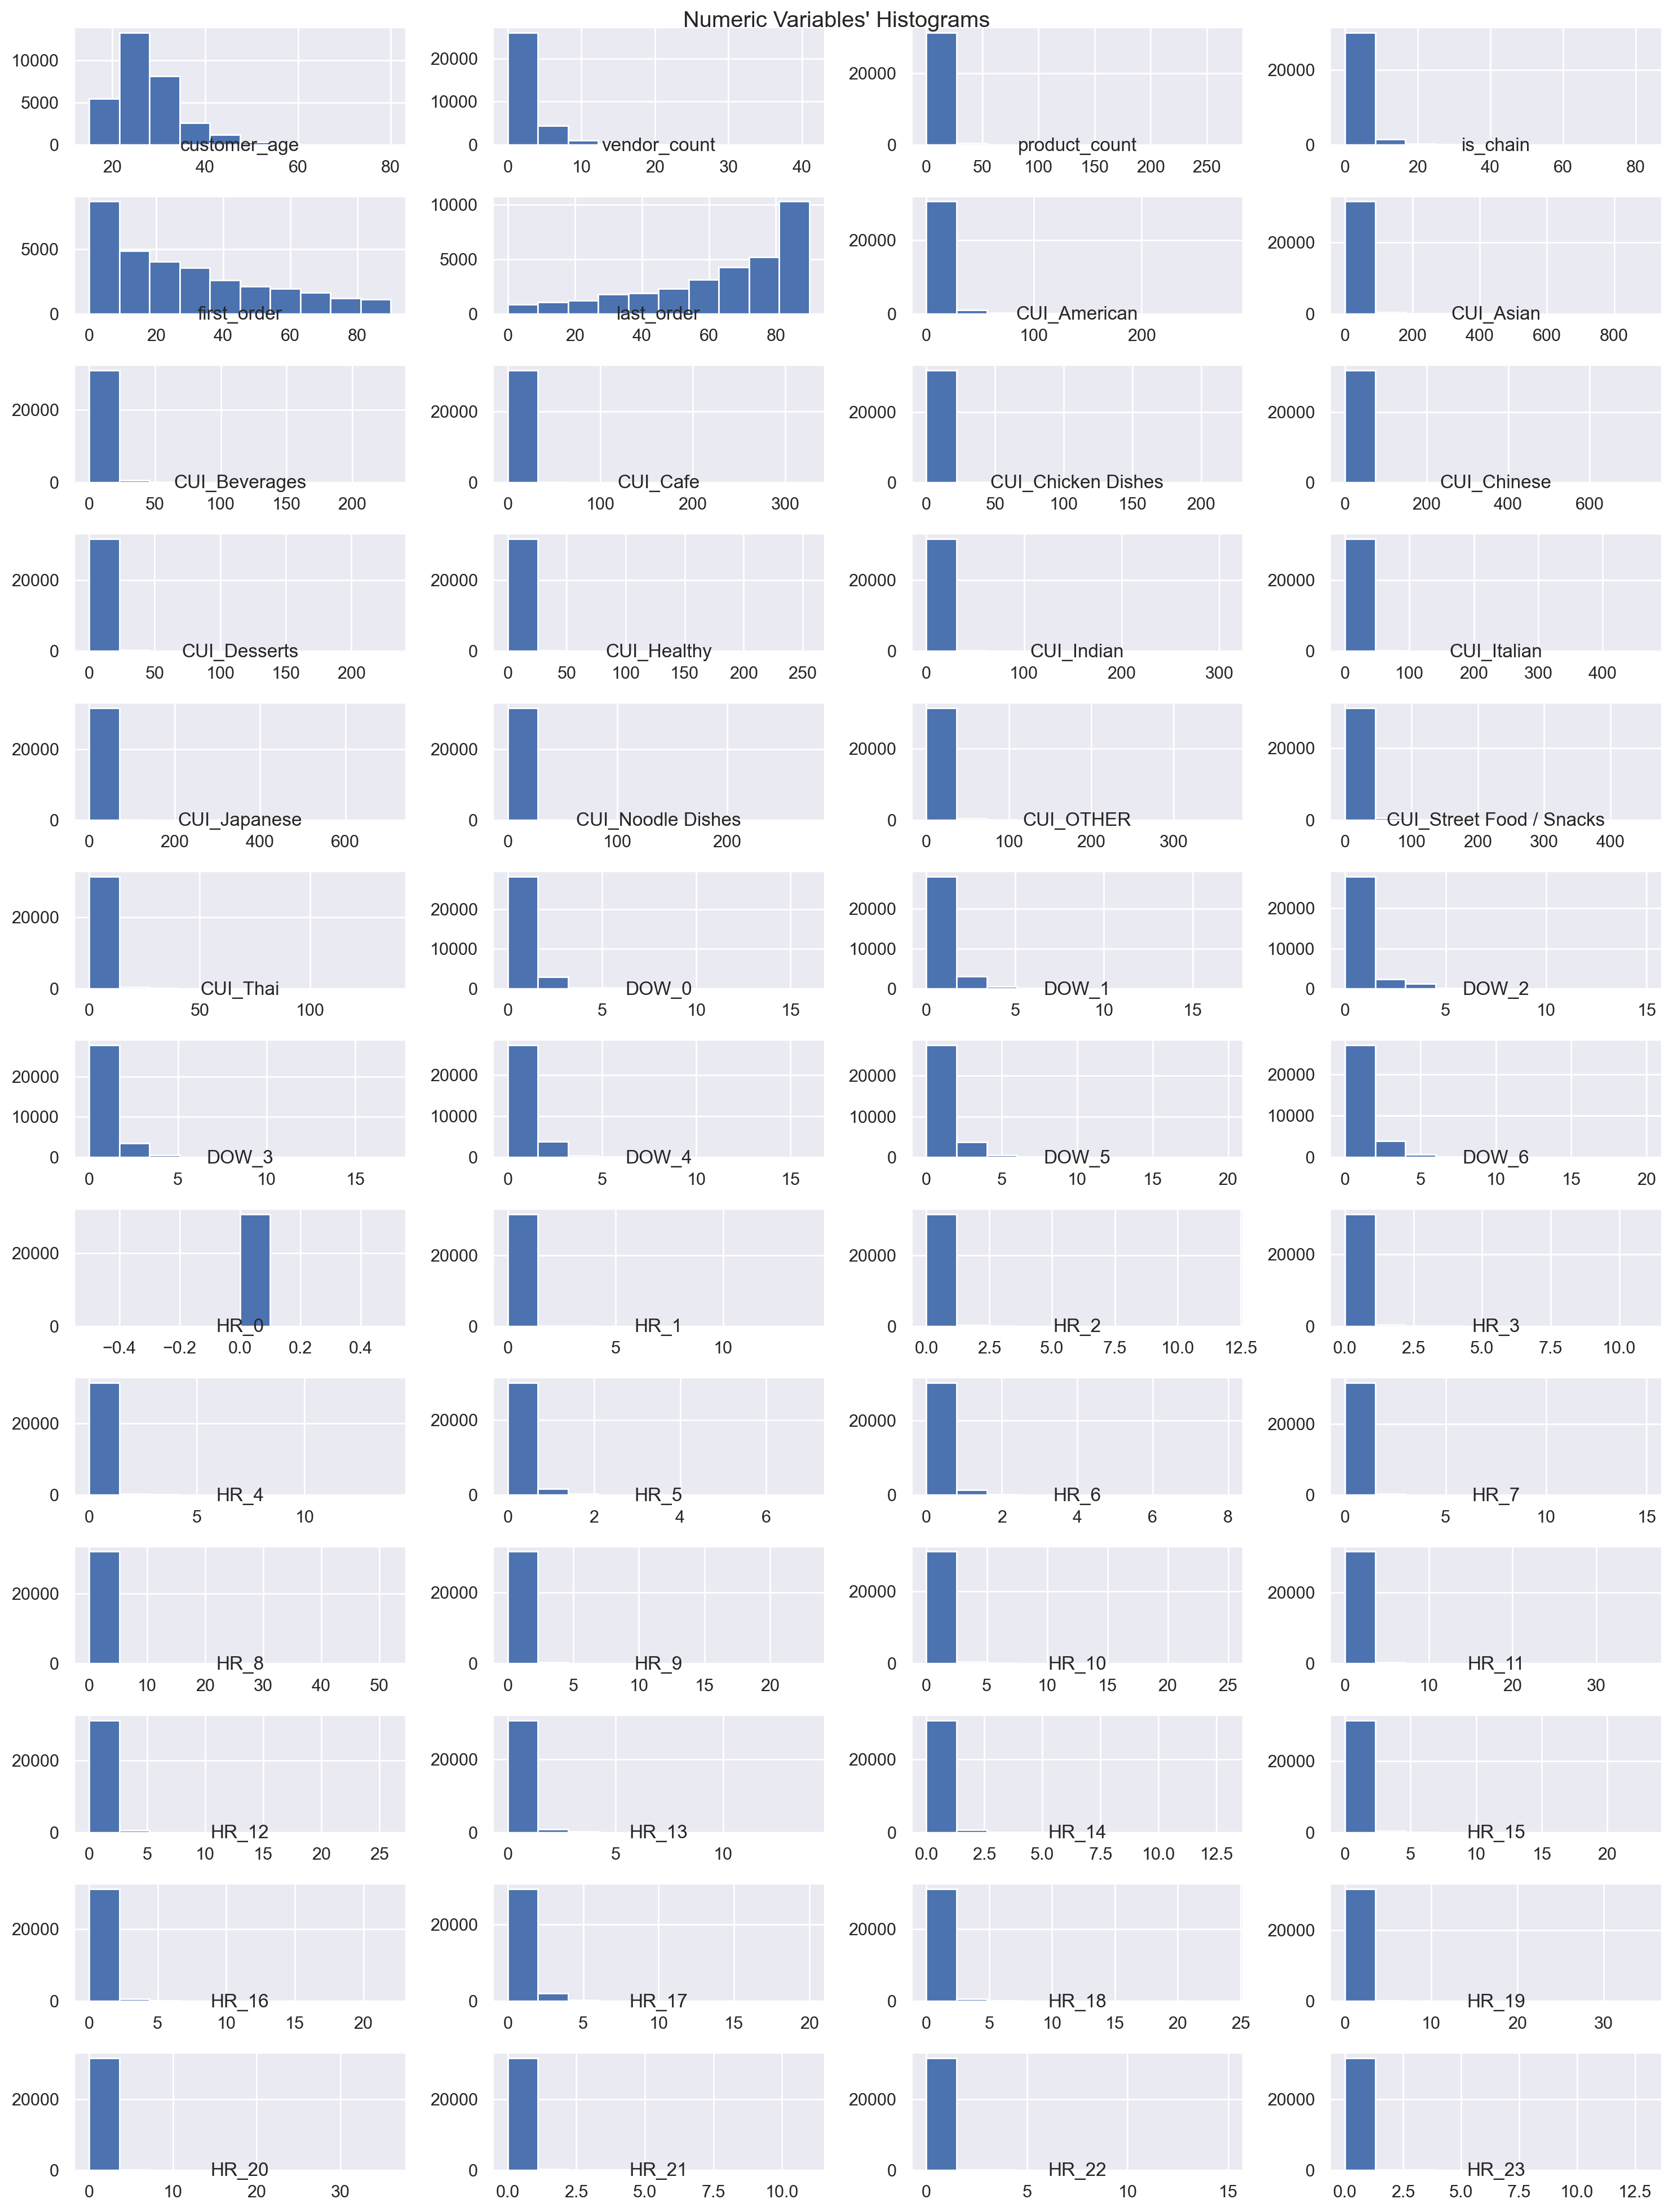

In [21]:
# Creating a grid of subplots
fig, axes = plt.subplots(13, 4, figsize=(15, 20), tight_layout=True)

# Iterating through the axes and the feature names to plot histograms
for ax, feat in zip(axes.flatten(), metric_features):
    # Cleaning the data by replacing infinite values with NaN and dropping NaNs
    cleaned_data = df[feat].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Only plotting the histogram if there is data available
    if len(cleaned_data) > 0:
        ax.hist(cleaned_data)  # Plotting the histogram for the cleaned data
        ax.set_title(feat, y=-0.13)  # Setting the title for the subplot, slightly below the axis
        
    else:
        ax.set_title(f'{feat} (no data)', y=-0.13)  # Indicating no data available
        ax.axis('off')  # Turning off the axis if there's no data

# Adding a centered title for the entire figure
plt.suptitle("Numeric Variables' Histograms")

# Checking if the output directory exists; if not, create it
output_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Displaying the figure
plt.show()

* Categorical features distributions

| customer_region   |   count |
|:------------------|--------:|
| 8670              |    9761 |
| 4660              |    9550 |
| 2360              |    8829 |
| 2440              |    1483 |
| 4140              |     857 |
| 8370              |     495 |
| 2490              |     445 |
| -                 |     442 |
| 8550              |      26 |


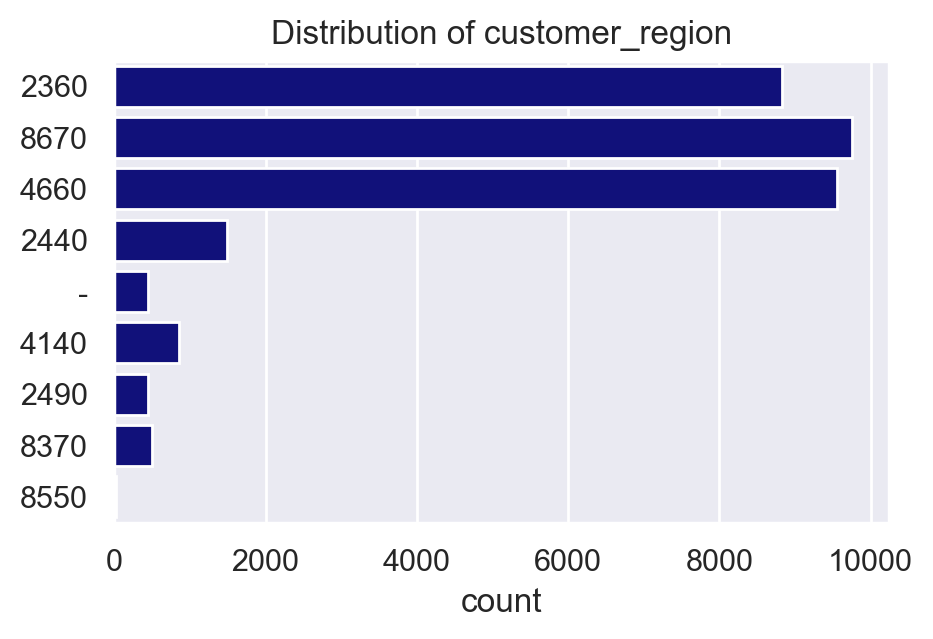

---------------------------------------------------------------------------------------------
| last_promo   |   count |
|:-------------|--------:|
| -            |   16748 |
| DELIVERY     |    6286 |
| DISCOUNT     |    4496 |
| FREEBIE      |    4358 |


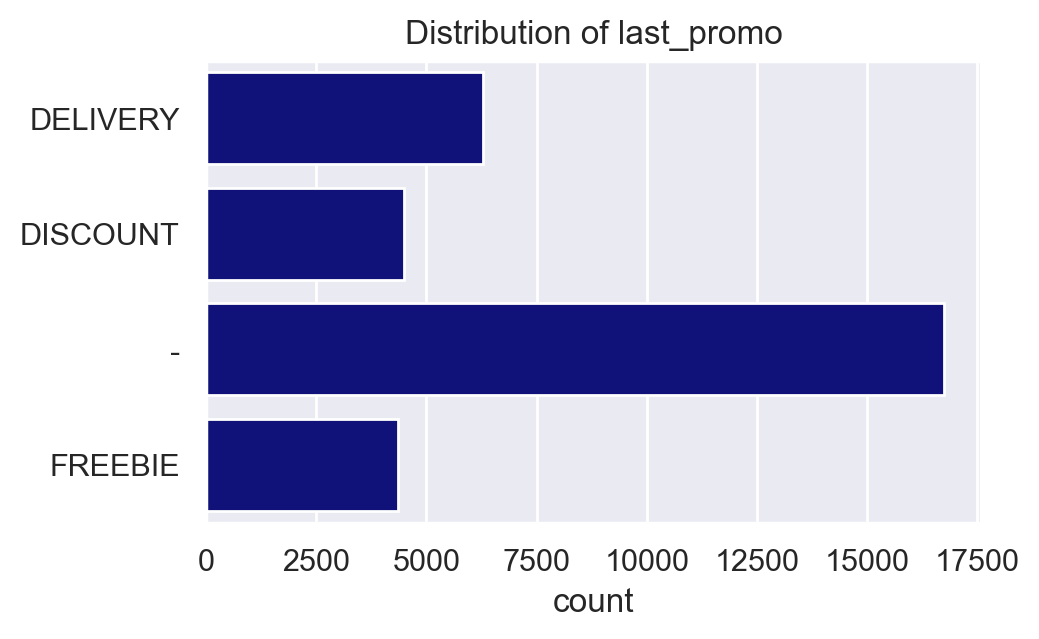

---------------------------------------------------------------------------------------------
| payment_method   |   count |
|:-----------------|--------:|
| CARD             |   20161 |
| DIGI             |    6101 |
| CASH             |    5626 |


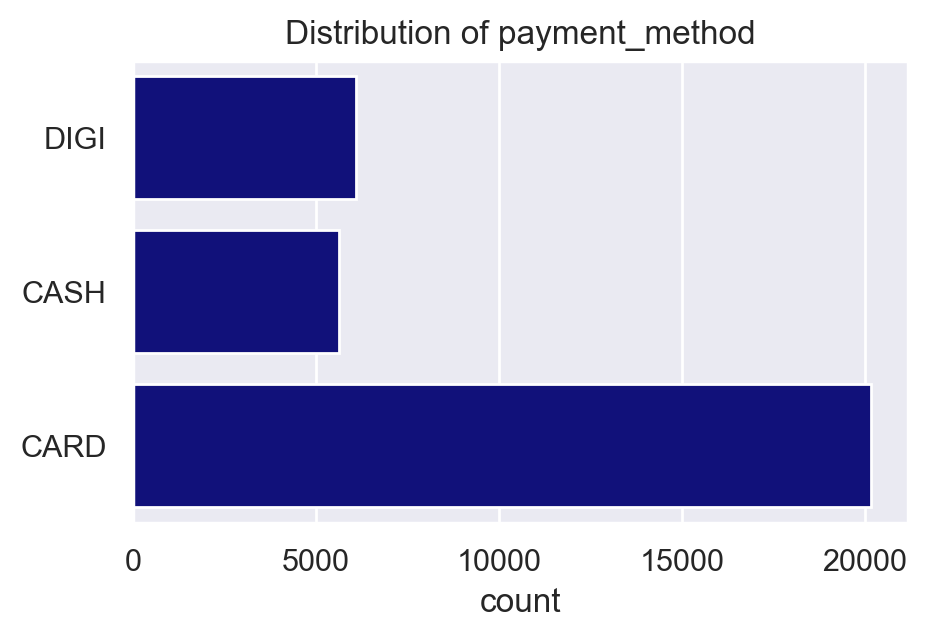

---------------------------------------------------------------------------------------------


In [22]:
# Loop through each non-metric feature
for col in non_metric_features:
    # Print value counts as a Markdown table
    print(df[col].value_counts().to_markdown())
    
    # Create a countplot
    plt.figure(figsize=(5, 3))
    plt.title(f'Distribution of {col}')
    sns.countplot(y=col, data=df, color="darkblue")
    plt.ylabel('')  
    plt.show()
    
    print('-' * 93)  # Separator for better output readability

**Customer Region:**
* An unspecified region (-) accounts for 442 entries, which could represent missing or unclassified data.

**Last Promo:**
* A significant portion (16,748 entries) has no recorded promotional activity (-), making up over 50% of the dataset.


## 3.3. Coherence Check <a class="anchor" id="3.3"></a>

* Checking if the sum of DOW columns is equal to the sum of HR columns

In [23]:
dow_columns = [f'DOW_{i}' for i in range(7)]
hr_columns = [f'HR_{i}' for i in range(24)]

# Checking if DOW total orders are equal to HR total orders
len(df[df[dow_columns].sum(axis=1).astype(int) == df[hr_columns].sum(axis=1).astype(int)]) == df.shape[0]

False

The sums don't match up, perhaps there is some missing data in one of the columns. Let's check this hypothesis.

In [24]:
df[df[dow_columns].sum(axis=1).astype(int) != df[hr_columns].sum(axis=1).astype(int)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1165 entries, ae38da6386 to 6624e03cdd
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           1165 non-null   object 
 1   customer_age              1138 non-null   float64
 2   vendor_count              1165 non-null   int64  
 3   product_count             1165 non-null   int64  
 4   is_chain                  1165 non-null   int64  
 5   first_order               1164 non-null   float64
 6   last_order                1165 non-null   int64  
 7   last_promo                1165 non-null   object 
 8   payment_method            1165 non-null   object 
 9   CUI_American              1165 non-null   float64
 10  CUI_Asian                 1165 non-null   float64
 11  CUI_Beverages             1165 non-null   float64
 12  CUI_Cafe                  1165 non-null   float64
 13  CUI_Chicken Dishes        1165 non-null   float64
 14

It can be concluded that this inconsistency is caused by 'HR_0' missing values. This column missing values will be later imputed using the sum of DOW columns and HR columns and calculating the difference.

* Checking for customers with 0 orders:

In [25]:
# Seeing if there are customers with 0 orders
df["product_count"].value_counts().sort_index(ascending=True)[0]

156

There are 156 customers in our dataset whom haven't ordered anything yet. Customers with 0 products ordered are strange cases because they are registered in the database but haven't ordered any products yet.

* Customers with 0 vendors:

In [26]:
# Seeing if there are customers with 0 vendors
df["vendor_count"].value_counts().sort_index(ascending=True)[0]

138

There are 138 cases where customers have ordered from 0 vendors. This is also strange.

* Customers that haven't spent money in any cuisine:

In [27]:
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]

# Seeing if there are customers who haven't spent any money in any cuisine
len(df[df[cuisine_columns].sum(axis=1) == 0])

138

This value (138) matches the previous number of cases where customers have ordered from 0 vendors. Let's check if the rows are the same.

In [28]:
df[df["vendor_count"] == 0].equals(df[df[cuisine_columns].sum(axis=1) == 0])

True

They are indeed the same customers.

* Checking for customers who have a product count lower than their order count:

In [29]:
# Seeing if there are customers with a product count lower than their order count
len(df[df['product_count'] < df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)])

18

A total of 18 customers meet this description, which is also strange because "n" orders should have associated at least "n" products.

We will now explore the age and region of these customers. 
We will consider anomalies:
 * People who are registered but haven't ordered yet 
 * Inconsistent values, such as people whose product count is lower than the order counts.

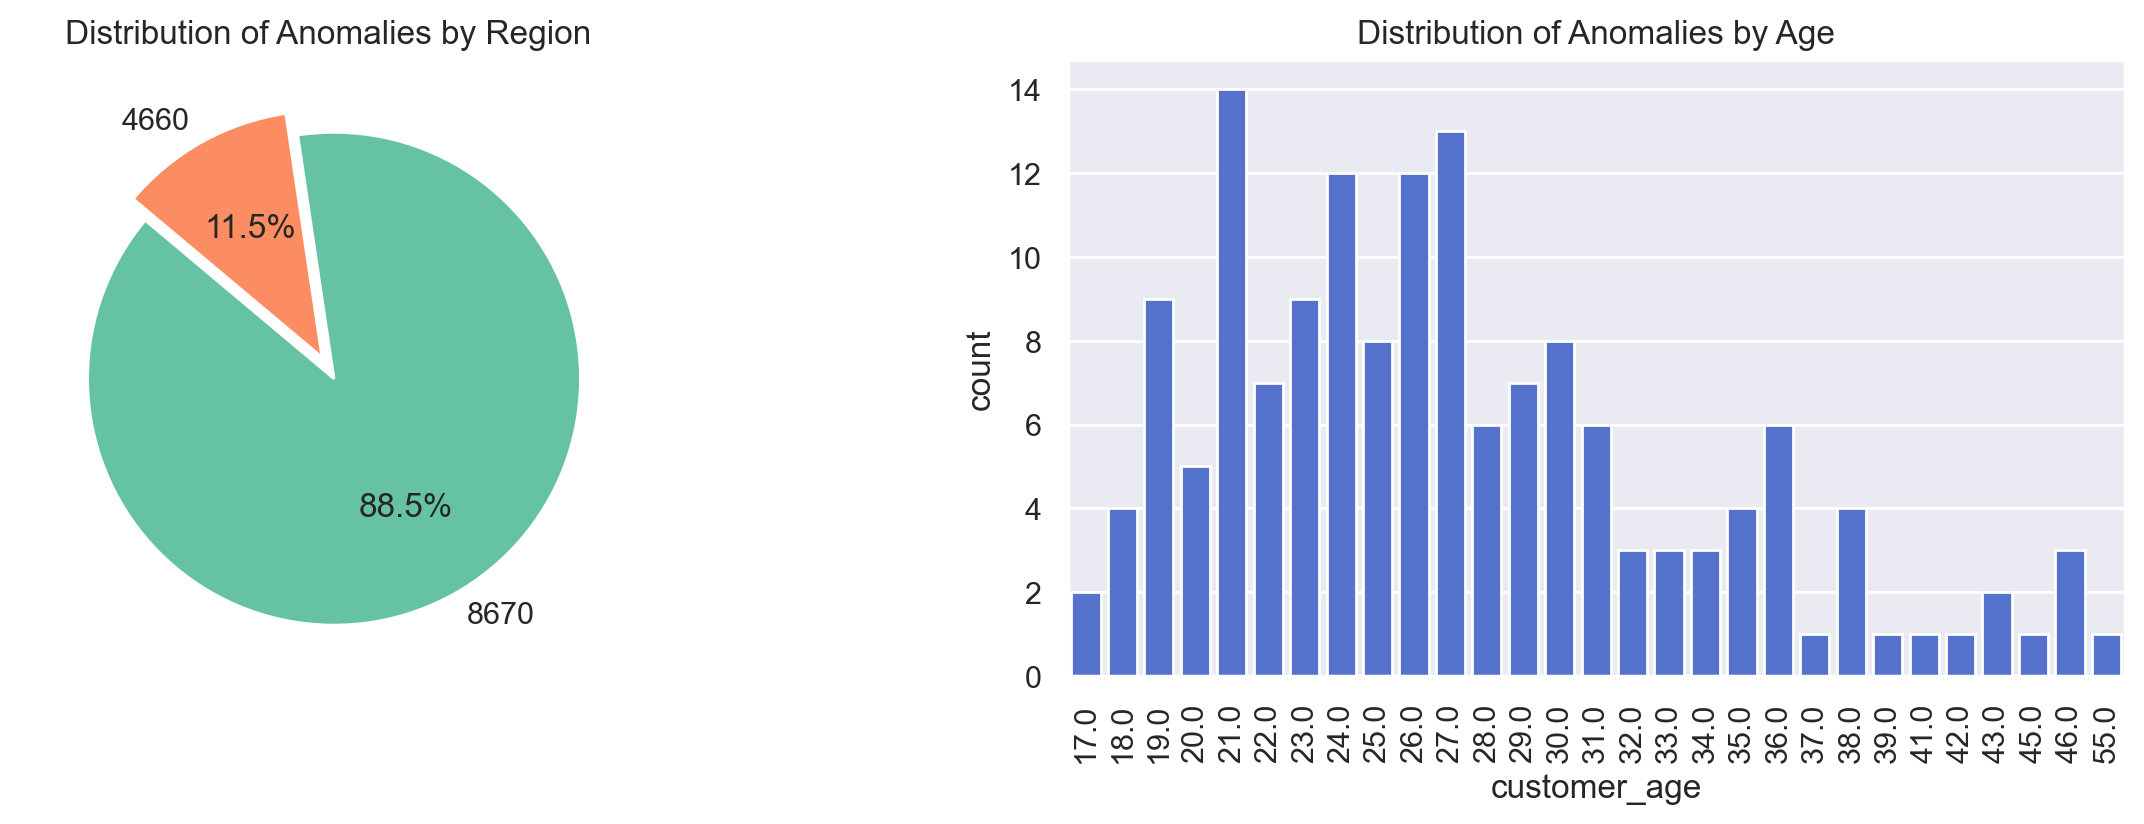

In [30]:
# DF with the anomalies found
anomalies = df[(df["product_count"] == 0) | (df["vendor_count"] == 0) | (df['product_count'] < df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1))]

# Region counts of the anomalies
region_counts = anomalies['customer_region'].value_counts()

total_anomalies = region_counts.sum()

# Identify regions with less than 10% occurrence
low_occurrence_regions = region_counts[region_counts < 0.10 * total_anomalies]

# Group low occurrence regions into "Other"
region_counts_grouped = region_counts.copy()
region_counts_grouped['Other'] = low_occurrence_regions.sum()
region_counts_grouped = region_counts_grouped[region_counts_grouped >= 0.10 * total_anomalies]

# Defining the color palette
palette_color = sns.color_palette('Set2')

# Creating the subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

# Plotting the distribution of anomalies by region
axs[0].pie(region_counts_grouped, labels=region_counts_grouped.index, autopct='%1.1f%%', startangle=140,
           colors=palette_color, explode=[0.05 if label in ['8670', 'Other', '4660'] else 0 for label in region_counts_grouped.index])
axs[0].set_title('Distribution of Anomalies by Region')

# Plotting the distribution of anomalies by age
sns.countplot(data=anomalies, x='customer_age', ax=axs[1], color="royalblue")
plt.xticks(rotation=90)
axs[1].set_title('Distribution of Anomalies by Age')

plt.show()

## 3.4. Outliers Check <a class="anchor" id="3.4"></a>

* Quick check on outliers

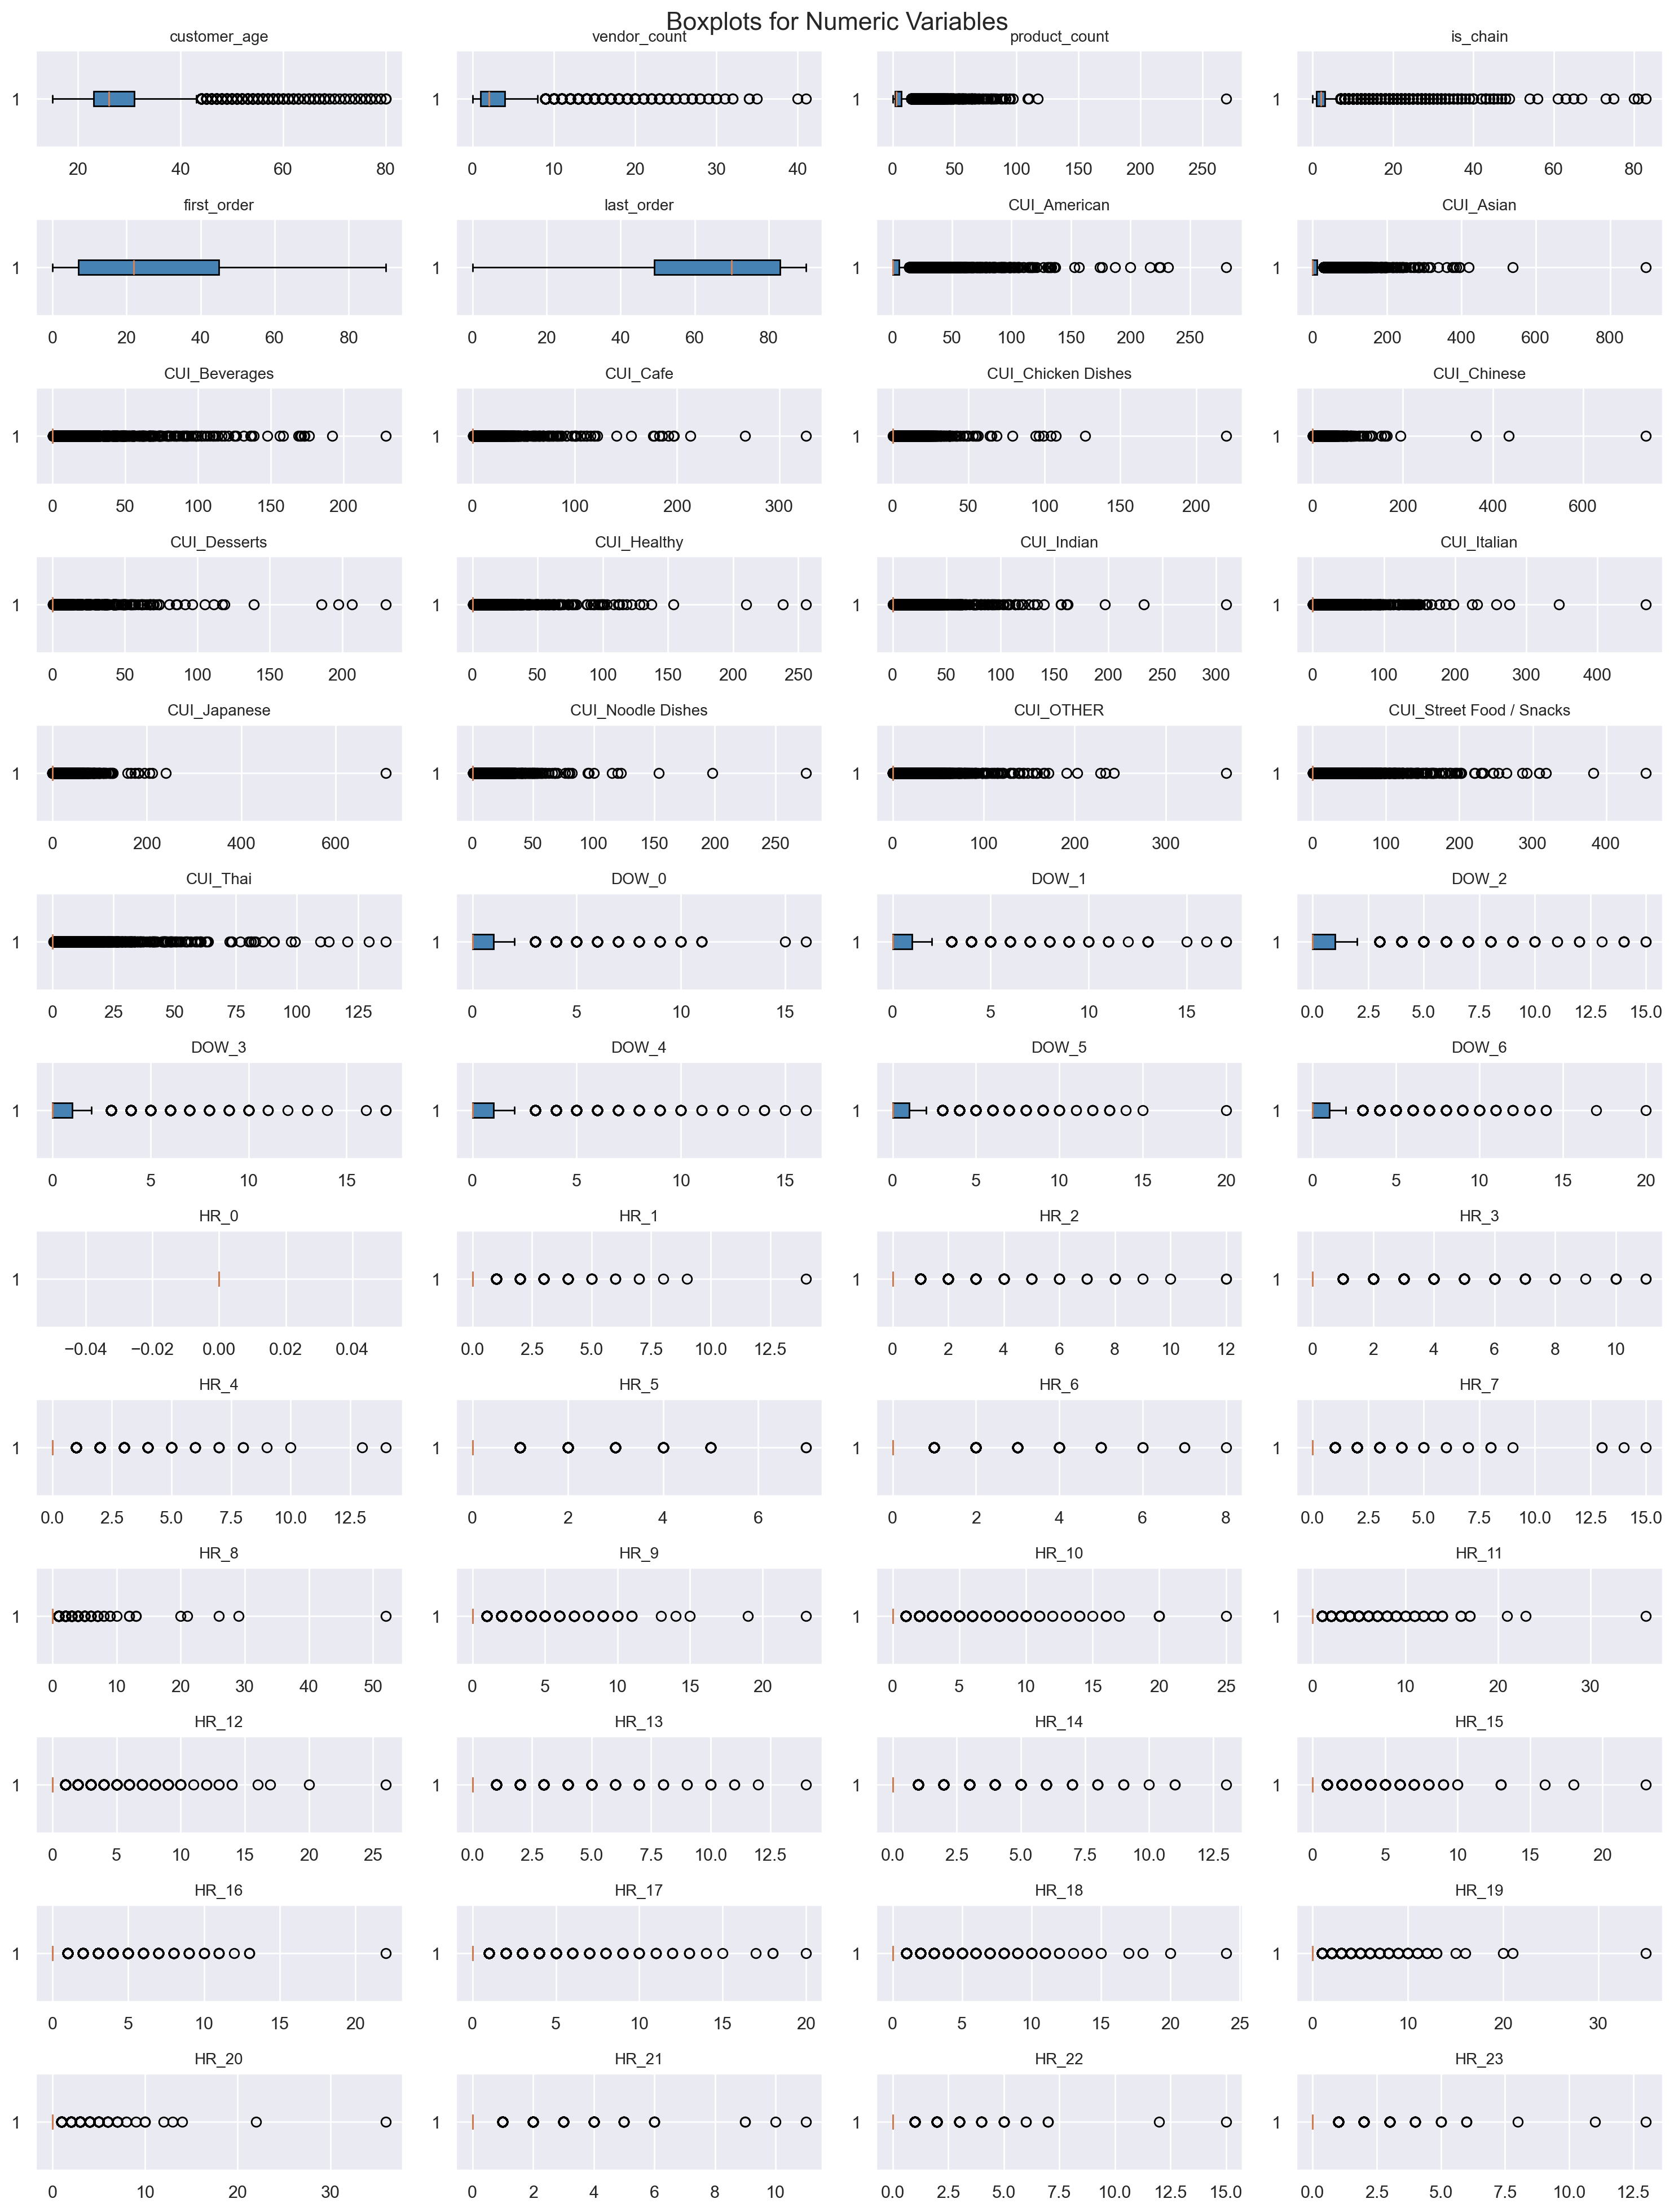

In [31]:
# Creating a grid of subplots for boxplots
fig, axes = plt.subplots(13, 4, figsize=(15, 20), tight_layout=True)

# Flattening axes for easier iteration
axes = axes.flatten()

# Iterating through the axes and the feature names to plot boxplots
for ax, feat in zip(axes, metric_features):
    # Cleaning the data by replacing infinite values with NaN and dropping NaNs
    cleaned_data = df[feat].replace([np.inf, -np.inf], np.nan).dropna()
    
    # Only plotting the boxplot if there is data available
    if not cleaned_data.empty:
        ax.boxplot(cleaned_data, vert=False, patch_artist=True, boxprops=dict(facecolor="steelblue"))
        ax.set_title(feat, fontsize=10, loc='center')  # Setting the title for the subplot
        ax.set_xlabel("")  # No xlabel to save space
    else:
        ax.set_title(f'{feat} (no data)', fontsize=10)  # Indicating no data available
        ax.axis('off')  # Turning off the axis if there's no data

# Hide any unused subplots
for ax in axes[len(metric_features):]:
    ax.axis('off')

# Adding a centered title for the entire figure
plt.suptitle("Boxplots for Numeric Variables", fontsize=16)

# Displaying the figure
plt.show()

We can observe the presence of outliers in most boxplots. On the next section, we will provide a more detailed treatment for these values.

<a class="anchor" id="forth-bullet">

# 4. Data Preprocessing

##  4.1. Troublesome Values <a class="anchor" id="4.1"></a>

###  4.1.1 Handling Anomalies and Duplicates <a class="anchor" id="4.1.2"></a>

* Checking duplicates:

In [32]:
# Checking for duplicates
print(f"There are {df.duplicated().sum()} duplicated rows")

df[df.duplicated()].head()

There are 60 duplicated rows


customer_region  customer_age  vendor_count  product_count  \
customer_id                                                              
4336560739             2360          24.0             1              2   
dcc76a0a1b             4660          32.0             3              4   
b55012ee1c             8550          23.0             4             11   
a59a79af83             4660          25.0             4              5   
49a726df01             2360          29.0            11             39   

             is_chain  first_order  last_order last_promo payment_method  \
customer_id                                                                
4336560739          0          0.0          11   DELIVERY           DIGI   
dcc76a0a1b          3          1.0          43          -           CARD   
b55012ee1c          1          2.0          89    FREEBIE           CARD   
a59a79af83          5          3.0          69          -           CARD   
49a726df01         24          3.0          75   DELIVERY           CARD   

             CUI_American  ...  HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  \
customer_id                ...                                             
4336560739           0.00  ...      0      0      0      0      0      0   
dcc76a0a1b          10.15  ...      0      1      2      0      0      0   
b55012ee1c           0.00  ...      0      0      0      0      0      0   
a59a79af83          11.59  ...      0      1      1      2      0      0   
49a726df01           0.00  ...      3      2      1      1      1      0   

             HR_20  HR_21  HR_22  HR_23  
customer_id                              
4336560739       1      0      0      0  
dcc76a0a1b       0      0      0      0  
b55012ee1c       0      0      0      0  
a59a79af83       1      0      0      0  
49a726df01       1      0      0      1  

[5 rows x 55 columns]

* Remark: Duplicates appear in pairs (they have the same information as some other observation in the dataset, only different id's). We decided to drop one of them, since they're adding redundant information to the dataset, giving more weight to specific behaviours.

* Dropping duplicates

In [33]:
df.drop_duplicates(inplace=True)

We previously considered anomalies people who are registered but haven't ordered yet, and inconsistent values such as people whose product count is lower than the order counts. The impacts of removing such anomalies are shown below.

In [34]:
# Assuming 'anomalies' contains rows removed from the original df
original_size = df.shape[0]  # Total rows before removing anomalies
cleaned_size = df.shape[0] - anomalies.shape[0]  # Rows left after removing anomalies

# Calculate the percentage of data retained
percentage_kept = 100 * (cleaned_size / original_size)

print('Percentage of data kept after removing anomalies:', np.round(percentage_kept, 4))

Percentage of data kept after removing anomalies: 99.5099


We lose less than 1% of our data, thereby it is not troublesome to drop these rows. We will remove them im the code snippet below.

In [35]:
df = df.loc[~df.index.isin(anomalies.index.tolist()), :]

### 4.1.2 Handling Strange Values

There is a strange character '-' in both 'customer_region' and 'last_promo' columns. First lets take a look at each feature distribution.

#### customer_region

In [36]:
df["customer_region"].value_counts()

customer_region
8670    9610
4660    9515
2360    8815
2440    1482
4140     856
8370     495
2490     444
-        442
8550      13
Name: count, dtype: int64

The '-' are very few and don't specify any given location, so this values will be treated as missing values.

In [37]:
# Step 2: Replace "-" with NaN value
df["customer_region"] = df["customer_region"].replace("-", np.nan)

#### last_promo

In [38]:
df["last_promo"].value_counts()

last_promo
-           16667
DELIVERY     6216
DISCOUNT     4458
FREEBIE      4331
Name: count, dtype: int64

In this case there are a lot of rows with '-' value, but there is no value to represent a full price purchase. It can be assumed that '-' indicates a full price last purchase so this values will be replaced with "Full Price".

In [39]:
df["last_promo"] = df["last_promo"].replace("-", 'FULL PRICE')

In [40]:
df["last_promo"].value_counts()

last_promo
FULL PRICE    16667
DELIVERY       6216
DISCOUNT       4458
FREEBIE        4331
Name: count, dtype: int64

###  4.1.3 Handling Missing Values <a class="anchor" id="4.1.2"></a>

* Check for missing values

In [41]:
print(f"Missing values per column:\n{df.isna().sum()}")

Missing values per column:
customer_region              442
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5           

**Missing values in the following columns:**
- customer_age - 727
- first_order - 106 
- HR_0 - 1165
- customer region - 442

#### **customer_age**:

In [42]:
df[["customer_age"]].dtypes

customer_age    float64
dtype: object

In [43]:
df_customer_age = df["customer_age"].dropna().astype(int)

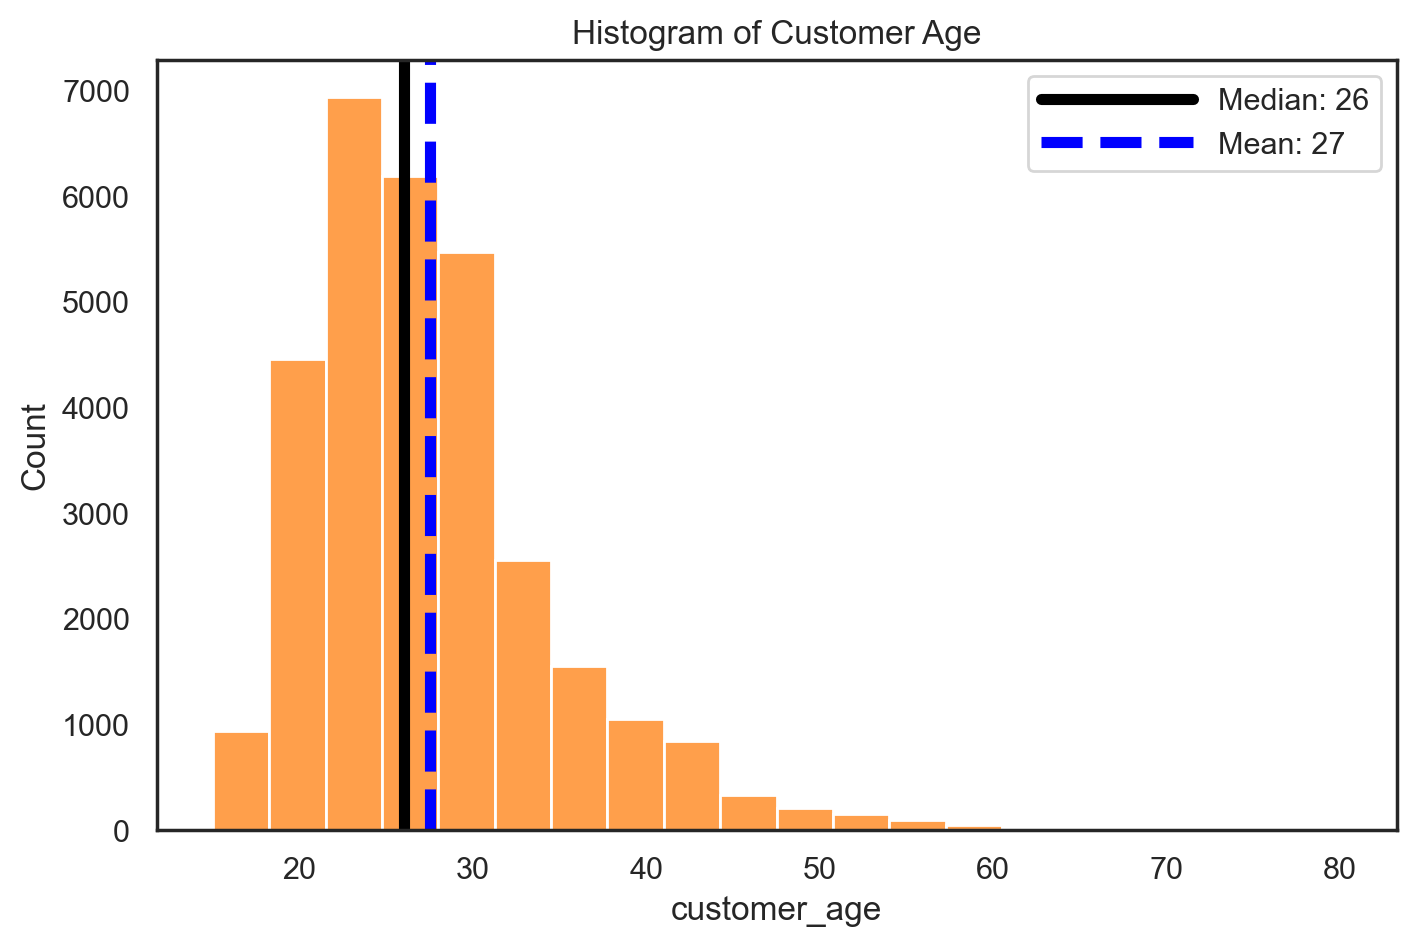

In [44]:
# Calculate statistics
median_age = np.median(df_customer_age)
mean_age = np.mean(df_customer_age)

# Set up the plot
sns.set_theme(style="white", palette=None)
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the histogram
sns.histplot(df['customer_age'], bins=20, ax=ax, color='tab:orange')

# Add vertical lines for median and mean
ax.axvline(median_age, color='black', linewidth=4,
           label=f'Median: {int(median_age)}')
ax.axvline(mean_age, color='blue', linestyle='dashed', linewidth=4,
           label=f'Mean: {int(mean_age)}')

# Add legend and title
ax.legend(handlelength=5)
ax.set_title("Histogram of Customer Age")

# Show the plot
plt.show()

# Reset seaborn to default
sns.set()

For this feature, there is no significant difference between median or mean. 

In [45]:
df['customer_age'] = df['customer_age'].fillna(df['customer_age'].median())

#### **first_order:**

In [46]:
df[["first_order"]].dtypes

first_order    float64
dtype: object

In [47]:
df[df["first_order"].isna()].shape[0]

106

There are only 106 rows missing values so dropping them won't have much impact and can avoid unnecessary noise. Dropping missing values in first order:

In [48]:
df.dropna(subset=['first_order'], inplace=True)

#### **HR_0:**

We will substitute the missing values by the difference in total orders calculated with day of the week and hour of the day (we can do this because the DOW columns don't have any missing values). Let's check if DOW total orders are always bigger or equal to HR total orders.

In [49]:
dow_columns = [f'DOW_{i}' for i in range(7)]
hr_columns = [f'HR_{i}' for i in range(24)]

# Checking if DOW total orders are always bigger or equal than HR total orders
len(df[df[dow_columns].sum(axis=1).astype(int) >= df[hr_columns].sum(axis=1).astype(int)]) == df.shape[0]

True

It is true, so we can proceed to the imputation.

In [50]:
# Substituting missing values in HR_0 with the difference between DOW total orders and HR total orders
df['HR_0'] = df['HR_0'].fillna(df[dow_columns].sum(axis=1).astype(int) - df[hr_columns].sum(axis=1).astype(int))

* Checking if total orders is independently of the perspective that is calculated.

In [51]:
# Checking if both ways of calculating total orders give the same result
df[dow_columns].sum(axis=1).astype(int).equals(df[hr_columns].sum(axis=1).astype(int))

True

HR_0 column is now coherent with the rest of the data.

#### **customer_region:**

In [52]:
df["customer_region"].fillna(df["customer_region"].mode()[0], inplace=True)

We replaced the missing values in customer_region by the mode value, 8670. <br>

Now, no missing values should be present. Let's check them:

In [53]:
# Check if there are still missing values
pd.set_option('display.max_rows', None)  # Show all rows

# Count of missing values
df.isna().sum().rename("NaN Count")

customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1                        0
HR_2      

##  4.2. First Outliers Treatment <a class="anchor" id="4.2"></a>

For the outlier removal, we are looking in depth into the boxplots to manually define thresholds.  

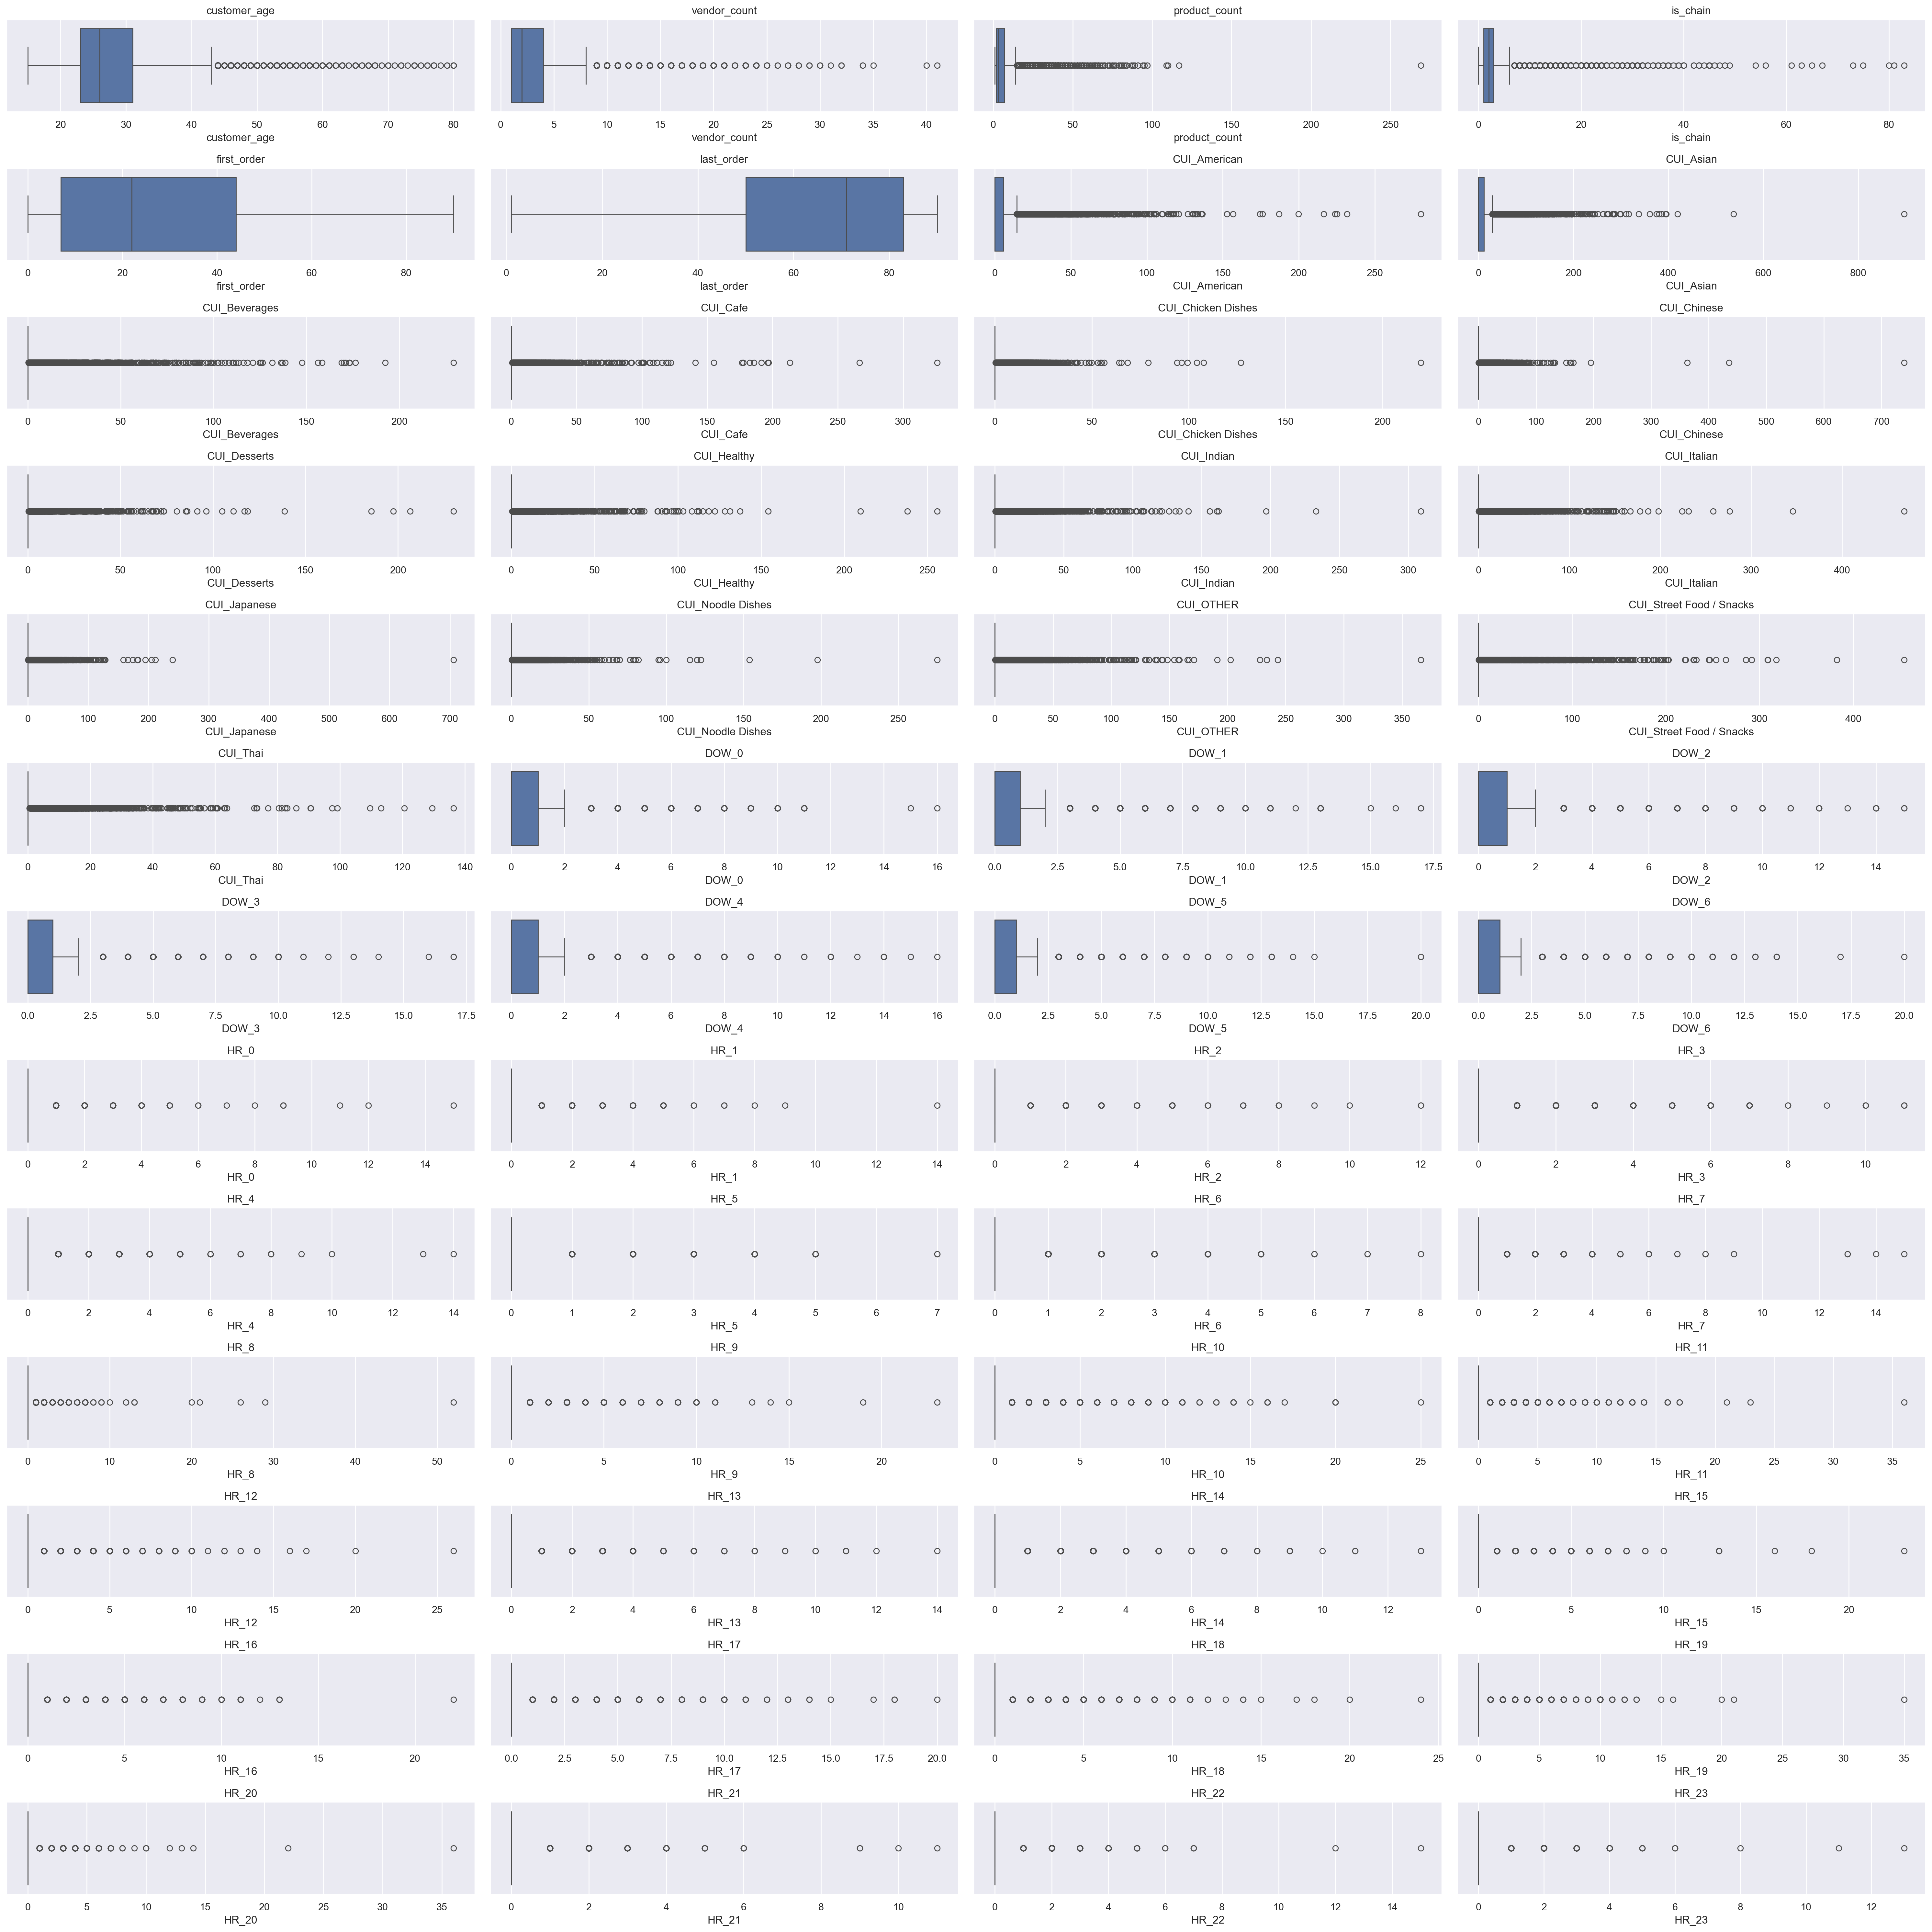

In [54]:
# Creating a 9x9 grid of subplots
fig, axes = plt.subplots(13, 4, figsize=(30, 30), tight_layout=True)

# Iterating across axes and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features):
    # Ensuring the column exists and is numeric
    if feat in df.columns and pd.api.types.is_numeric_dtype(df[feat]):
        sns.boxplot(x=df[feat], ax=ax)
        ax.set_title(feat)
    else:
        ax.set_title(f"{feat} (not numeric)")  
        ax.axis('off')  # Turning off the axis if it's not numeric

# Showing the plot
plt.show()

After a visual examination of the boxplots, we selected appropriate and personalized tresholds:

In [55]:
filters_man = (
    (df['customer_age']<= 50)
    &
    (df['vendor_count']<= 30)
    &
    (df['product_count']<= 70)
    &
    (df['is_chain']<= 40)
    &
    (df['customer_region'] != "8550")
    &
    (df['CUI_American']<= 95)
    &
    (df['CUI_Asian']<= 200)
    &
    (df['CUI_Beverages']<= 120)
    &
    (df['CUI_Cafe']<= 120)
    &
    (df['CUI_Chicken Dishes']<= 60)
    &
    (df['CUI_Chinese']<= 100)
    &
    (df['CUI_Desserts']<= 70)
    &
    (df['CUI_Healthy']<= 80)
    &
    (df['CUI_Indian']<= 100)
    &
    (df['CUI_Italian']<= 150)
    &
    (df['CUI_Japanese']<= 105)
    &
    (df['CUI_Noodle Dishes']<= 70)
    &
    (df['CUI_OTHER']<= 95)
    &
    (df["CUI_Street Food / Snacks"] <= 160)
    &
    (df["CUI_Thai"] <= 65)
    &
    (df["DOW_0"] <= 11)
    &
    (df["DOW_1"] <= 13)
    &
    (df["DOW_3"] <= 14)
    &
    (df["DOW_5"] <= 15)
    &
    (df["DOW_6"] <= 14)
)

df_man = df[filters_man]

We're not defining tresholds for HR_ columns, as their outliers are giving us relevant information that should be taken into consideration

In [56]:
print('Percentage of data kept after removing outliers:', np.round(df_man.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9753


We loose less than 3% of our data by removing the outliers so let's do it.

In [57]:
# Change the original Dataset
df = df[filters_man]

##  4.3. Feature Engineering <a class="anchor" id="4.3"></a>

According to the DOW_'s distribution, we decided to group sunday-wednesday in weekdays and thursday-saturday in weekend days, since those days presented fairly similar distributions. Additionaly, we're calculating the mean per group for simplificity purposes. 

In [58]:
# Week_days (Dow_0 to Dow_3) and Weekend_days (Dow_4 to Dow_6)
df['Week_days_mean'] = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3']].mean(axis=1)
df['Weekend_days_mean'] = df[['DOW_4', 'DOW_5', 'DOW_6']].mean(axis=1)

# Lunch HR (HR_8 to HR_13), Dinner HR (HR_14 to HR_20) and  Dinner HR (HR_21 to HR_8)
df["Snack_HR_mean"] = df[["HR_21", 'HR_22', 'HR_23', "HR_0", 'HR_1', 'HR_2', "HR_3", "HR_4", "HR_5", "HR_6", "HR_7"]].mean(axis=1)
df['Lunch_HR_mean'] = df[['HR_8', 'HR_9','HR_10','HR_11', 'HR_12', 'HR_13']].mean(axis=1)
df['Dinner_HR_mean'] = df[["HR_14", "HR_15", 'HR_16', "HR_17",'HR_18', 'HR_19', 'HR_20']].mean(axis=1)

# Total Spend = Sum of all CUI_* columns
cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
Total_Spend = df[cuisine_columns].sum(axis=1)

# Average Spend per Vendor = Total Spend / vendor_count
df['Avg_Spend_per_Vendor'] = Total_Spend / df['vendor_count']

# Spend per Product = Total Spend / product_count
df['Spend_per_Product'] = Total_Spend / df['product_count']

# Cuisine Diversity = Number of non-zero CUI_* columns
Cuisine_Diversity = df[cuisine_columns].gt(0).sum(axis=1)

# Peak HR column for every customer
df['HR_peak'] = df.loc[:, 'HR_0':'HR_23'].idxmax(axis=1) #should we keep this, if we're clusteringn per meal?

# Customer Duration = last_order - first_order
df["Customer_Duration"] = df["last_order"] - df["first_order"]

# Product Frequency = Customer Duration / product_count
#df["Product_Frequency"] = df["Customer_Duration"] / df["product_count"] #--> could use in the rfm

# Favourite Cuisine = Cuisine with the highest spend
Fav_Cuisine = df[cuisine_columns].idxmax(axis=1)

# Favourite Cuisine Concentration = Max Cuisine Spend / Total Spend
Fav_Cuisine_Concentration = df[cuisine_columns].max(axis=1) / Total_Spend

# Total Orders = Sum of all DOW_* columns
df['Total_Orders'] = df[dow_columns].sum(axis=1).astype(int)

# CUI_OTHER_Asian = CUI_Asian - Sum of the 4 main cuisines
CUI_OTHER_Asian = df["CUI_Asian"] - df[["CUI_Japanese", "CUI_Indian", "CUI_Chinese", "CUI_Thai"]].sum(axis=1)

# Chain preference = is_chain / Total_Orders
df['Chain_Preference'] = df['is_chain'] / df['Total_Orders']

# Average money spent per order = Total Spend / Total Orders
df['Avg_Spend_per_Order'] = Total_Spend / df['Total_Orders']

# Order Frequency = Total Orders / Customer Duration
df['Order_Frequency'] = df['Total_Orders'] / (df['Customer_Duration'] + 1)

# Peak Order Day = Day of the week with the most orders
df['DOW_Peak'] = df[dow_columns].idxmax(axis=1).apply(lambda x: int(x.split('_')[1])) #should we drop it?

# Product per Order
df['Product_per_Order'] = df['product_count'] / df['Total_Orders']

# Product Intensity = product_count / Customer Duration
df['Product_Intensity'] = df['product_count'] / (df['Customer_Duration'] + 1)

# Repeat Customer: 1 if Customer Duration > 1, else 0
#X = 1  # If more than 1 day then it's considered a repeat customer
#df['Repeat_Customer'] = df['Customer_Duration'].apply(lambda x: 1 if x > X else 0)

# Churn Risk: 1 if days since last order > Threshold, else 0
threshold_days = 30  # Considering the max days is 90 then we decided 30 days would make sense as a threshold
Days_Since_Last_Order = df['last_order'].max() - df['last_order']  # Days since last order until the end of the dataset
df['Churn_Risk'] = Days_Since_Last_Order.apply(lambda x: 1 if x > threshold_days else 0)

# Remove "HR_" prefix and convert to numeric
df['HR_peak'] = df['HR_peak'].str.replace('HR_', '').astype(int)

In [59]:
'''
# Replace inf/-inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with the maximum value of each column
for col in df.select_dtypes(include=np.number).columns.tolist():
    max_val = df[col].max()  # Calculate max value excluding NaN
    df[col].fillna(max_val, inplace=True)
'''

'\n# Replace inf/-inf with NaN\ndf.replace([np.inf, -np.inf], np.nan, inplace=True)\n\n# Replace NaN with the maximum value of each column\nfor col in df.select_dtypes(include=np.number).columns.tolist():\n    max_val = df[col].max()  # Calculate max value excluding NaN\n    df[col].fillna(max_val, inplace=True)\n'

* Checking there are no more missing values:

In [60]:
df.isna().sum().rename("NaN Count")

customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1                        0
HR_2      

* Checking for infinite values:

In [61]:
df.isin([np.inf, -np.inf]).sum().rename("Inf Count")

customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1                        0
HR_2      

##  4.4. Feature Selection <a class="anchor" id="4.4"></a>

It is intended to keep only the columns that gives us the most valuable insights. Most of the old features were used to build new ones that better characterize the customers. They were combined in such a way that the new features can capture the variance of the old ones. Therefore, most of the old features will be dropped to avoid redundancy and simplify the dataset.

* Dropping old features:

In [62]:
# dropping highly correlated columns
df.drop(columns=["vendor_count", "product_count", "is_chain","first_order"] + dow_columns + hr_columns, inplace=True)

Let's check the correlation between numerical variables after this removal. The threshold of correlation will be 0.6.

In [63]:
numeric_features = list(df.select_dtypes(include=['number']))
correlation_matrix = df[numeric_features].corr()

# Set a correlation threshold
threshold = 0.75

# Get the absolute values of the correlation matrix
abs_corr_matrix = correlation_matrix.abs()

# Identify pairs with high correlation, avoiding duplicates by only considering the upper triangular matrix
high_corr_pairs = [
    (feature_1, feature_2, abs_corr_matrix.loc[feature_1, feature_2])
    for i, feature_1 in enumerate(abs_corr_matrix.columns)
    for j, feature_2 in enumerate(abs_corr_matrix.columns)
    if i < j and abs_corr_matrix.loc[feature_1, feature_2] > threshold
]

high_corr_pairs

[('last_order', 'Churn_Risk', 0.8588094333587735),
 ('Week_days_mean', 'Total_Orders', 0.8927151143533311),
 ('Weekend_days_mean', 'Total_Orders', 0.8300969963622201),
 ('Dinner_HR_mean', 'Total_Orders', 0.750944620983577),
 ('Avg_Spend_per_Vendor', 'Avg_Spend_per_Order', 0.764518976935519),
 ('Spend_per_Product', 'Avg_Spend_per_Order', 0.8151163254085093),
 ('Order_Frequency', 'Product_Intensity', 0.8749881773394361)]

After analysing the following pairs we decided to delete some of the new features, that could possibly give us some repeated information or less relevant.

In [64]:
# dropping highly correlated columns
df.drop(columns=["Product_Intensity", "Avg_Spend_per_Vendor", "Spend_per_Product", "Churn_Risk"], inplace=True)

# for now, we're dropping these 3 features, but perhaps it's important to check if it's valuable later on?

In [65]:
numeric_features = list(df.select_dtypes(include=['number']))
correlation_matrix = df[numeric_features].corr()

# Set a correlation threshold
threshold = 0.75

# Get the absolute values of the correlation matrix
abs_corr_matrix = correlation_matrix.abs()

# Identify pairs with high correlation, avoiding duplicates by only considering pairs where feature_1 < feature_2
high_corr_pairs = [
    (feature_1, feature_2, abs_corr_matrix.loc[feature_1, feature_2])
    for i, feature_1 in enumerate(abs_corr_matrix.columns)
    for j, feature_2 in enumerate(abs_corr_matrix.columns)
    if i < j and abs_corr_matrix.loc[feature_1, feature_2] > threshold
]

high_corr_pairs

[('Week_days_mean', 'Total_Orders', 0.8927151143533311),
 ('Weekend_days_mean', 'Total_Orders', 0.8300969963622201),
 ('Dinner_HR_mean', 'Total_Orders', 0.750944620983577)]

We chose to keep all these 3 features, even though they're highly correlated, as they're being used in different clustering perspectives. The same train of thought was taken after examinating the Correlation Matrix Heatmap, where we chose to keep all features, no matter their correlation value, in order to preserve all relevant information for clustering per perspectives.

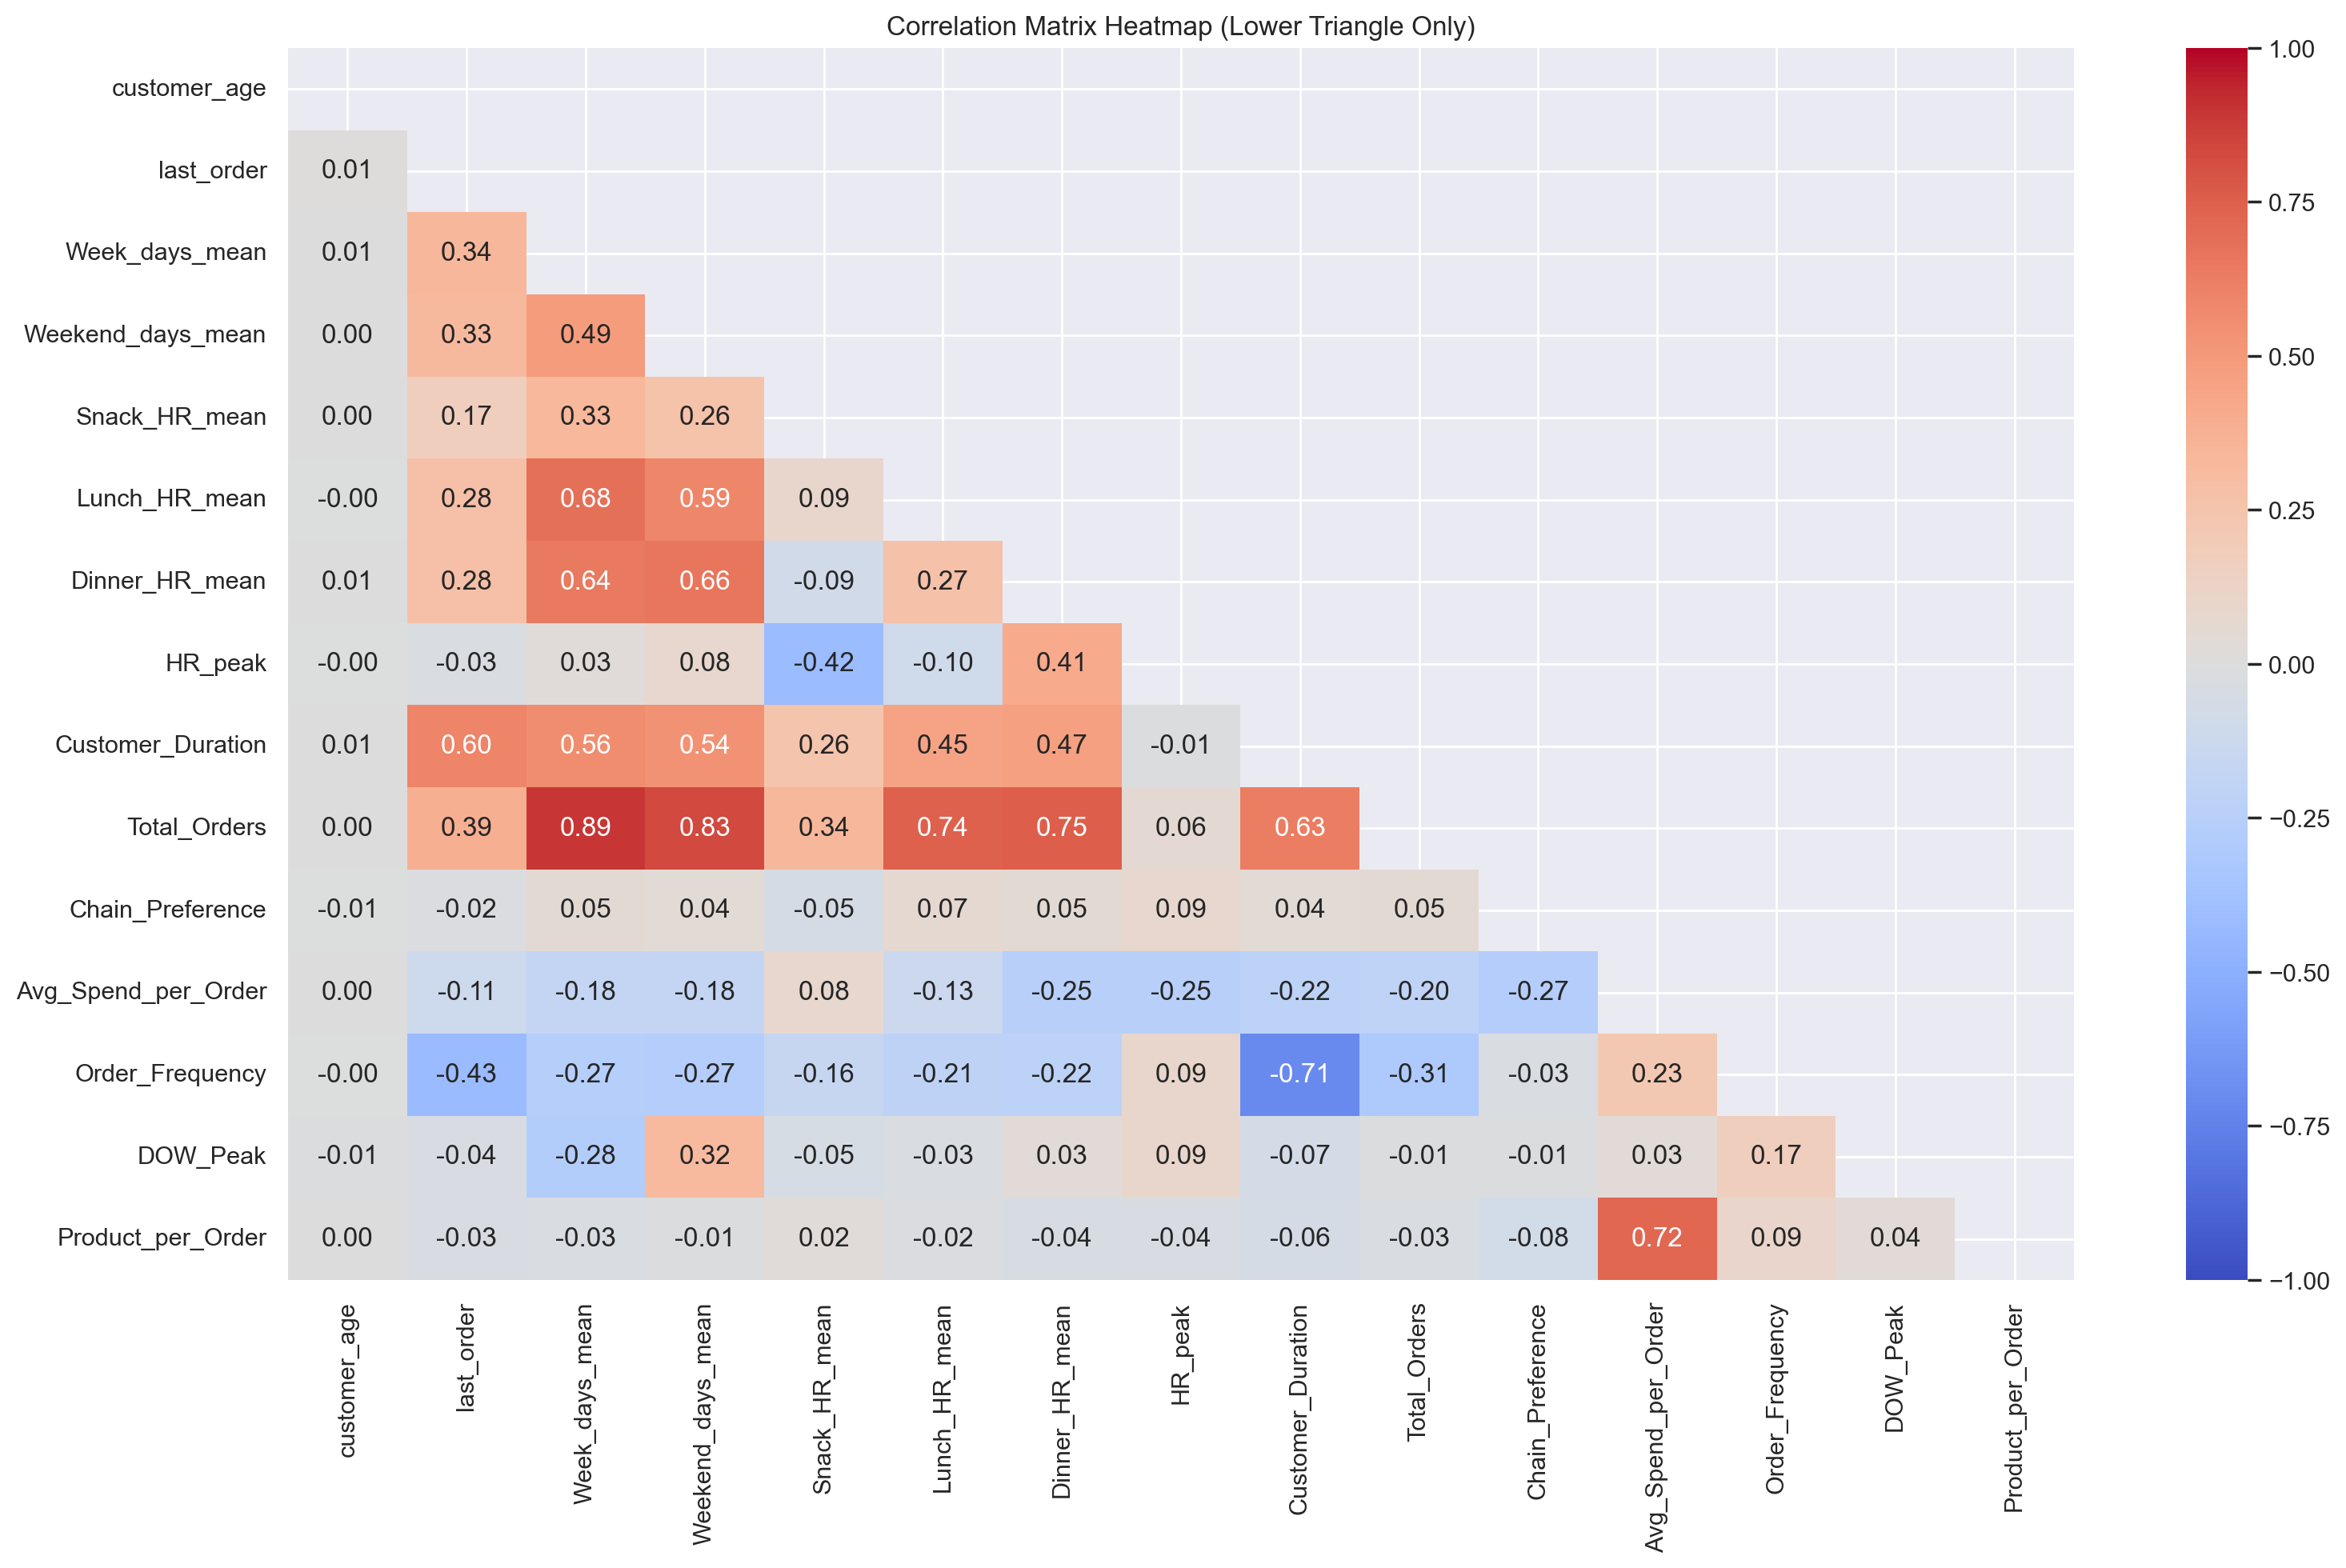

In [66]:
# Assuming numeric_features and cuisine_columns are defined
non_cui_num_features = [e for e in numeric_features if e not in cuisine_columns]
correlation_matrix = df[non_cui_num_features].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(18, 10))  # Set the figure size
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap (Lower Triangle Only)")
plt.show()

## 4.5. Dimensionality Reduction (PCA)

PCA
> (Han, 2023)
> Data Mining concepts and techniques (4th ed.)
> 
> 
> The basic procedure is as follows:
> 
> 1. The input data are normalized, so that each attribute falls within the same range. This step helps ensure that attributes with large domains will not dominate attributes with smaller domains.
> 2. PCA computes k orthonormal vectors that provide a basis for the normalized input data. These are unit vectors that are perpendicular with each other. These vectors are referred to as the principal components. The input data are a linear combination of the principal components.
> 3. The principal components are sorted in order of decreasing “significance” or strength. The principal components essentially serve as a new set of axes for the data, providing important information about variance. That is, the sorted axes are such that the first axis shows the most variance among the data, the second axis shows the next highest variance, and so on. For example, Fig. 2.17 shows the first two principal components, $Y_1$ and $Y_2$, for the given set of data originally mapped to the axes $X_1$ and $X_2$. This information helps identify groups or patterns within the data.
> 4. Because the components are sorted in descending order of “significance,” the data size can be reduced by eliminating the weaker components, that is, those with low variance. Using the strongest principal components, it should be possible to reconstruct a good approximation of the original data.
>  
> Han, J., Pei, J., & Tong, H. (2023). Data, measurements, and data preprocessing. In Elsevier eBooks (pp. 23–84). https://doi.org/10.1016/b978-0-12-811760-6.00012-6

In [67]:
df_pca = df.copy()

Before PCA we need to scale the data:

In [68]:
# Initialize the StandardScaler
ss_scaler = StandardScaler()

# Apply StandardScaler to the metric features
scaled_features = ss_scaler.fit_transform(df_pca[numeric_features])

# Replace the original columns with scaled values
df_pca[numeric_features] = scaled_features

print(f"NaN Count: {df_pca.isna().sum().sum()}")
print(f"Infinite Count: {df_pca.isin([np.inf, -np.inf]).sum().sum()}")

df_pca.head()

NaN Count: 0
Infinite Count: 0


customer_region  customer_age  last_order  last_promo  \
customer_id                                                         
1b8f824d5e             2360     -1.446986   -2.731169    DELIVERY   
5d272b9dcb             8670     -1.605708   -2.731169    DISCOUNT   
f6d1b2ba63             4660      1.727454   -2.731169    DISCOUNT   
180c632ed8             4660     -0.177210   -2.687606    DELIVERY   
4eb37a6705             4660     -1.129542   -2.687606  FULL PRICE   

            payment_method  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                                    
1b8f824d5e            DIGI     -0.456645  -0.465071      -0.291749 -0.144681   
5d272b9dcb            DIGI      0.820482  -0.151469      -0.291749 -0.144681   
f6d1b2ba63            CASH      0.459858  -0.465071      -0.291749 -0.144681   
180c632ed8            DIGI     -0.456645   0.207283      -0.291749 -0.144681   
4eb37a6705            DIGI      0.994817   1.540703      -0.291749 -0.144681   

             CUI_Chicken Dishes  ...  Lunch_HR_mean  Dinner_HR_mean   HR_peak  \
customer_id                      ...                                            
1b8f824d5e            -0.242273  ...      -0.665797        0.042748  1.208156   
5d272b9dcb            -0.242273  ...       0.204223       -0.695361 -0.286086   
f6d1b2ba63            -0.242273  ...       0.204223       -0.695361 -0.472866   
180c632ed8            -0.242273  ...      -0.230787       -0.326306 -0.099305   
4eb37a6705            -0.242273  ...       0.204223       -0.695361 -0.659646   

             Customer_Duration  Total_Orders  Chain_Preference  \
customer_id                                                      
1b8f824d5e           -1.169091     -0.507104         -0.332317   
5d272b9dcb           -1.169091     -0.507104          0.959062   
f6d1b2ba63           -1.169091     -0.507104          0.959062   
180c632ed8           -1.134782     -0.507104         -0.332317   
4eb37a6705           -1.134782     -0.507104         -1.623697   

             Avg_Spend_per_Order  Order_Frequency  DOW_Peak  Product_per_Order  
customer_id                                                                     
1b8f824d5e              0.540066         1.560249 -1.320239           2.920203  
5d272b9dcb             -0.080420         1.560249 -1.320239          -0.714576  
f6d1b2ba63             -0.722722         1.560249 -1.320239          -0.714576  
180c632ed8              0.712031         0.756958 -0.825866           0.497017  
4eb37a6705              2.244317         0.756958 -0.825866           2.920203  

[5 rows x 33 columns]

Running PCA:

In [69]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_pca[numeric_features])
pca_feat

array([[-2.18912350e+00, -4.40068317e-01,  3.28429987e+00, ...,
        -7.77695482e-01,  4.62899493e-13,  4.34546730e-13],
       [-2.21805814e+00, -5.38273707e-01, -2.44979261e-01, ...,
        -4.71667167e-02,  3.22011964e-13,  4.26935219e-13],
       [-2.22508349e+00, -8.66347637e-01, -5.51022892e-01, ...,
        -3.21419412e-01,  4.03012438e-13,  4.23125725e-13],
       ...,
       [-1.72611979e+00,  3.05842358e-01,  2.84440978e+00, ...,
         1.47300863e-01, -3.72707596e-13, -7.57775604e-13],
       [-1.69109851e+00,  3.52358596e-01,  3.48527063e+00, ...,
        -4.05097398e-01, -2.11780114e-13, -5.35018735e-13],
       [-1.92634115e+00, -1.63268382e-01, -1.22905151e+00, ...,
        -7.14588312e-01,  3.17413035e-13, -4.04827690e-13]])

Selecting the Principal Components we should retain:

In [70]:
# Get PCA output as table

# Get the eigenvalues (explained variance)
explained_variance = pca.explained_variance_

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# get the cumulative explained variance ratio 
# Hint: use np.cumsum()
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Combine into a dataframe
pca_results = pd.DataFrame(
    {
        "Eigenvalue": explained_variance,
        "Difference": np.insert(np.diff(explained_variance), 0, 0),
        "Proportion": explained_variance_ratio,
        "Cumulative": cumulative_explained_variance_ratio
    },
        index=range(1, pca.n_components_ + 1)
)

pca_results.head()

Eigenvalue  Difference  Proportion  Cumulative
1    5.587319    0.000000    0.186238    0.186238
2    2.773511   -2.813808    0.092447    0.278685
3    1.899774   -0.873737    0.063324    0.342009
4    1.511628   -0.388146    0.050386    0.392395
5    1.275106   -0.236522    0.042502    0.434897

Plot the results:

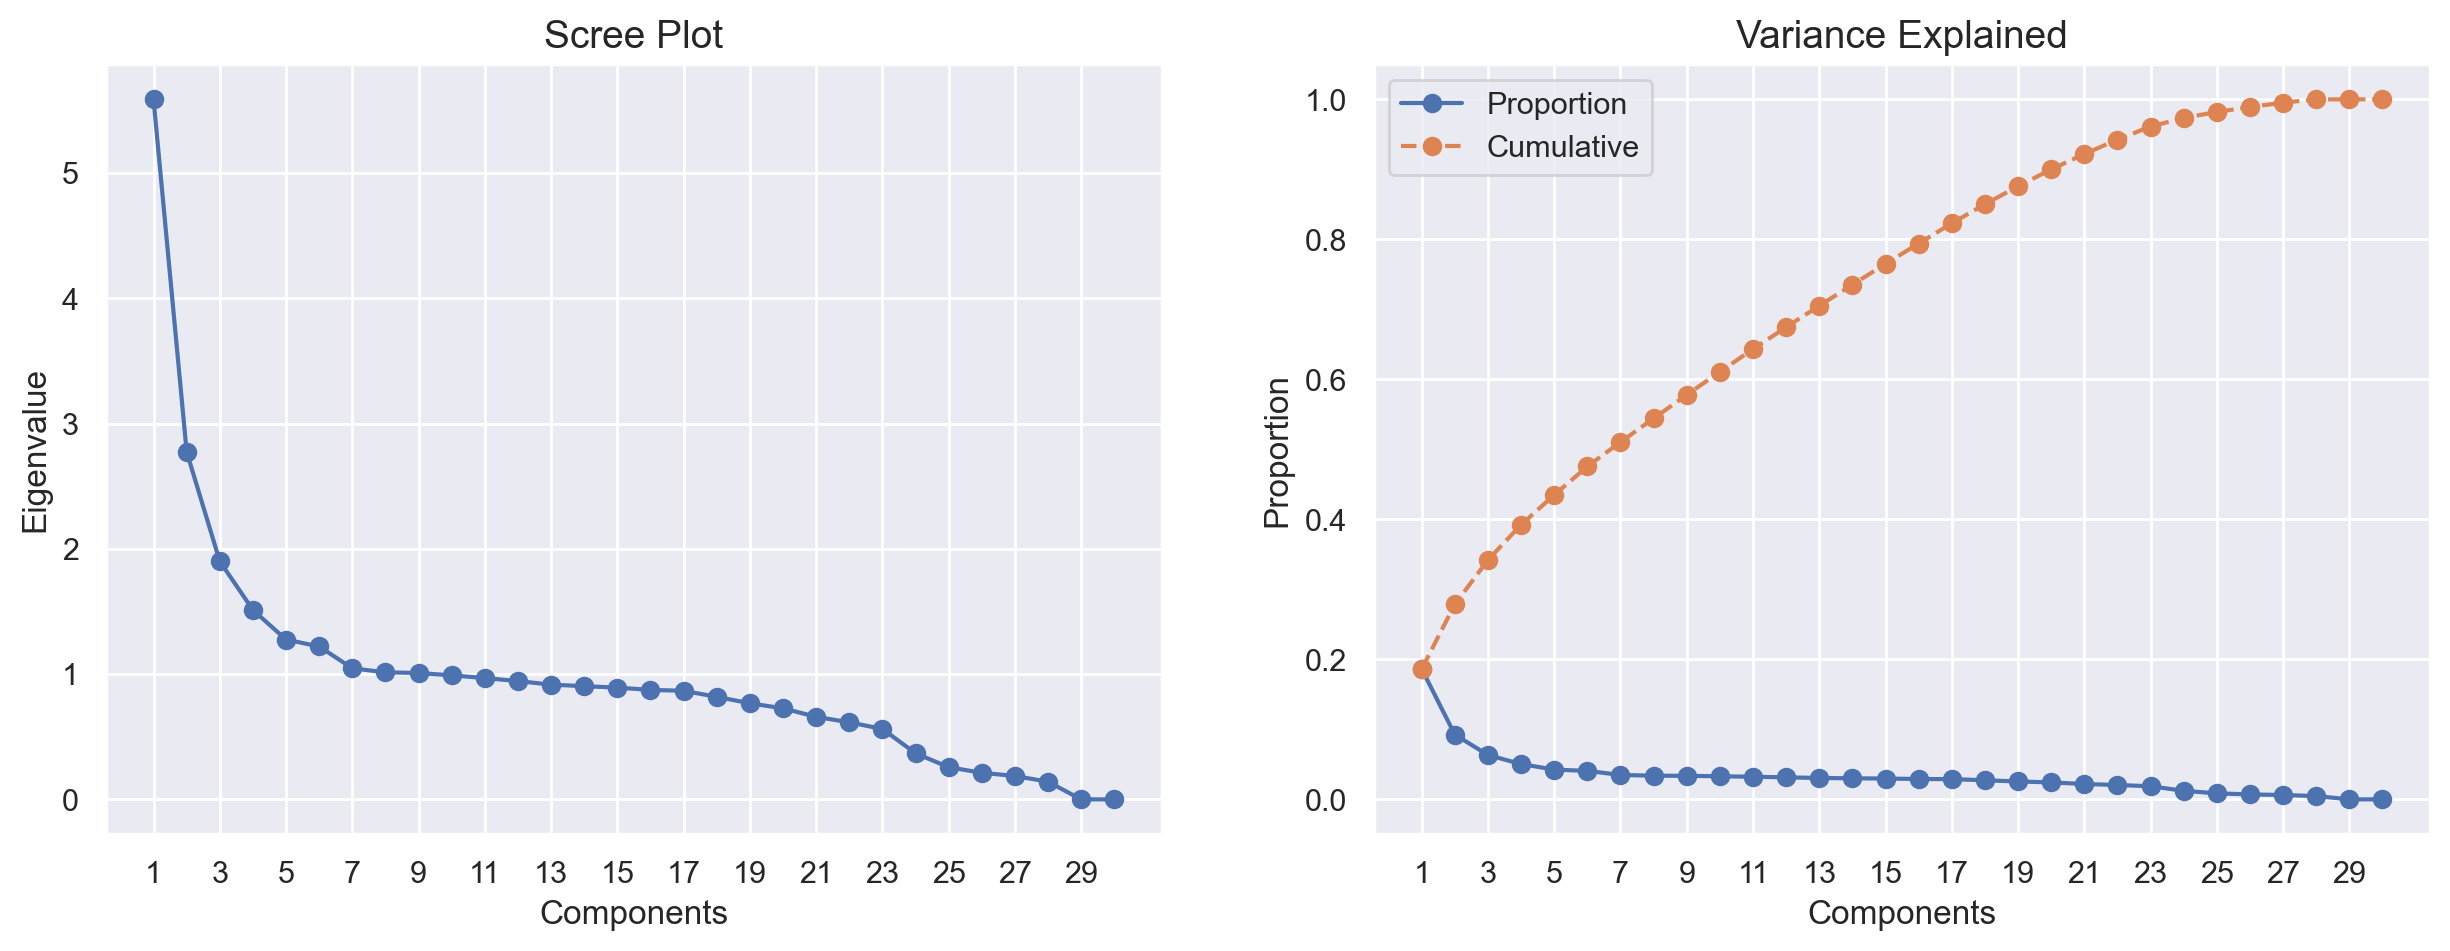

In [71]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots

ax1.plot(explained_variance, # PLOT THE EIGENVALUES (EXPLAINED VARIANCE)
         marker=".", markersize=12)

ax2.plot(explained_variance_ratio,  # PLOT THE EXPLAINED VARIANCE RATIO
         marker=".", markersize=12, label="Proportion")

ax2.plot(cumulative_explained_variance_ratio,  # PLOT THE CUMULATIVE EXPLAINED VARIANCE RATIO
         marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [72]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=4)
pca_feat = pca.fit_transform(df_pca[numeric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]

# remember index=df_pca.index
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  
pca_df.head()

PC0       PC1       PC2       PC3
customer_id                                        
1b8f824d5e  -2.189123 -0.440068  3.284300  0.557920
5d272b9dcb  -2.218058 -0.538274 -0.244979  1.238491
f6d1b2ba63  -2.225083 -0.866348 -0.551023  1.271815
180c632ed8  -2.088485 -0.039983  1.356299  0.332664
4eb37a6705  -2.240910  2.663019  2.643869  0.343740

In [73]:
# Reassigning df to contain pca variables
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

customer_region  customer_age  last_order  last_promo  \
customer_id                                                         
1b8f824d5e             2360     -1.446986   -2.731169    DELIVERY   
5d272b9dcb             8670     -1.605708   -2.731169    DISCOUNT   
f6d1b2ba63             4660      1.727454   -2.731169    DISCOUNT   
180c632ed8             4660     -0.177210   -2.687606    DELIVERY   
4eb37a6705             4660     -1.129542   -2.687606  FULL PRICE   

            payment_method  CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                                    
1b8f824d5e            DIGI     -0.456645  -0.465071      -0.291749 -0.144681   
5d272b9dcb            DIGI      0.820482  -0.151469      -0.291749 -0.144681   
f6d1b2ba63            CASH      0.459858  -0.465071      -0.291749 -0.144681   
180c632ed8            DIGI     -0.456645   0.207283      -0.291749 -0.144681   
4eb37a6705            DIGI      0.994817   1.540703      -0.291749 -0.144681   

             CUI_Chicken Dishes  ...  Total_Orders  Chain_Preference  \
customer_id                      ...                                   
1b8f824d5e            -0.242273  ...     -0.507104         -0.332317   
5d272b9dcb            -0.242273  ...     -0.507104          0.959062   
f6d1b2ba63            -0.242273  ...     -0.507104          0.959062   
180c632ed8            -0.242273  ...     -0.507104         -0.332317   
4eb37a6705            -0.242273  ...     -0.507104         -1.623697   

             Avg_Spend_per_Order  Order_Frequency  DOW_Peak  \
customer_id                                                   
1b8f824d5e              0.540066         1.560249 -1.320239   
5d272b9dcb             -0.080420         1.560249 -1.320239   
f6d1b2ba63             -0.722722         1.560249 -1.320239   
180c632ed8              0.712031         0.756958 -0.825866   
4eb37a6705              2.244317         0.756958 -0.825866   

             Product_per_Order       PC0       PC1       PC2       PC3  
customer_id                                                             
1b8f824d5e            2.920203 -2.189123 -0.440068  3.284300  0.557920  
5d272b9dcb           -0.714576 -2.218058 -0.538274 -0.244979  1.238491  
f6d1b2ba63           -0.714576 -2.225083 -0.866348 -0.551023  1.271815  
180c632ed8            0.497017 -2.088485 -0.039983  1.356299  0.332664  
4eb37a6705            2.920203 -2.240910  2.663019  2.643869  0.343740  

[5 rows x 37 columns]

Interpreting the PC's:

In [74]:
loadings = df_pca[numeric_features + pca_feat_names].corr().loc[numeric_features, pca_feat_names] 

In [75]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: #ffbdbd'
    elif val > 0.45:
        color = 'background-color: #b3ffcc'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings.style.applymap(_color_red_or_green)

**Remarks:**
After closely analysing the PCA results, we decided not to include them in our final dataset, since the interpretability would be very troublesome and we'd be losing too much important information.

## 4.6. Creating Perspectives

### 4.6.1. Clustering Perspectives

Creating the Dataframe for each perspective: <br> <br>
**1. Behavior Preferences**

In [76]:
# df_BEHAV = df_ECO + df_CUI
df_CUI = df[cuisine_columns]
df_ECO = df[['Order_Frequency', 'Avg_Spend_per_Order', 'Product_per_Order', 'Total_Orders','Customer_Duration']]

# Define Asian-related cuisines
asian_cuisines = ['CUI_Asian', 'CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_Thai']

# Group Asian-related cuisines into `CUI_Asian`
df_CUI['CUI_Asian'] = df_CUI[asian_cuisines].sum(axis=1)

# Define columns to retain and consolidate the rest into `CUI_OTHER`
retain_columns = ['CUI_American', 'CUI_Italian', 'CUI_Asian']
other_columns = [col for col in df_CUI.columns if col not in retain_columns + asian_cuisines]

# Group the rest into `CUI_OTHER`
df_CUI['CUI_OTHER'] = df_CUI[other_columns].sum(axis=1)

# Keep only the desired columns
df_CUI = df_CUI[retain_columns + ['CUI_OTHER']]

# Add Chain_preference
df_CUI = pd.concat([df_CUI, df['Chain_Preference']], axis = 1)

# Concatenate df_ECO and df_CUI
df_BEHAV = pd.concat([df_CUI, df_ECO], axis=1)
df_BEHAV.head(10)


CUI_American  CUI_Italian  CUI_Asian  CUI_OTHER  \
customer_id                                                    
1b8f824d5e           0.00          0.0      28.88       0.00   
5d272b9dcb          12.82          0.0       6.39       0.00   
f6d1b2ba63           9.20          0.0       0.00       0.00   
180c632ed8           0.00          0.0      31.56       0.00   
4eb37a6705          14.57          0.0      40.87       0.00   
6aef2b6726           0.00          0.0      24.92       0.00   
8475ee66ef           5.88          0.0       0.00       1.53   
f2f53bcc67          11.71          0.0       0.00      24.40   
5b650c89cc           2.75          0.0       0.00      11.69   
84775a7237           0.00          0.0      32.48       0.00   

             Chain_Preference  Order_Frequency  Avg_Spend_per_Order  \
customer_id                                                           
1b8f824d5e           0.500000         1.000000            14.440000   
5d272b9dcb           1.000000         1.000000             9.605000   
f6d1b2ba63           1.000000         1.000000             4.600000   
180c632ed8           0.500000         0.666667            15.780000   
4eb37a6705           0.000000         0.666667            27.720000   
6aef2b6726           0.000000         0.666667            12.460000   
8475ee66ef           1.000000         0.666667             3.705000   
f2f53bcc67           1.000000         0.666667            18.055000   
5b650c89cc           0.666667         0.750000             4.813333   
84775a7237           0.000000         0.500000            16.240000   

             Product_per_Order  Total_Orders  Customer_Duration  
customer_id                                                      
1b8f824d5e            2.500000             2                1.0  
5d272b9dcb            1.000000             2                1.0  
f6d1b2ba63            1.000000             2                1.0  
180c632ed8            1.500000             2                2.0  
4eb37a6705            2.500000             2                2.0  
6aef2b6726            1.000000             2                2.0  
8475ee66ef            1.000000             2                2.0  
f2f53bcc67            1.500000             2                2.0  
5b650c89cc            1.333333             3                3.0  
84775a7237            1.500000             2                3.0

In [77]:
df_BEHAV.columns

Index(['CUI_American', 'CUI_Italian', 'CUI_Asian', 'CUI_OTHER',
       'Chain_Preference', 'Order_Frequency', 'Avg_Spend_per_Order',
       'Product_per_Order', 'Total_Orders', 'Customer_Duration'],
      dtype='object')

**2. Demographic Preferences**

In [78]:
df_DEMO = df[['Week_days_mean','Weekend_days_mean', 'HR_peak', 'DOW_Peak', 'customer_age']]
# 'customer_region' was taken out, since it's categorical. But we intend to study it from this perspective later on

df_DEMO.head(10)

Week_days_mean  Weekend_days_mean  HR_peak  DOW_Peak  \
customer_id                                                         
1b8f824d5e             0.25           0.333333       18         0   
5d272b9dcb             0.25           0.333333       10         0   
f6d1b2ba63             0.25           0.333333        9         0   
180c632ed8             0.25           0.333333       11         1   
4eb37a6705             0.25           0.333333        8         1   
6aef2b6726             0.25           0.333333        1         1   
8475ee66ef             0.25           0.333333       11         1   
f2f53bcc67             0.25           0.333333        6         1   
5b650c89cc             0.25           0.666667       17         6   
84775a7237             0.25           0.333333        3         2   

             customer_age  
customer_id                
1b8f824d5e           18.0  
5d272b9dcb           17.0  
f6d1b2ba63           38.0  
180c632ed8           26.0  
4eb37a6705           20.0  
6aef2b6726           40.0  
8475ee66ef           24.0  
f2f53bcc67           27.0  
5b650c89cc           20.0  
84775a7237           20.0

In [79]:
df_DEMO.columns

Index(['Week_days_mean', 'Weekend_days_mean', 'HR_peak', 'DOW_Peak',
       'customer_age'],
      dtype='object')

### 4.6.2. RFM Perspective

In [80]:
df_RFM = df[["last_order", "Total_Orders"]]
df_RFM.rename(columns= {
    "last_order": "Recency",
    "Total_Orders": "Frequency"
}, inplace=True)
df_RFM["Monetary"] = df[cuisine_columns].sum(axis=1)

df_RFM.head()

Recency  Frequency  Monetary
customer_id                              
1b8f824d5e         1          2     28.88
5d272b9dcb         1          2     19.21
f6d1b2ba63         1          2      9.20
180c632ed8         2          2     31.56
4eb37a6705         2          2     55.44

In [81]:
df_RFM.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

##  4.7. Data Normalization <a class="anchor" id="4.4"></a>

Comparing MinMax scaler to the Normalization scaler: <br> <br>
To nomalize: <br>
1 - df_BEHAV <br>
2 - df_DEMO <br>

#### 1.1 - df_BEHAV_minmax

In [82]:
df_BEHAV_minmax = df_BEHAV.copy()

In [83]:
# Initialize MinMaxScaler
mm_scaler = MinMaxScaler()

# Apply MinMaxScaler and create a new DataFrame with scaled values
mm_scaled_feat = mm_scaler.fit_transform(df_BEHAV_minmax)

# Replace the original columns with scaled values
df_BEHAV_minmax = pd.DataFrame(mm_scaled_feat, columns=df_BEHAV_minmax.columns, index=df_BEHAV.index)

# Display the updated DataFrame
df_BEHAV_minmax.head()

CUI_American  CUI_Italian  CUI_Asian  CUI_OTHER  \
customer_id                                                    
1b8f824d5e       0.000000          0.0   0.084343        0.0   
5d272b9dcb       0.135332          0.0   0.018662        0.0   
f6d1b2ba63       0.097118          0.0   0.000000        0.0   
180c632ed8       0.000000          0.0   0.092170        0.0   
4eb37a6705       0.153806          0.0   0.119360        0.0   

             Chain_Preference  Order_Frequency  Avg_Spend_per_Order  \
customer_id                                                           
1b8f824d5e                0.5         0.245810             0.135354   
5d272b9dcb                1.0         0.245810             0.088841   
f6d1b2ba63                1.0         0.245810             0.040693   
180c632ed8                0.5         0.162011             0.148244   
4eb37a6705                0.0         0.162011             0.263107   

             Product_per_Order  Total_Orders  Customer_Duration  
customer_id                                                      
1b8f824d5e                 0.3      0.018519           0.011111  
5d272b9dcb                 0.0      0.018519           0.011111  
f6d1b2ba63                 0.0      0.018519           0.011111  
180c632ed8                 0.1      0.018519           0.022222  
4eb37a6705                 0.3      0.018519           0.022222

#### 1.2 - df_BEHAV_standard

In [84]:
df_BEHAV_standard = df_BEHAV.copy()

In [85]:
# Initialize the StandardScaler
ss_scaler = StandardScaler()

# Apply StandardScaler to the metric features
scaled_features = ss_scaler.fit_transform(df_BEHAV_standard)

# Replace the original columns with scaled values
df_BEHAV_standard = pd.DataFrame(scaled_features, columns=df_BEHAV_standard.columns, index=df_BEHAV.index)

# Display the updated DataFrame
df_BEHAV_standard.head()

CUI_American  CUI_Italian  CUI_Asian  CUI_OTHER  \
customer_id                                                    
1b8f824d5e      -0.456645     -0.31183   0.504971  -0.600861   
5d272b9dcb       0.820482     -0.31183  -0.415749  -0.600861   
f6d1b2ba63       0.459858     -0.31183  -0.677350  -0.600861   
180c632ed8      -0.456645     -0.31183   0.614688  -0.600861   
4eb37a6705       0.994817     -0.31183   0.995830  -0.600861   

             Chain_Preference  Order_Frequency  Avg_Spend_per_Order  \
customer_id                                                           
1b8f824d5e          -0.332317         1.560249             0.540066   
5d272b9dcb           0.959062         1.560249            -0.080420   
f6d1b2ba63           0.959062         1.560249            -0.722722   
180c632ed8          -0.332317         0.756958             0.712031   
4eb37a6705          -1.623697         0.756958             2.244317   

             Product_per_Order  Total_Orders  Customer_Duration  
customer_id                                                      
1b8f824d5e            2.920203     -0.507104          -1.169091  
5d272b9dcb           -0.714576     -0.507104          -1.169091  
f6d1b2ba63           -0.714576     -0.507104          -1.169091  
180c632ed8            0.497017     -0.507104          -1.134782  
4eb37a6705            2.920203     -0.507104          -1.134782

#### 2.1 - df_DEMO_minmax

In [86]:
df_DEMO_minmax = df_DEMO.copy()

In [87]:
# Initialize MinMaxScaler
mm_scaler = MinMaxScaler()

# Apply MinMaxScaler and create a new DataFrame with scaled values
mm_scaled_feat = mm_scaler.fit_transform(df_DEMO_minmax)

# Replace the original columns with scaled values
df_DEMO_minmax = pd.DataFrame(mm_scaled_feat, columns=df_DEMO_minmax.columns, index=df_DEMO.index)

# Display the updated DataFrame
df_DEMO_minmax.head()

Week_days_mean  Weekend_days_mean   HR_peak  DOW_Peak  \
customer_id                                                          
1b8f824d5e         0.028571           0.034483  0.782609  0.000000   
5d272b9dcb         0.028571           0.034483  0.434783  0.000000   
f6d1b2ba63         0.028571           0.034483  0.391304  0.000000   
180c632ed8         0.028571           0.034483  0.478261  0.166667   
4eb37a6705         0.028571           0.034483  0.347826  0.166667   

             customer_age  
customer_id                
1b8f824d5e       0.085714  
5d272b9dcb       0.057143  
f6d1b2ba63       0.657143  
180c632ed8       0.314286  
4eb37a6705       0.142857

#### 2.2 - df_DEMO_standard

In [88]:
df_DEMO_standard = df_DEMO.copy()

In [89]:
# Initialize the StandardScaler
ss_scaler = StandardScaler()

# Apply StandardScaler to the metric features
scaled_features = ss_scaler.fit_transform(df_DEMO_standard)

# Replace the original columns with scaled values
df_DEMO_standard = pd.DataFrame(scaled_features, columns=df_DEMO_standard.columns, index=df_DEMO.index)

# Display the updated DataFrame
df_DEMO_standard.head()

Week_days_mean  Weekend_days_mean   HR_peak  DOW_Peak  \
customer_id                                                          
1b8f824d5e        -0.444861          -0.430645  1.208156 -1.320239   
5d272b9dcb        -0.444861          -0.430645 -0.286086 -1.320239   
f6d1b2ba63        -0.444861          -0.430645 -0.472866 -1.320239   
180c632ed8        -0.444861          -0.430645 -0.099305 -0.825866   
4eb37a6705        -0.444861          -0.430645 -0.659646 -0.825866   

             customer_age  
customer_id                
1b8f824d5e      -1.446986  
5d272b9dcb      -1.605708  
f6d1b2ba63       1.727454  
180c632ed8      -0.177210  
4eb37a6705      -1.129542

### 4.7.1. Comparing the 2 scalers:

##### - Comparing MinMax and Standard Scaler for df_BEHAV:

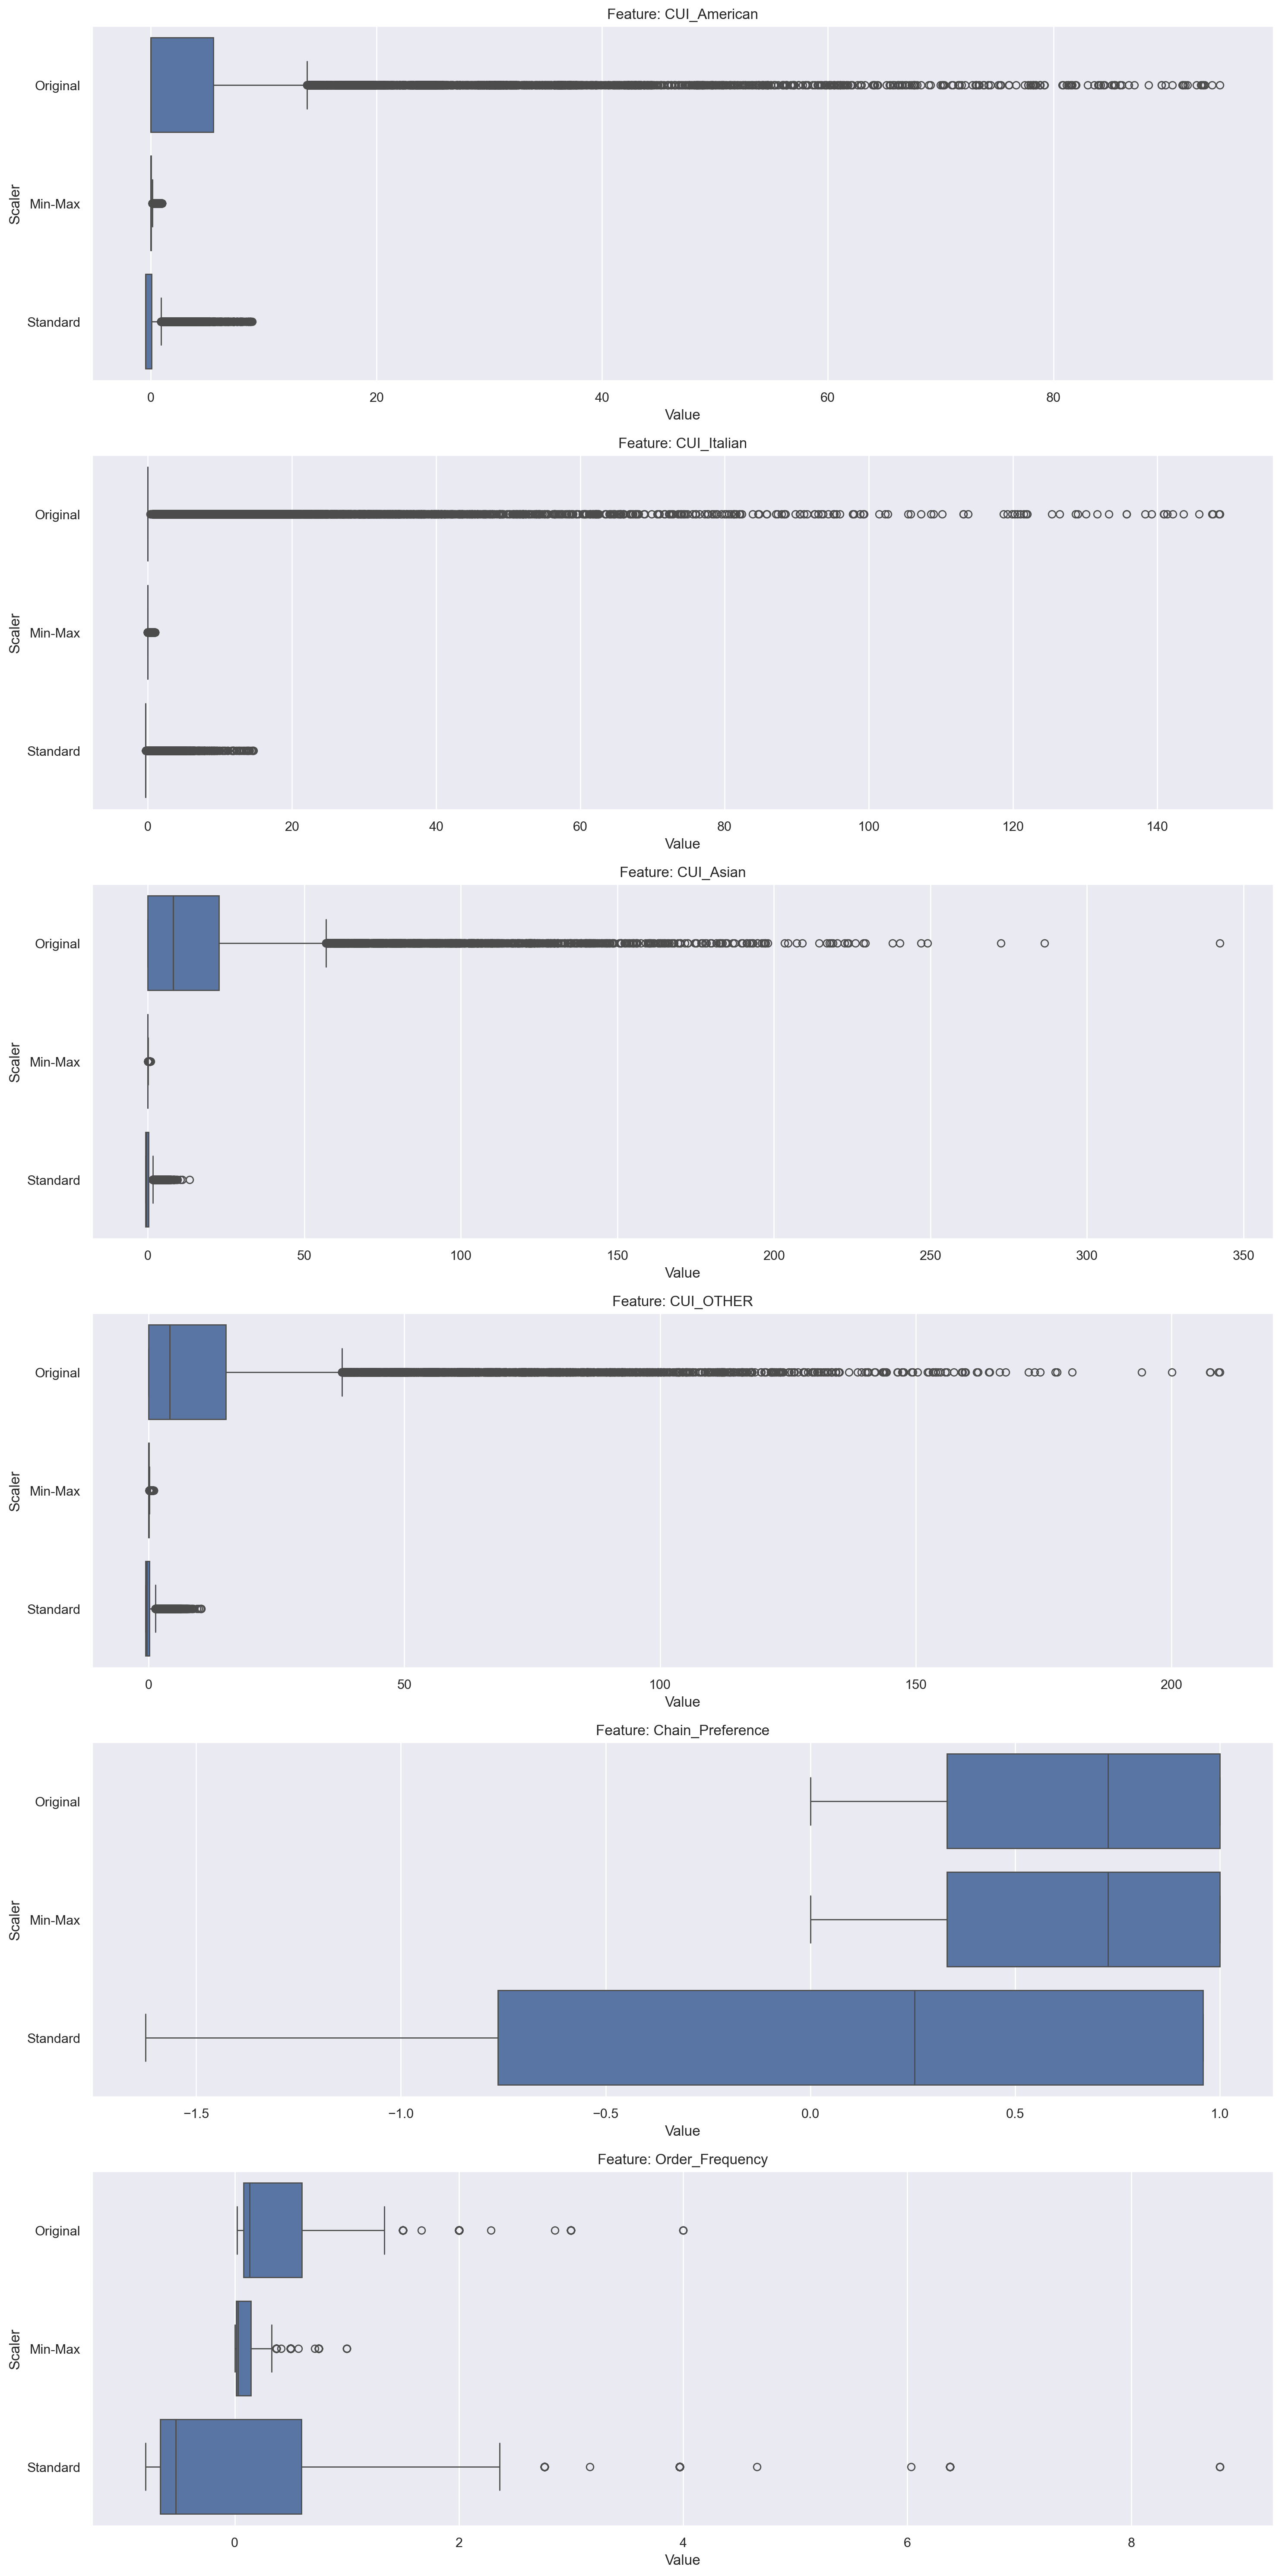

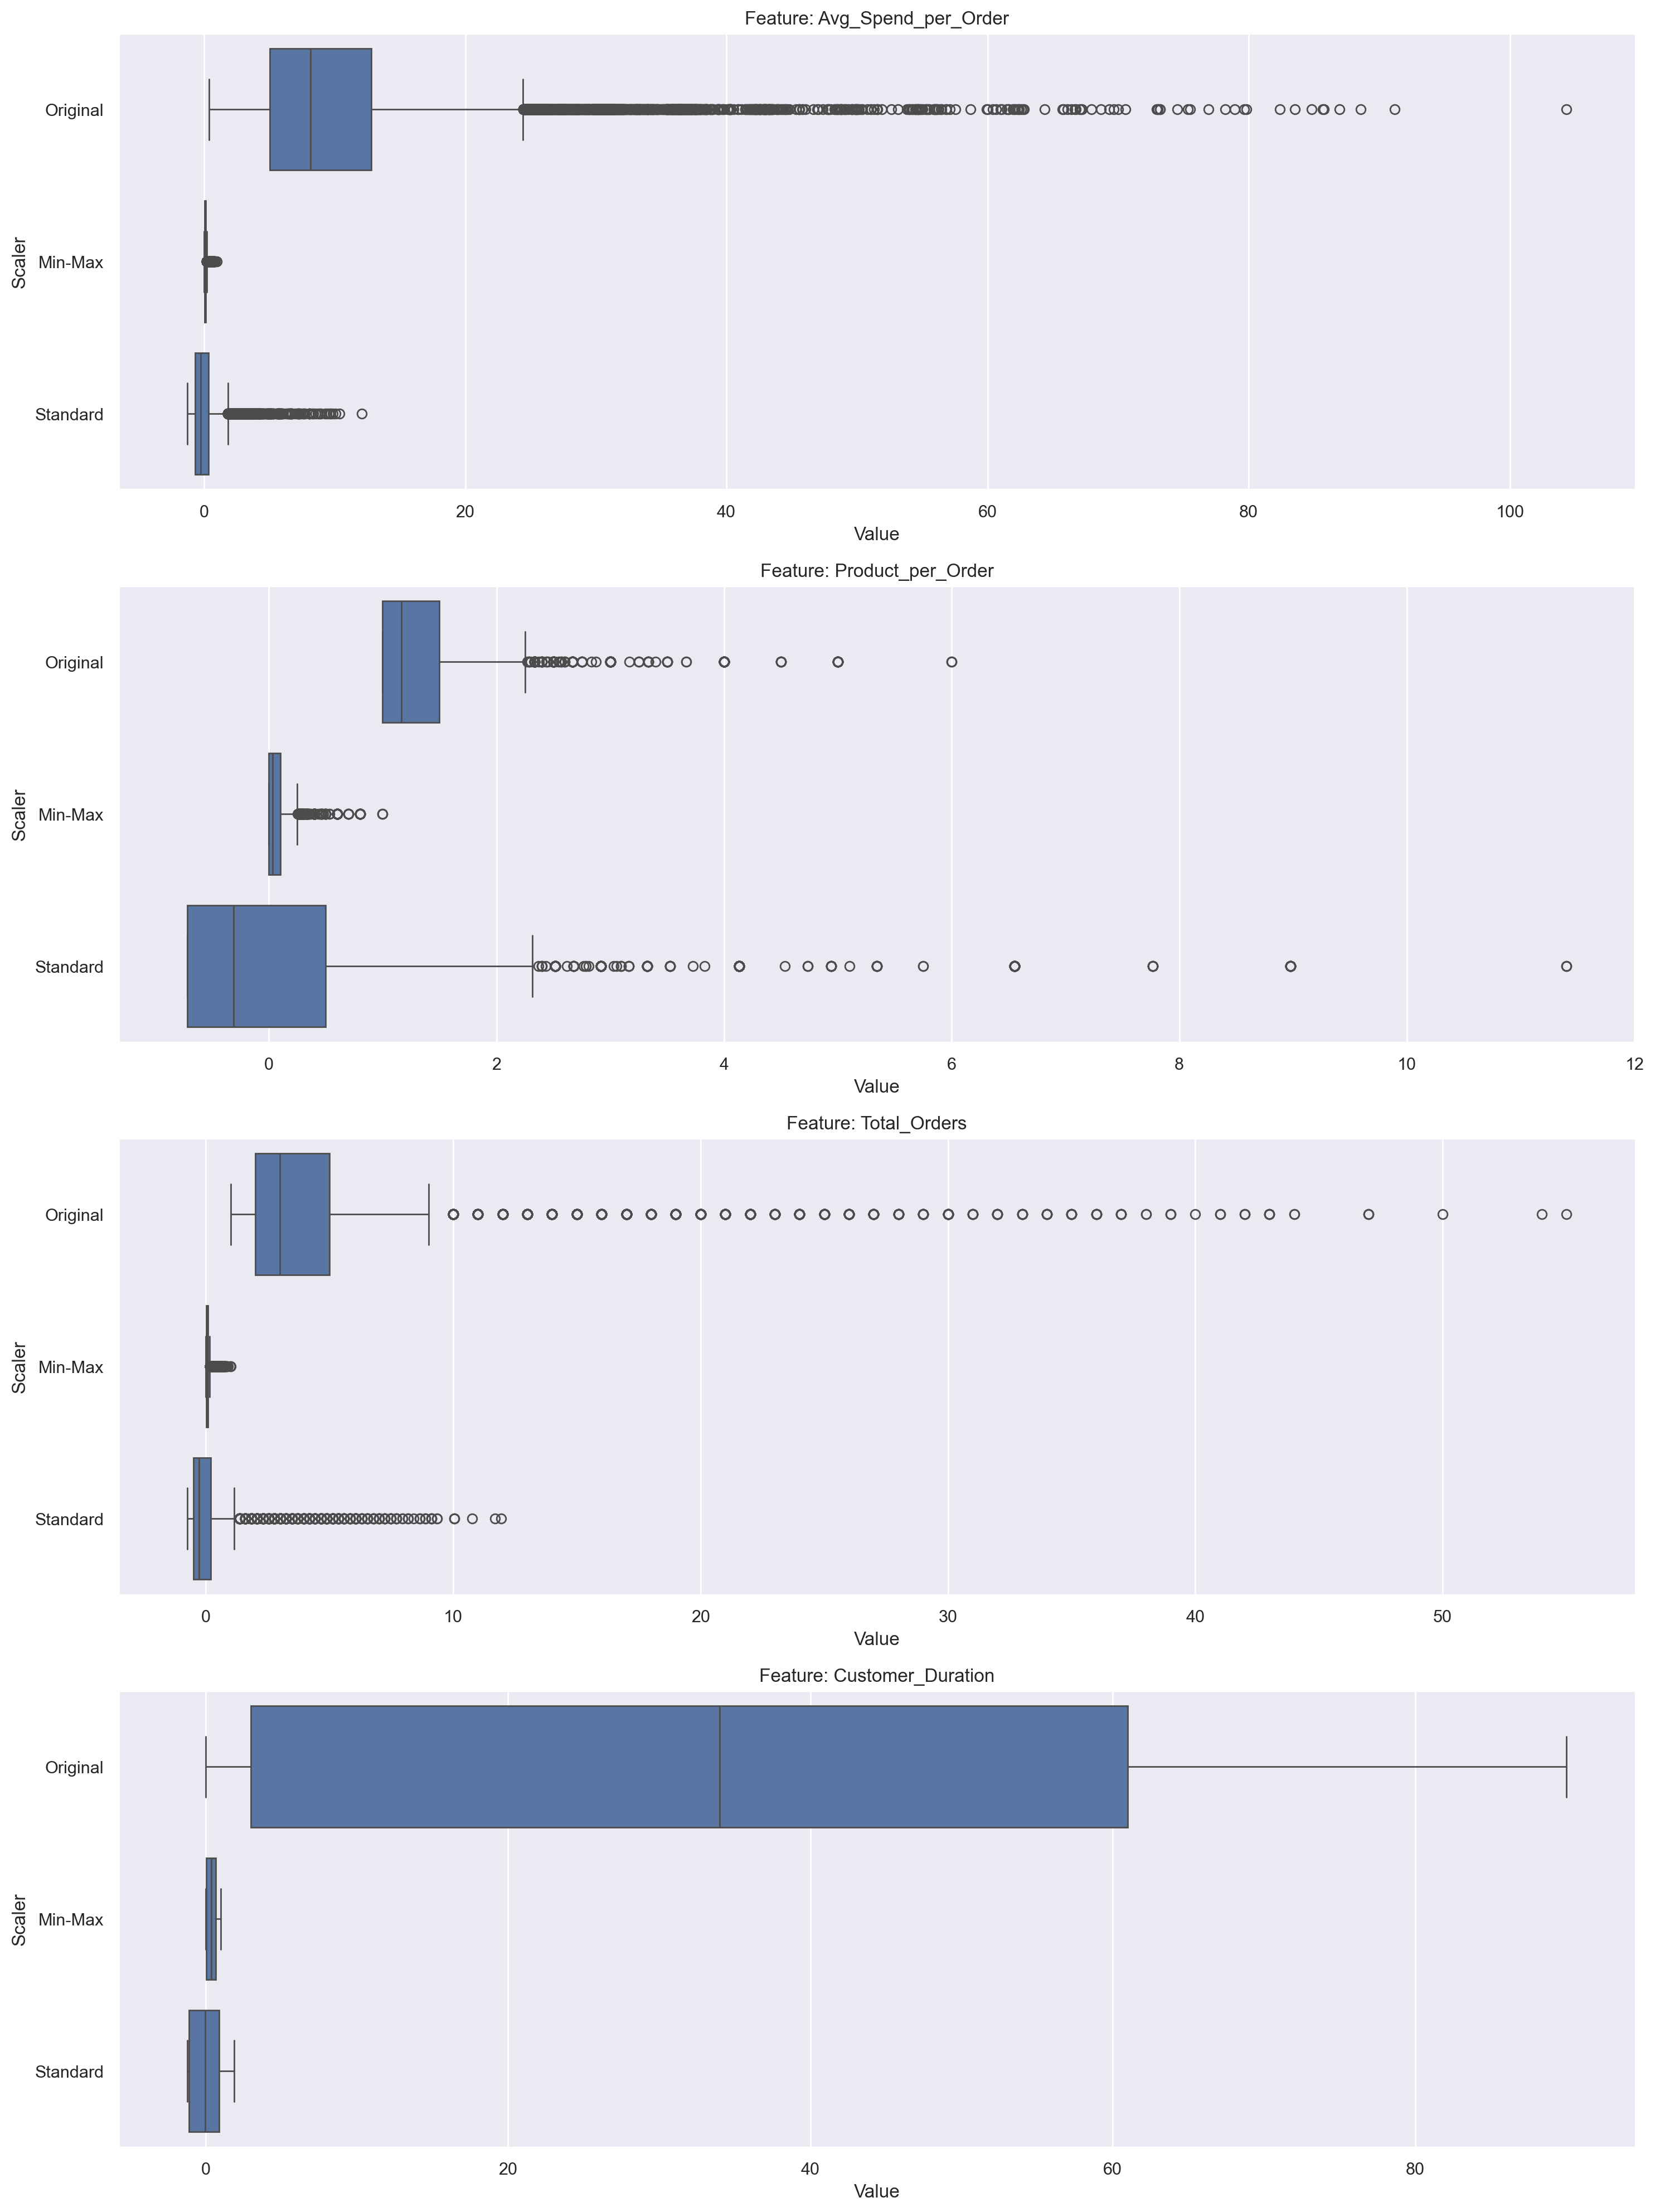

In [90]:
# Prepare an empty DataFrame to combine data for plotting
data_for_plot = pd.DataFrame()

# Loop over each column in the DataFrames
for feature in df_BEHAV.columns:
    # Combine data from all three DataFrames for the current feature
    df_original = df_BEHAV[[feature]].rename(columns={feature: 'Value'}).reset_index(drop=True)
    df_original['Scaler'] = 'Original'
    df_original['Feature'] = feature

    df_minmax = df_BEHAV_minmax[[feature]].rename(columns={feature: 'Value'}).reset_index(drop=True)
    df_minmax['Scaler'] = 'Min-Max'
    df_minmax['Feature'] = feature

    df_standard = df_BEHAV_standard[[feature]].rename(columns={feature: 'Value'}).reset_index(drop=True)
    df_standard['Scaler'] = 'Standard'
    df_standard['Feature'] = feature

    # Concatenate into the plotting DataFrame
    data_for_plot = pd.concat([data_for_plot, df_original, df_minmax, df_standard], ignore_index=True)

# Convert the 'Value' column to numeric (to avoid errors with non-numeric data)
data_for_plot['Value'] = pd.to_numeric(data_for_plot['Value'], errors='coerce')

# Plotting: Create boxplots for each feature
num_features = len(df_BEHAV.columns)
rows_per_figure = 6  # Number of rows (features) to plot per figure

for start_idx in range(0, num_features, rows_per_figure):
    # Define the range of features to plot in this figure
    end_idx = min(start_idx + rows_per_figure, num_features)
    features_to_plot = df_BEHAV.columns[start_idx:end_idx]

    # Filter data for this subset of features
    subset_data = data_for_plot[data_for_plot['Feature'].isin(features_to_plot)]

    # Create the figure
    plt.figure(figsize=(15, 5 * len(features_to_plot)))

    # Loop through each feature and create a subplot
    for idx, feature in enumerate(features_to_plot, 1):
        plt.subplot(len(features_to_plot), 1, idx)
        sns.boxplot(data=subset_data[subset_data['Feature'] == feature], x='Value', y='Scaler', orient='h')
        plt.title(f'Feature: {feature}')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


#### - Comparing MinMax and Standard Scaler for df_DEMO:

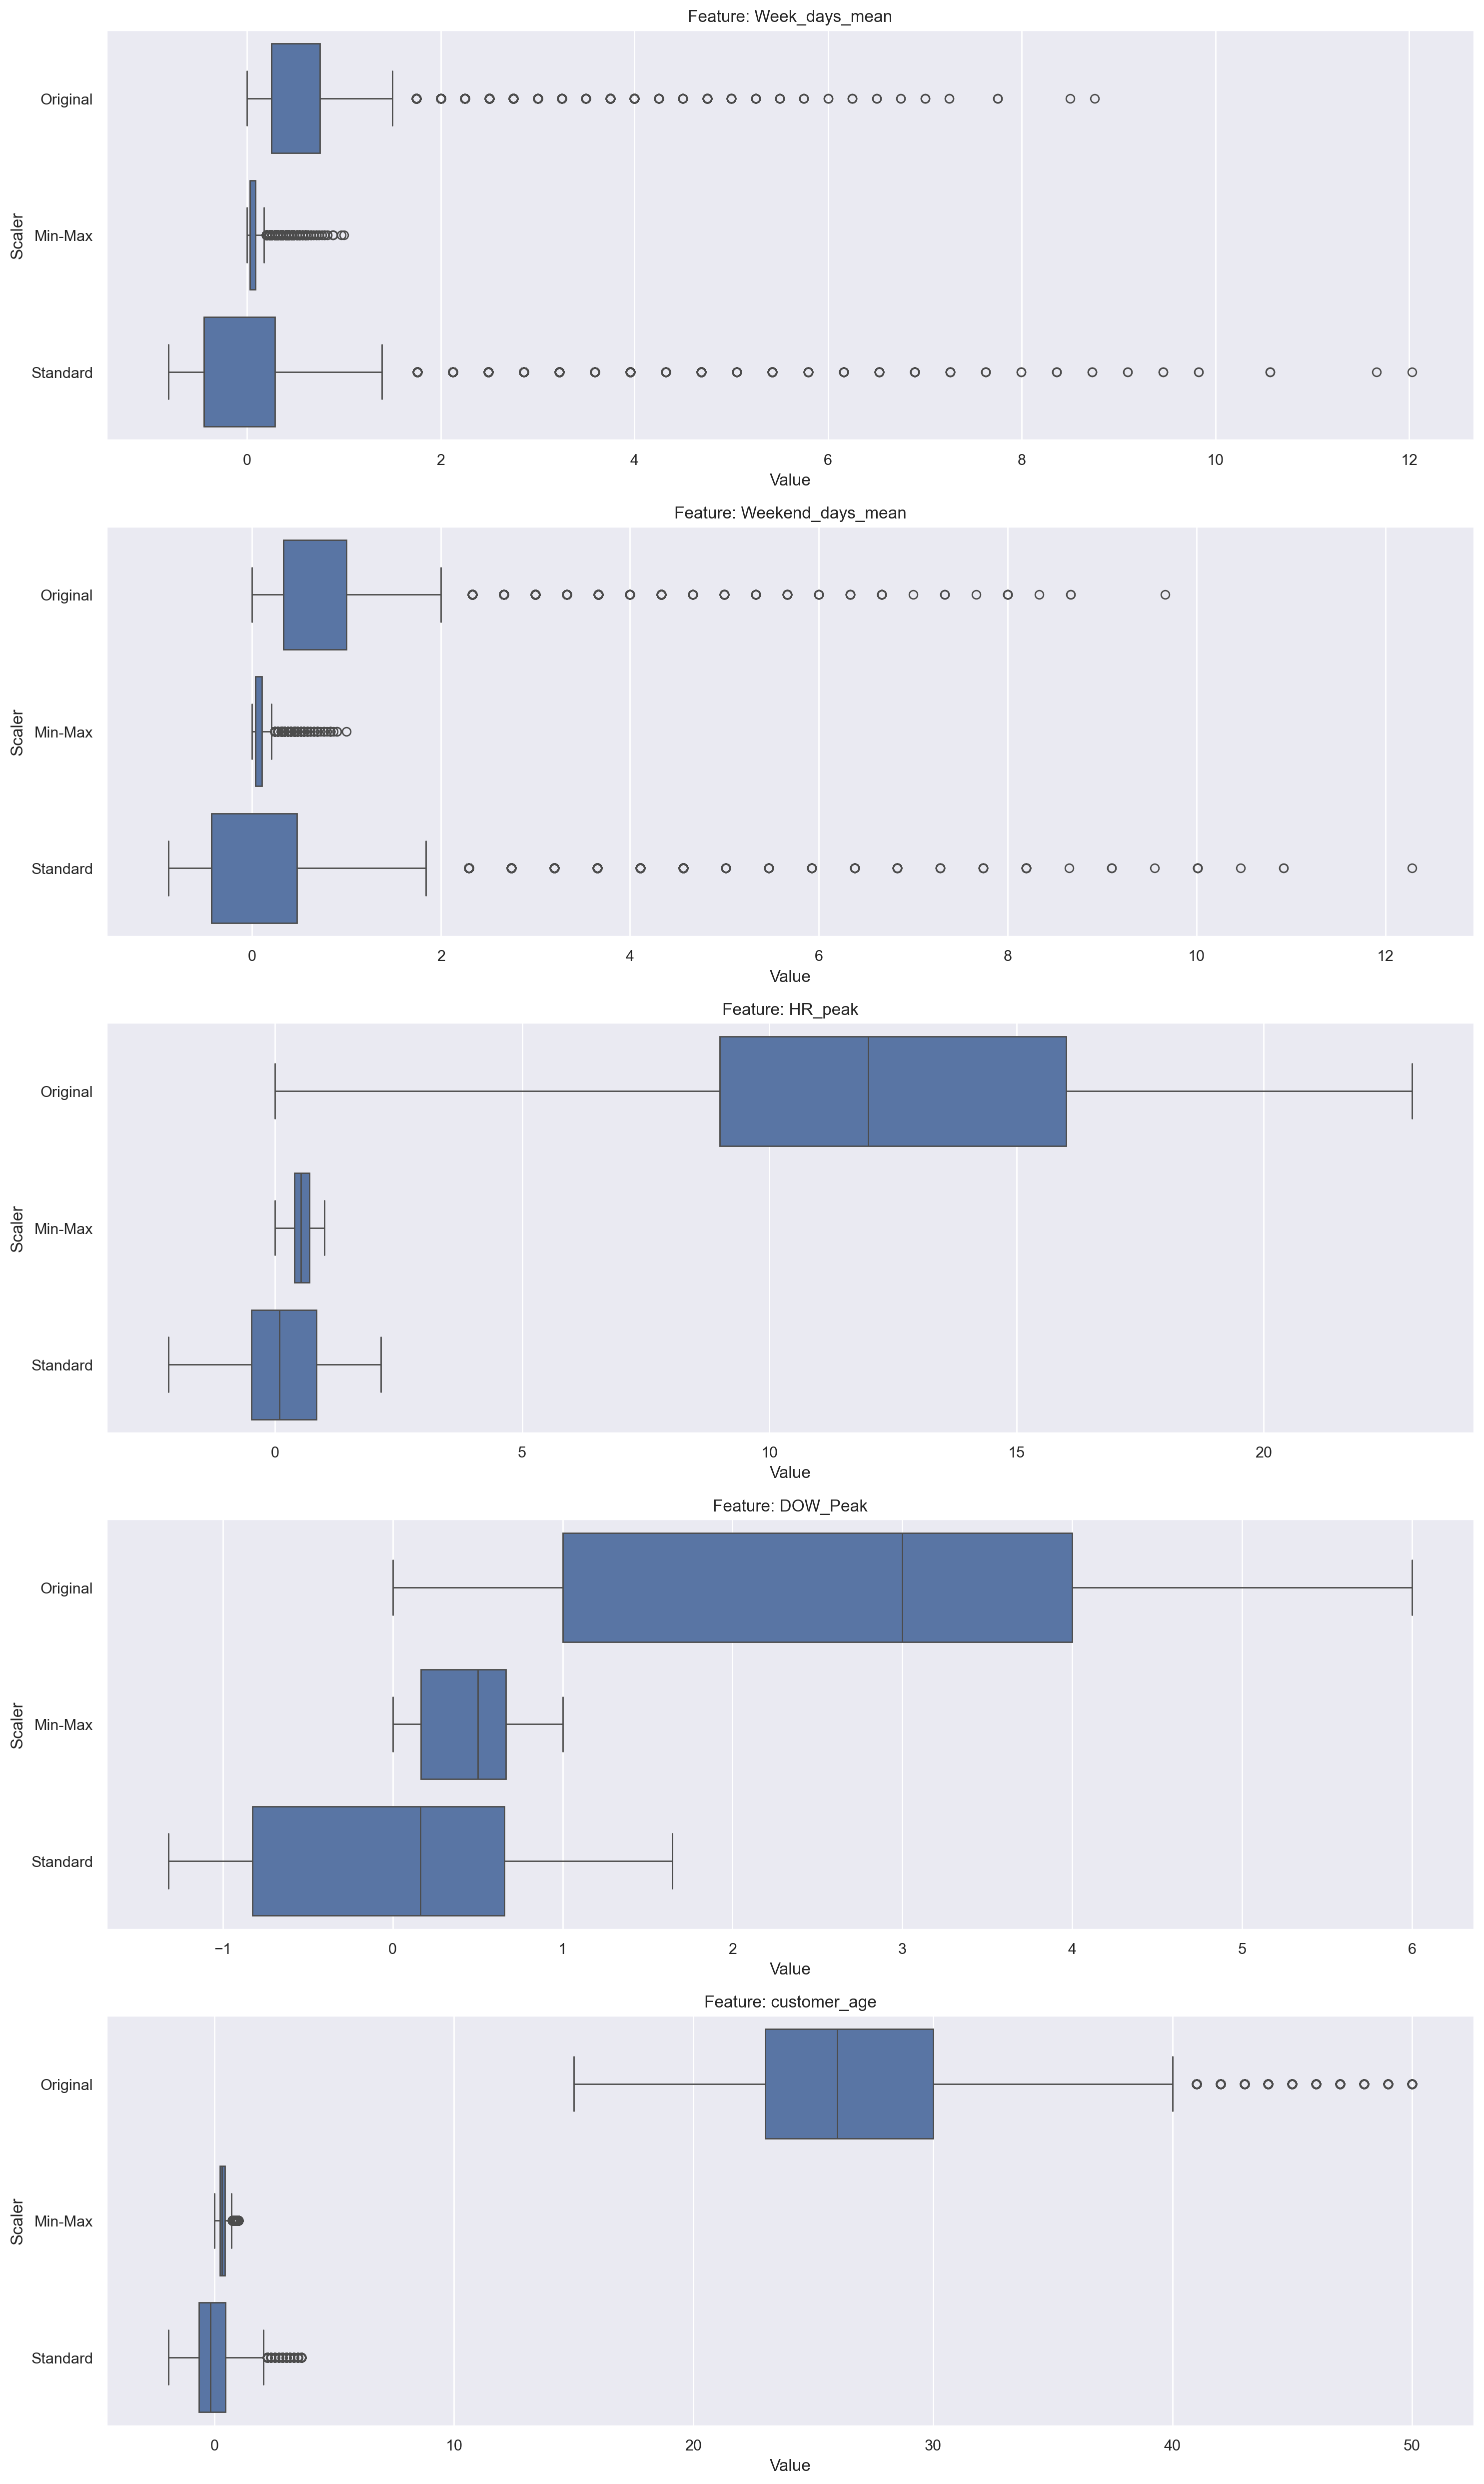

In [91]:
# Prepare an empty DataFrame to combine data for plotting
data_for_plot = pd.DataFrame()

# Loop over each column in the DataFrames
for feature in df_DEMO.columns:
    # Combine data from all three DataFrames for the current feature
    df_original = df_DEMO[[feature]].rename(columns={feature: 'Value'})
    df_original['Scaler'] = 'Original'
    df_original['Feature'] = feature

    df_minmax = df_DEMO_minmax[[feature]].rename(columns={feature: 'Value'})
    df_minmax['Scaler'] = 'Min-Max'
    df_minmax['Feature'] = feature

    df_standard = df_DEMO_standard[[feature]].rename(columns={feature: 'Value'})
    df_standard['Scaler'] = 'Standard'
    df_standard['Feature'] = feature

    # Concatenate into the plotting DataFrame
    data_for_plot = pd.concat([data_for_plot, df_original, df_minmax, df_standard])

# Convert the 'Value' column to numeric (to avoid errors with non-numeric data)
data_for_plot['Value'] = pd.to_numeric(data_for_plot['Value'], errors='coerce')

# Plotting: Create boxplots for each feature
num_features = len(df_DEMO.columns)
rows_per_figure = 6  # Number of rows (features) to plot per figure

for start_idx in range(0, num_features, rows_per_figure):
    # Define the range of features to plot in this figure
    end_idx = min(start_idx + rows_per_figure, num_features)
    features_to_plot = df_DEMO.columns[start_idx:end_idx]

    # Filter data for this subset of features
    subset_data = data_for_plot[data_for_plot['Feature'].isin(features_to_plot)]

    # Create the figure
    plt.figure(figsize=(15, 5 * len(features_to_plot)))

    # Loop through each feature and create a subplot
    for idx, feature in enumerate(features_to_plot, 1):
        plt.subplot(len(features_to_plot), 1, idx)
        sns.boxplot(data=subset_data[subset_data['Feature'] == feature], x='Value', y='Scaler', orient='h')
        plt.title(f'Feature: {feature}')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

The choice to use the Standard Scaler in our analysis is justified as the dataset involves features with varying scales that may influence the performance or behavior of clustering algorithms.

The Standard Scaler is the appropriate choice for our dataset as it addresses the variance across features, handles outliers effectively, and ensures fairness in clustering by equalizing feature contributions.

### 4.7.2 Choosing the best scaler and merging perspectives

In [92]:
# We're using the standard scaler
df_BEHAV = df_BEHAV_standard
df_DEMO = df_DEMO_standard

# Concatenate the three DataFrames along columns (axis=1)
final_df_ohc = pd.concat([df_DEMO, df_BEHAV, df_RFM], axis=1)

final_df_ohc.head()

Week_days_mean  Weekend_days_mean   HR_peak  DOW_Peak  \
customer_id                                                          
1b8f824d5e        -0.444861          -0.430645  1.208156 -1.320239   
5d272b9dcb        -0.444861          -0.430645 -0.286086 -1.320239   
f6d1b2ba63        -0.444861          -0.430645 -0.472866 -1.320239   
180c632ed8        -0.444861          -0.430645 -0.099305 -0.825866   
4eb37a6705        -0.444861          -0.430645 -0.659646 -0.825866   

             customer_age  CUI_American  CUI_Italian  CUI_Asian  CUI_OTHER  \
customer_id                                                                  
1b8f824d5e      -1.446986     -0.456645     -0.31183   0.504971  -0.600861   
5d272b9dcb      -1.605708      0.820482     -0.31183  -0.415749  -0.600861   
f6d1b2ba63       1.727454      0.459858     -0.31183  -0.677350  -0.600861   
180c632ed8      -0.177210     -0.456645     -0.31183   0.614688  -0.600861   
4eb37a6705      -1.129542      0.994817     -0.31183   0.995830  -0.600861   

             Chain_Preference  Order_Frequency  Avg_Spend_per_Order  \
customer_id                                                           
1b8f824d5e          -0.332317         1.560249             0.540066   
5d272b9dcb           0.959062         1.560249            -0.080420   
f6d1b2ba63           0.959062         1.560249            -0.722722   
180c632ed8          -0.332317         0.756958             0.712031   
4eb37a6705          -1.623697         0.756958             2.244317   

             Product_per_Order  Total_Orders  Customer_Duration  Recency  \
customer_id                                                                
1b8f824d5e            2.920203     -0.507104          -1.169091        1   
5d272b9dcb           -0.714576     -0.507104          -1.169091        1   
f6d1b2ba63           -0.714576     -0.507104          -1.169091        1   
180c632ed8            0.497017     -0.507104          -1.134782        2   
4eb37a6705            2.920203     -0.507104          -1.134782        2   

             Frequency  Monetary  
customer_id                       
1b8f824d5e           2     28.88  
5d272b9dcb           2     19.21  
f6d1b2ba63           2      9.20  
180c632ed8           2     31.56  
4eb37a6705           2     55.44

In [93]:
final_df_ohc.columns

Index(['Week_days_mean', 'Weekend_days_mean', 'HR_peak', 'DOW_Peak',
       'customer_age', 'CUI_American', 'CUI_Italian', 'CUI_Asian', 'CUI_OTHER',
       'Chain_Preference', 'Order_Frequency', 'Avg_Spend_per_Order',
       'Product_per_Order', 'Total_Orders', 'Customer_Duration', 'Recency',
       'Frequency', 'Monetary'],
      dtype='object')

* Checking on missing values

In [94]:
print(final_df_ohc.isna().sum().sum())

0


# 5. Exporting Preprocessed Data

* Data will be exported and used in the next part for Clustering and Cell-Based Segmentation

In [95]:
final_df_ohc.reset_index(inplace=True)
final_df_ohc.to_csv("DM2425_ABCDEats_DATASET_Preprocessed.csv", index=False)

* Checking if export was successful:

In [97]:
final_df_ohc2 = pd.read_csv('DM2425_ABCDEats_DATASET_Preprocessed.csv')

In [98]:
final_df_ohc2.head()

customer_id  Week_days_mean  Weekend_days_mean   HR_peak  DOW_Peak  \
0  1b8f824d5e       -0.444861          -0.430645  1.208156 -1.320239   
1  5d272b9dcb       -0.444861          -0.430645 -0.286086 -1.320239   
2  f6d1b2ba63       -0.444861          -0.430645 -0.472866 -1.320239   
3  180c632ed8       -0.444861          -0.430645 -0.099305 -0.825866   
4  4eb37a6705       -0.444861          -0.430645 -0.659646 -0.825866   

   customer_age  CUI_American  CUI_Italian  CUI_Asian  CUI_OTHER  \
0     -1.446986     -0.456645     -0.31183   0.504971  -0.600861   
1     -1.605708      0.820482     -0.31183  -0.415749  -0.600861   
2      1.727454      0.459858     -0.31183  -0.677350  -0.600861   
3     -0.177210     -0.456645     -0.31183   0.614688  -0.600861   
4     -1.129542      0.994817     -0.31183   0.995830  -0.600861   

   Chain_Preference  Order_Frequency  Avg_Spend_per_Order  Product_per_Order  \
0         -0.332317         1.560249             0.540066           2.920203   
1          0.959062         1.560249            -0.080420          -0.714576   
2          0.959062         1.560249            -0.722722          -0.714576   
3         -0.332317         0.756958             0.712031           0.497017   
4         -1.623697         0.756958             2.244317           2.920203   

   Total_Orders  Customer_Duration  Recency  Frequency  Monetary  
0     -0.507104          -1.169091        1          2     28.88  
1     -0.507104          -1.169091        1          2     19.21  
2     -0.507104          -1.169091        1          2      9.20  
3     -0.507104          -1.134782        2          2     31.56  
4     -0.507104          -1.134782        2          2     55.44

In [99]:
final_df_ohc.head()

customer_id  Week_days_mean  Weekend_days_mean   HR_peak  DOW_Peak  \
0  1b8f824d5e       -0.444861          -0.430645  1.208156 -1.320239   
1  5d272b9dcb       -0.444861          -0.430645 -0.286086 -1.320239   
2  f6d1b2ba63       -0.444861          -0.430645 -0.472866 -1.320239   
3  180c632ed8       -0.444861          -0.430645 -0.099305 -0.825866   
4  4eb37a6705       -0.444861          -0.430645 -0.659646 -0.825866   

   customer_age  CUI_American  CUI_Italian  CUI_Asian  CUI_OTHER  \
0     -1.446986     -0.456645     -0.31183   0.504971  -0.600861   
1     -1.605708      0.820482     -0.31183  -0.415749  -0.600861   
2      1.727454      0.459858     -0.31183  -0.677350  -0.600861   
3     -0.177210     -0.456645     -0.31183   0.614688  -0.600861   
4     -1.129542      0.994817     -0.31183   0.995830  -0.600861   

   Chain_Preference  Order_Frequency  Avg_Spend_per_Order  Product_per_Order  \
0         -0.332317         1.560249             0.540066           2.920203   
1          0.959062         1.560249            -0.080420          -0.714576   
2          0.959062         1.560249            -0.722722          -0.714576   
3         -0.332317         0.756958             0.712031           0.497017   
4         -1.623697         0.756958             2.244317           2.920203   

   Total_Orders  Customer_Duration  Recency  Frequency  Monetary  
0     -0.507104          -1.169091        1          2     28.88  
1     -0.507104          -1.169091        1          2     19.21  
2     -0.507104          -1.169091        1          2      9.20  
3     -0.507104          -1.134782        2          2     31.56  
4     -0.507104          -1.134782        2          2     55.44

In [100]:
final_df_ohc.shape == final_df_ohc2.shape

True